In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [2]:
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1nUjJ2HDd8gGJvIH3Lg0la_4Ec2b42LnR/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
churn_pd=pd.read_csv(csv_raw)


In [3]:
churn_original=churn_pd.copy()

In [4]:
#checking the shape of the data 
churn_original.shape

(99999, 226)

In [5]:
#checking the number of columns that are categorical 
cat=['object','category']
num=['int32','int64','float64','float32']
cat_cols=churn_original.select_dtypes(include=cat).columns
count_cat=len(churn_original.select_dtypes(include=cat).columns)
count_num=len(churn_original.select_dtypes(include=num).columns)

print("We have {0} numerical columns in our dataset".format(count_num))
print("We have {0} numerical columns in our dataset".format(count_cat))
print((churn_original.select_dtypes(include=cat).columns))

We have 214 numerical columns in our dataset
We have 12 numerical columns in our dataset
Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


__There are 12 columns which are not numerical here. We need to change the dtype to datetime__

In [8]:
#converting the date columns to date time
for i in cat_cols:
    churn_original[i]=pd.to_datetime(churn_original[i])

__We have columns which we have to rename__
- jun_vbc_3g --> vbc_3g_6
- jul_vbc_3g --> vbc_3g_7
- aug_vbc_3g --> vbc_3g_8
- sep_vbc_3g --> vbc_3g_9

In [9]:
churn_original.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

__These are the columns which are numerical but they are categorical i nature__
- mobile_number
- circle


In [10]:
churn_original['mobile_number']=churn_original['mobile_number'].astype('object')
churn_original['circle_id']=churn_original['circle_id'].astype('object')

In [11]:
#checking for null values
churn_original.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [12]:
#checking the null %
null=pd.DataFrame(round((churn_original.isnull().sum()/len(churn_original.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
arpu_3g_6                 74.85
night_pck_user_6          74.85
total_rech_data_6         74.85
arpu_2g_6                 74.85
max_rech_data_6           74.85
fb_user_6                 74.85
av_rech_amt_data_6        74.85
date_of_last_rech_data_6  74.85
count_rech_2g_6           74.85
count_rech_3g_6           74.85
date_of_last_rech_data_7  74.43
total_rech_data_7         74.43
fb_user_7                 74.43
max_rech_data_7           74.43
night_pck_user_7          74.43
count_rech_2g_7           74.43
av_rech_amt_data_7        74.43
arpu_2g_7                 74.43
count_rech_3g_7           74.43
arpu_3g_7                 74.43
total_rech_data_9         74.08
count_rech_3g_9           74.08
fb_user_9                 74.08
max_rech_data_9           74.08
arpu_3g_9                 74.08
date_of_last_rech_data_9  74.08
night_pck_user_9          74.08
arpu_2g_9                 74.08
count_rech_2g_9           74.08
av_rech_amt_data_9        74.08
...                         ...
circle_id                  0.00
total_og_mou_8             0.00
vol_3g_mb_7                0.00
total_og_mou_7             0.00
total_og_mou_6             0.00
arpu_9                     0.00
arpu_8                     0.00
arpu_7                     0.00
arpu_6                     0.00
last_date_of_month_6       0.00
total_rech_num_8           0.00
total_rech_num_9           0.00
total_rech_amt_6           0.00
total_rech_amt_7           0.00
vol_3g_mb_6                0.00
vol_2g_mb_9                0.00
vol_2g_mb_8                0.00
vol_2g_mb_7                0.00
vol_2g_mb_6                0.00
last_day_rch_amt_9         0.00
last_day_rch_amt_8         0.00
last_day_rch_amt_7         0.00
last_day_rch_amt_6         0.00
max_rech_amt_9             0.00
max_rech_amt_8             0.00
max_rech_amt_7             0.00
max_rech_amt_6             0.00
total_rech_amt_9           0.00
total_rech_amt_8           0.00
vbc_3g_9                   0.00

[226 rows x 1 columns]

__Identifying top Priority customers__
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
#deriving a new column called average recharge amount by taking the mean of the recharge done in the good phase (month 6 and 7)
churn_original['av_rech_good_ph']=(churn_original['total_rech_amt_6']+churn_original['total_rech_amt_7'])/2

In [14]:
#defining a function whihch returs 1 if the cutomer is a high valued customer or 0 if not .
def high_value_cust(x):
    if x >= np.percentile(churn_original['av_rech_good_ph'],70):
        return 1
    else:
        return 0

In [15]:
#derving a column - " hig_prio_cust" which classifies if a customer is a high value cust or not
churn_original['hig_prio_cust']=churn_original['av_rech_good_ph'].apply(high_value_cust)

In [16]:
churn_original['hig_prio_cust'].value_counts()

0    69988
1    30011
Name: hig_prio_cust, dtype: int64

__As expected we have 30011 customers who are of high value and we should concentate on them to avoid churing__
- Lets derive a data frame which contains only the high values customer and the remaining can be discarded.

In [17]:
churn_df=churn_original[churn_original['hig_prio_cust']==1]

In [18]:
churn_df.head()

mobile_number circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7     7000701601       109             0.0             0.0             0.0   
8     7001524846       109             0.0             0.0             0.0   
13    7002191713       109             0.0             0.0             0.0   
16    7000875565       109             0.0             0.0             0.0   
17    7000187447       109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7            2014-06-30           2014-07-31           2014-08-31   
8            2014-06-30           2014-07-31           2014-08-31   
13           2014-06-30           2014-07-31           2014-08-31   
16           2014-06-30           2014-07-31           2014-08-31   
17           2014-06-30           2014-07-31           2014-08-31   

   last_date_of_month_9    arpu_6  ...  fb_user_7  fb_user_8  fb_user_9   aon  \
7            2014-09-30  1069.180  ...        NaN        NaN        NaN   802   
8            2014-09-30   378.721  ...        1.0        1.0        NaN   315   
13           2014-09-30   492.846  ...        NaN        1.0        NaN  2607   
16           2014-09-30   430.975  ...        NaN        NaN        NaN   511   
17           2014-09-30   690.008  ...        NaN        NaN        NaN   667   

    vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  av_rech_good_ph  hig_prio_cust  
7      57.74     19.38     18.74       0.0           1185.0              1  
8      21.03    910.65    122.16       0.0            519.0              1  
13      0.00      0.00      0.00       0.0            380.0              1  
16      0.00      2.45     21.89       0.0            459.0              1  
17      0.00      0.00      0.00       0.0            408.0              1  

[5 rows x 228 columns]

In [19]:
churn_df.reset_index(drop=True,inplace=True)

__Lets calculate if a customer has churned or not__

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [20]:
churn_df['is_churn']=0

In [21]:
churn_df.loc[(churn_df['vol_3g_mb_9']==0) & (churn_df['vol_2g_mb_9']==0) & (churn_df['total_og_mou_9']==0) ,'is_churn']=1

In [22]:
churn_df['is_churn'].value_counts()

0    27204
1     2807
Name: is_churn, dtype: int64

__We have highly imbalanced target attribute here__ 
1. We need to take care of it when using boosting/bagging as that will be taken care by the algorithm
2. When we are working with simpler models like regression we need to take care of it using different techniques which will be covered later.

__We no more required the attributes which contain '_9' as we wont use that in prediction, so dropping them__

In [23]:
churn_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_8', 'fb_user_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'vbc_3g_9', 'av_rech_good_ph', 'hig_prio_cust', 'is_churn'],
      dtype='object', length=229)

In [24]:
#creating a list containinig the column names containing 9
col_9=[]
for i in churn_df.columns:
    if '9' in i:
        col_9.append(i)

In [25]:
#dropping all the attributes containing 9 in it 
churn_df.drop(col_9,1,inplace=True)

In [26]:
churn_df.shape

(30011, 174)

In [27]:
len(churn_original['mobile_number'].unique())

99999

- mobile_number has all the data points unique and can be used to uniquely identify a customer lets keep it aside before staring the EDA 

In [28]:
#Assigning the mobile number to a variable and dropping it from the data frame
mobile_number =churn_df['mobile_number']
churn_df.drop('mobile_number',1,inplace=True)

__We have some datetime columns , we can derive some features from it__


In [29]:
#checking the date tinme columns 
dt_cols=[i for i in churn_df.columns.tolist() if 'date' in i]

In [30]:
#Lets see how many NAT they have in each of the attribute
for i in dt_cols:
    print("NAT % in {} are".format(i),round(100*churn_df[i].isnull().sum()/churn_df.shape[0],2))

NAT % in last_date_of_month_6 are 0.0
NAT % in last_date_of_month_7 are 0.1
NAT % in last_date_of_month_8 are 0.52
NAT % in date_of_last_rech_6 are 0.21
NAT % in date_of_last_rech_7 are 0.38
NAT % in date_of_last_rech_8 are 1.98
NAT % in date_of_last_rech_data_6 are 62.02
NAT % in date_of_last_rech_data_7 are 61.14
NAT % in date_of_last_rech_data_8 are 60.83


__We cannot derive any features from 'last_date_of_month' as the day of the month will be constant throughout the rows and wont add much value to the model__

In [31]:
print(churn_df['last_date_of_month_6'].value_counts())
print(churn_df['last_date_of_month_7'].value_counts())
print(churn_df['last_date_of_month_8'].value_counts())


2014-06-30    30011
Name: last_date_of_month_6, dtype: int64
2014-07-31    29980
Name: last_date_of_month_7, dtype: int64
2014-08-31    29854
Name: last_date_of_month_8, dtype: int64


__As there is no variation for the above datetime columns we can drop them__

In [32]:
#dropping the above mention attributes
churn_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1,inplace=True)

__As the below are the NAT % for the attributes , And the amount of null is low we will deal with them later

- NAT % in date_of_last_rech_6 are 0.21
- NAT % in date_of_last_rech_7 are 0.38
- NAT % in date_of_last_rech_8 are 1.98

__From date_of_last_rech we can derive__
- day of the month 
- what weekday it is

__As 'date_of_last_rech_data' for all the months have NAT more than 60%, it would be too risky to impute them . Its better to drop them__

In [33]:
#dropping the attributes with more than 60% NAT
churn_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],1,inplace=True)

In [34]:
churn_df.shape

(30011, 167)

In [35]:
#Deriving new columns 
churn_df['dayofweek_of_last_rech_6']=churn_df['date_of_last_rech_6'].dt.dayofweek
churn_df['dayofweek_of_last_rech_7']=churn_df['date_of_last_rech_7'].dt.dayofweek
churn_df['dayofweek_of_last_rech_8']=churn_df['date_of_last_rech_8'].dt.dayofweek
churn_df['dayofmonth_of_last_rech_6']=churn_df['date_of_last_rech_6'].dt.day
churn_df['dayofmonth_of_last_rech_7']=churn_df['date_of_last_rech_7'].dt.day
churn_df['dayofmonth_of_last_rech_8']=churn_df['date_of_last_rech_8'].dt.day


In [36]:
#Lets delete the datetime colums which are no more required
churn_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],1,inplace=True)

In [37]:

churn_df.shape

(30011, 170)

In [38]:
#We can derive an feature where the total_og_mou in the 8th month is less than average of total MOU for prev two months
churn_df['if_mou_dec']=0


In [39]:
churn_df.loc[(churn_df['total_og_mou_6']+churn_df['total_og_mou_7'])/2 > churn_df['total_og_mou_8'],'if_mou_dec']=1

In [40]:
churn_df['dayofweek_of_last_rech_8'].value_counts()

6.0    8124
5.0    5649
4.0    4208
3.0    3569
1.0    2731
0.0    2592
2.0    2544
Name: dayofweek_of_last_rech_8, dtype: int64

### converting the below columns into categorical
- dayofweek_of_last_rech_6
- dayofweek_of_last_rech_7
- dayofweek_of_last_rech_8
- dayofmonth_of_last_rech_6
- dayofmonth_of_last_rech_7
- dayofmonth_of_last_rech_8
- is_churn



In [41]:
li=['dayofweek_of_last_rech_6','dayofweek_of_last_rech_7','dayofweek_of_last_rech_8','dayofmonth_of_last_rech_6','dayofmonth_of_last_rech_7','dayofmonth_of_last_rech_8','is_churn']
for i in li:
    churn_df[i]=churn_df[i].astype('object')


In [42]:
#finding columns where there is no variance
col_novariance=[col for col in churn_df.columns if churn_df[col].nunique()==1]

In [43]:
#deleting the columns
churn_df.drop(col_novariance,1,inplace=True)

## EDA

In [44]:
def univariate_cat(df):
    dtype_cat=['category','object']
    col_names=df.select_dtypes(include=dtype_cat).columns
    for columns in col_names:
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(8, 3))
        ax = df[columns].value_counts().plot(kind='barh')
        for i, v in enumerate(df[columns].value_counts()):
            ax.text(v, i, " "+str(round((v/df.shape[0])*100))+'%', color='grey', verticalalignment='center',fontweight='bold')
        plt.title("Distribution of {}".format(columns), fontsize=16)
        ax.yaxis.grid(False)
   
        plt.show()

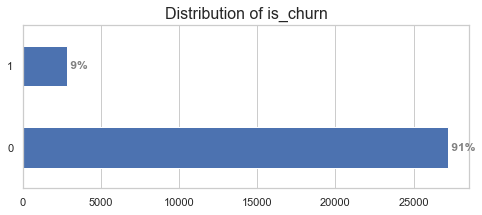

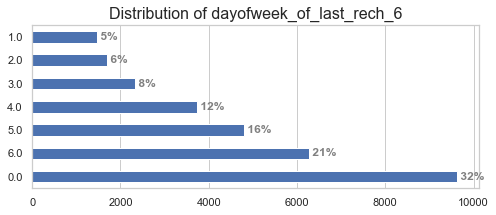

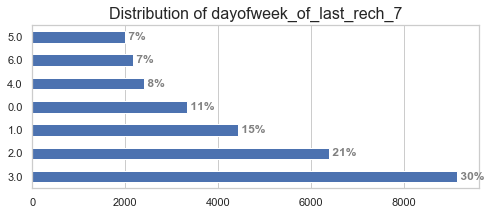

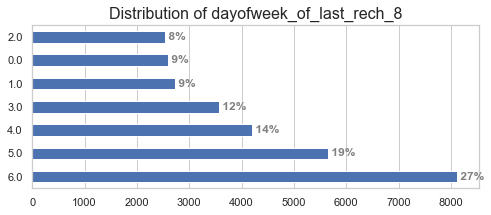

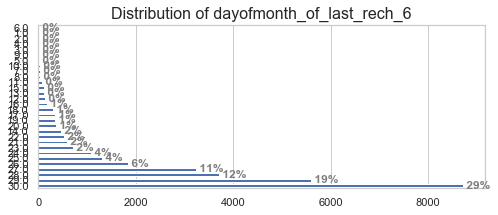

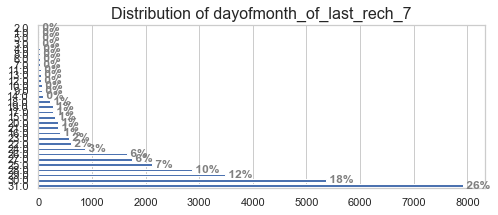

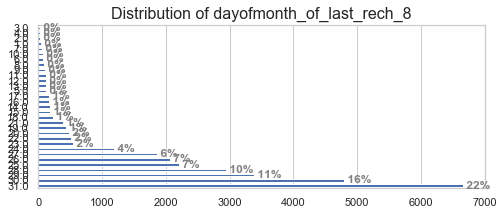

In [45]:
univariate_cat(churn_df)

__Obsrvations  from univariate categorical__
- The last recharge is done on last day of every month i.e 30th or 31st for all the three months.
- The last recharge is done on mostly on weekends (Sat and sunday) exception being July.


In [46]:
def univariate_num(df):
    from scipy.stats import norm
    dtype_num=['float64','int32','float32','int64']
    col_names=df.select_dtypes(include=dtype_num).columns
    for columns in col_names:
        sns.set(style="whitegrid")
        plt.figure(figsize=(11,4))
        plt.subplot(121)
        plt.title(f'Distplot of {columns}')
        sns.distplot(df[columns].dropna(),kde=False)

        plt.subplot(122)
        plt.title(f'Boxplot  of {columns}')
        sns.boxplot(y=df[columns].dropna())
        plt.show()

In [47]:
churn_df.shape

(30011, 160)

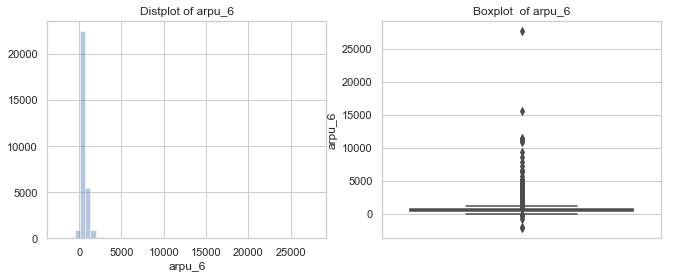

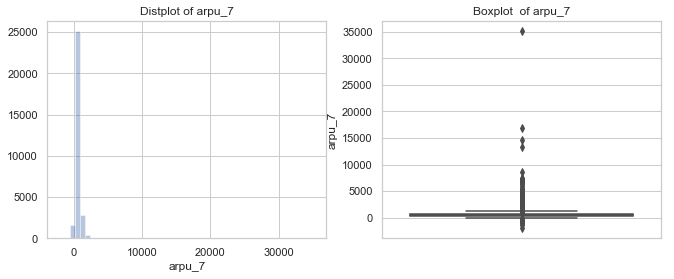

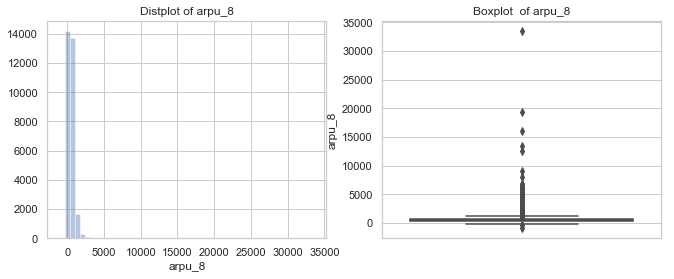

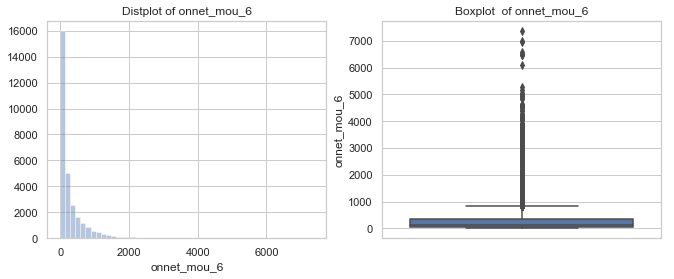

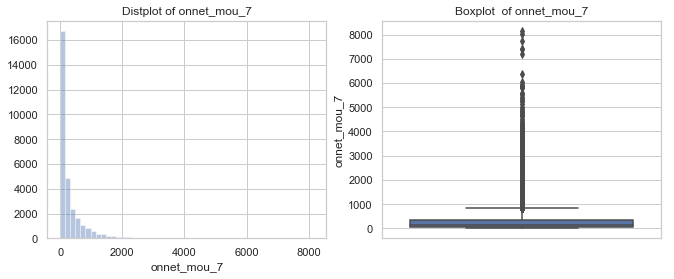

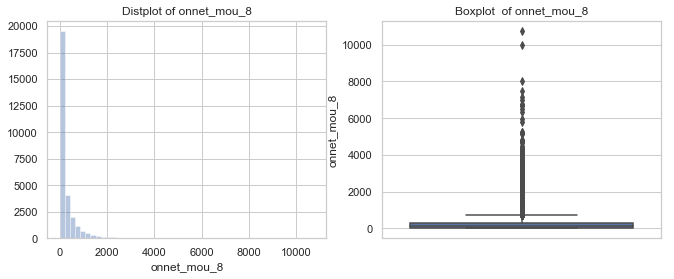

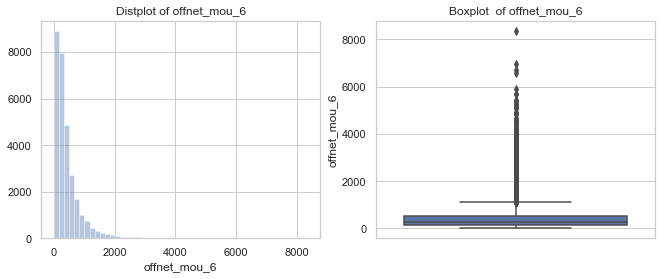

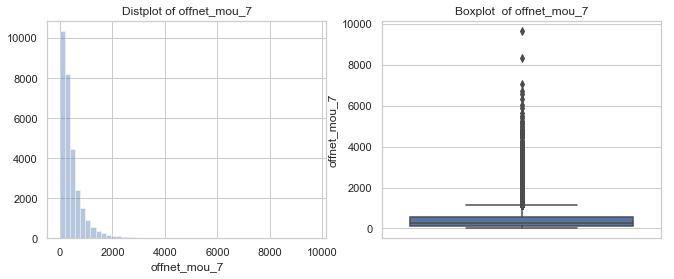

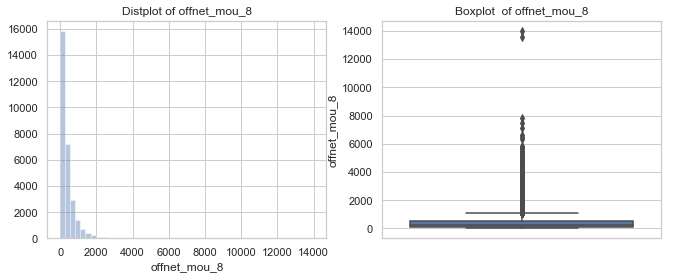

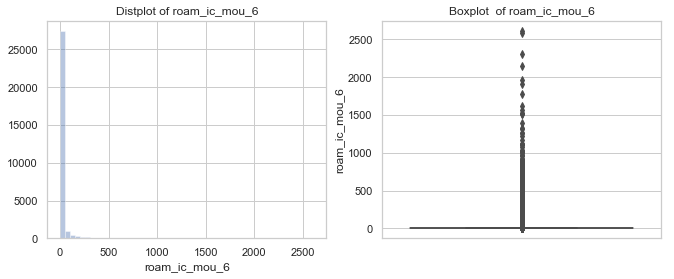

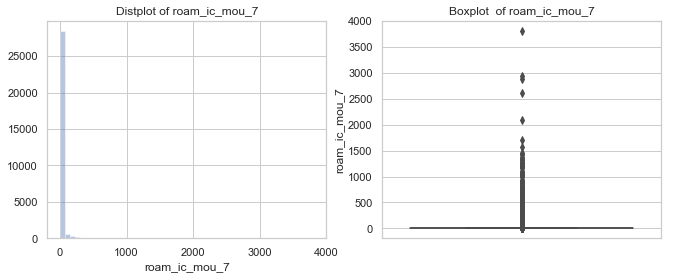

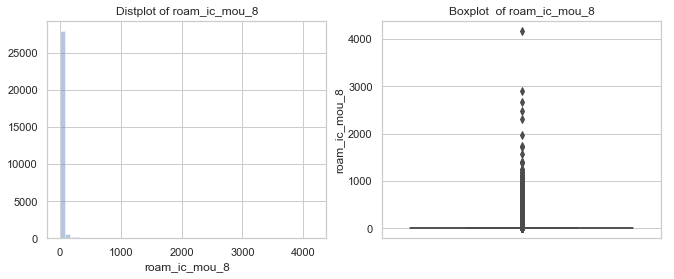

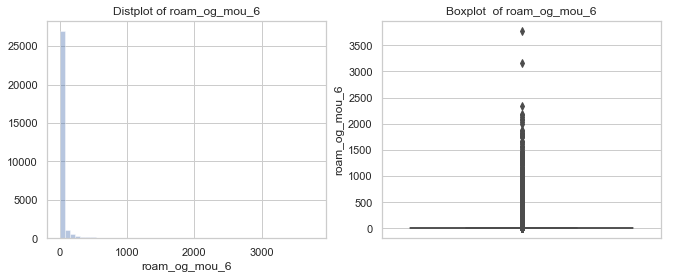

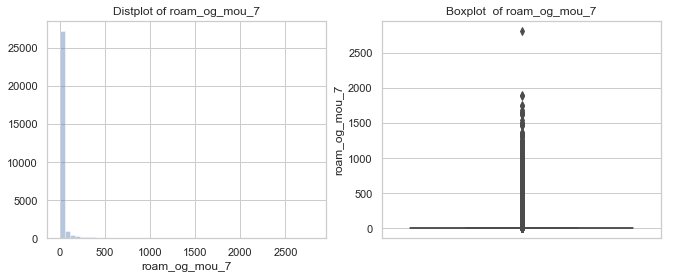

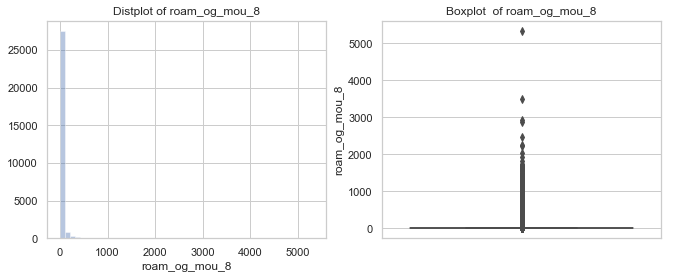

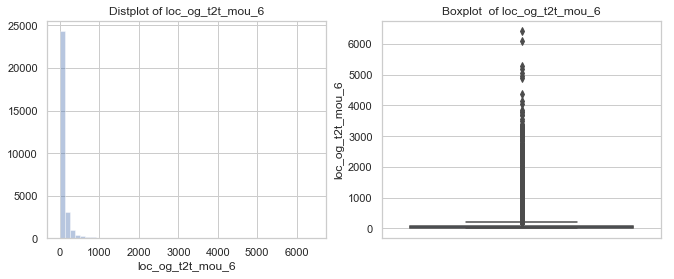

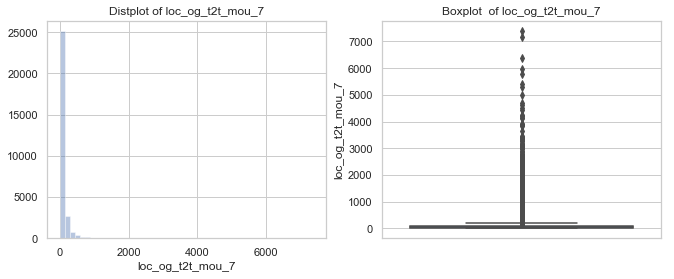

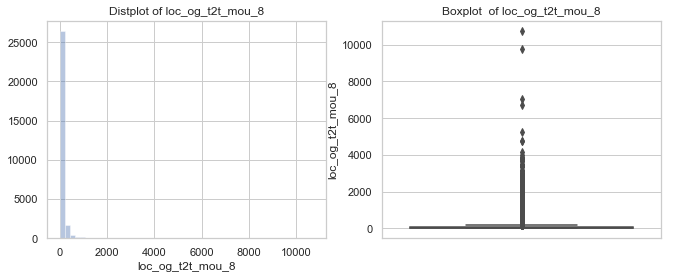

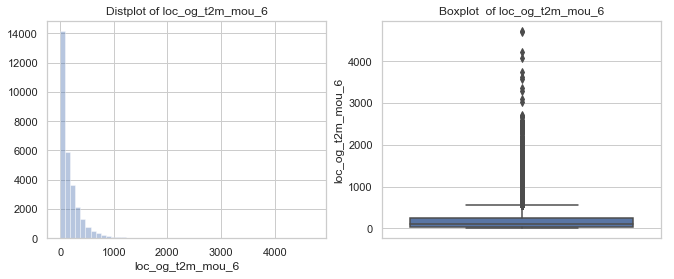

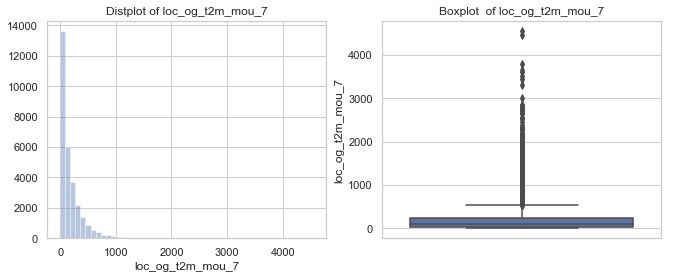

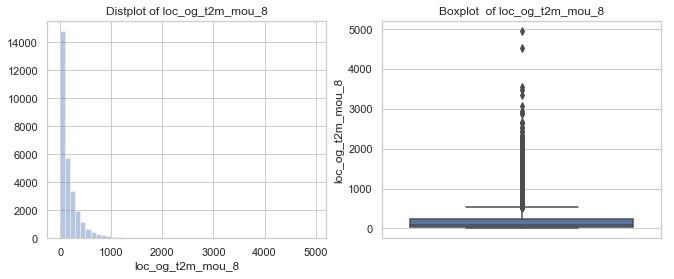

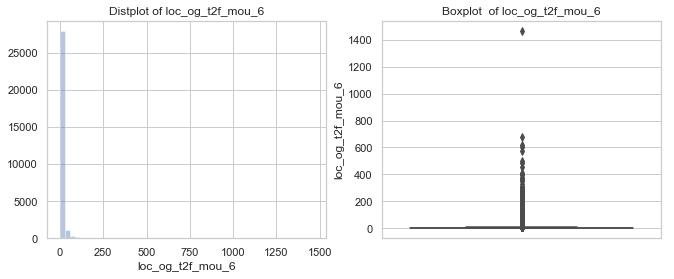

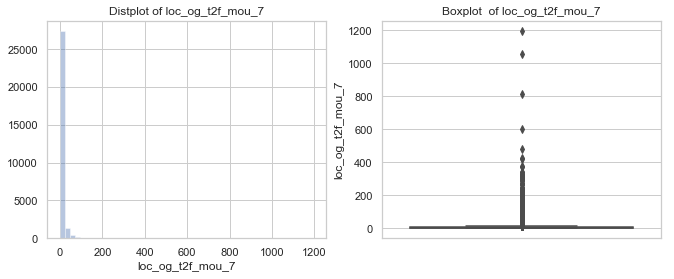

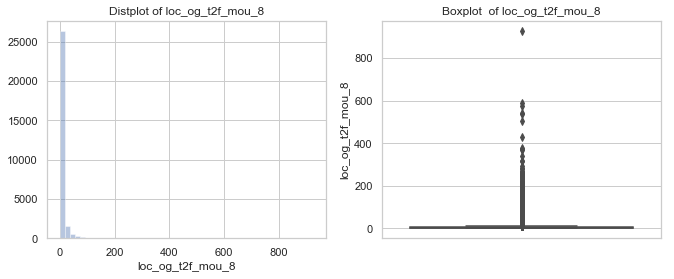

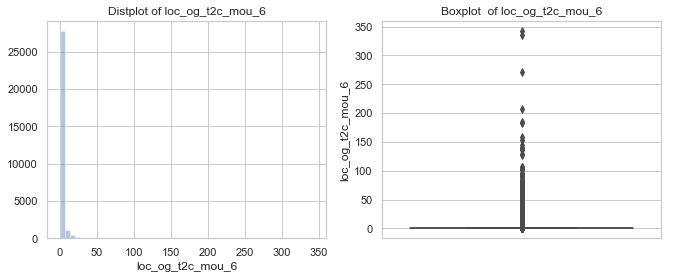

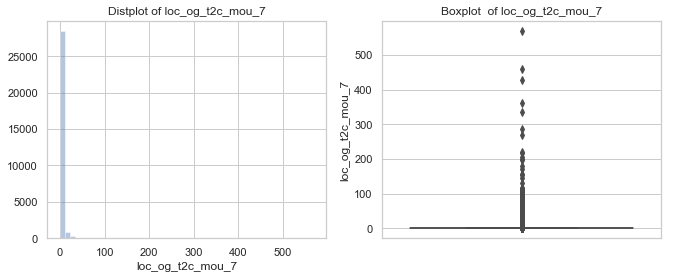

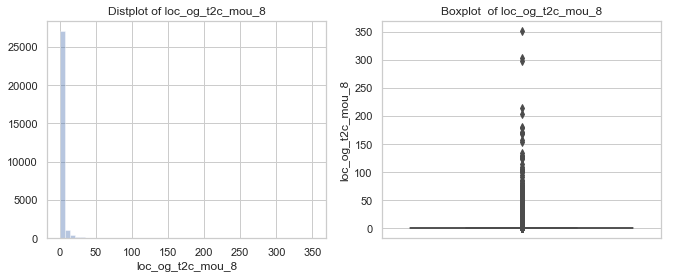

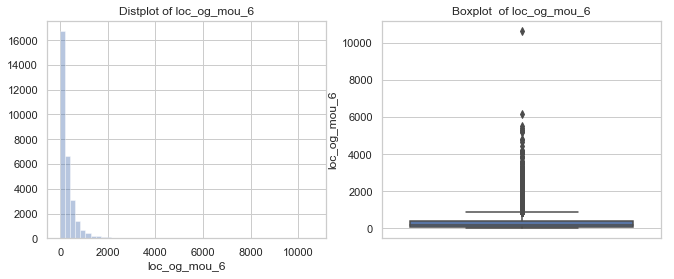

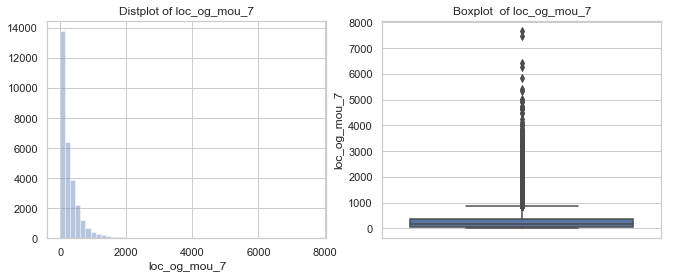

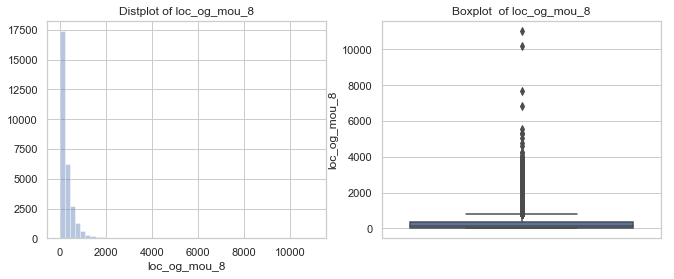

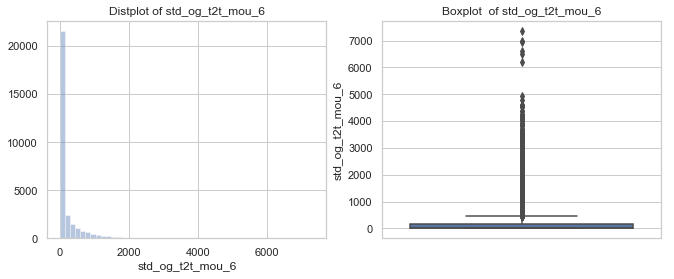

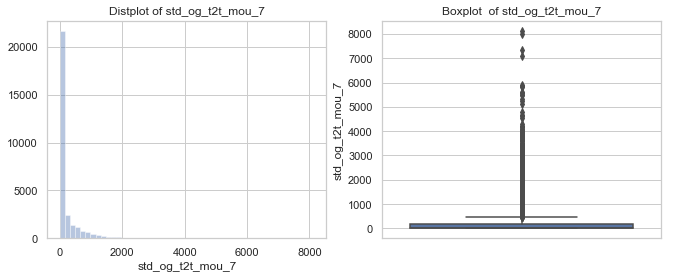

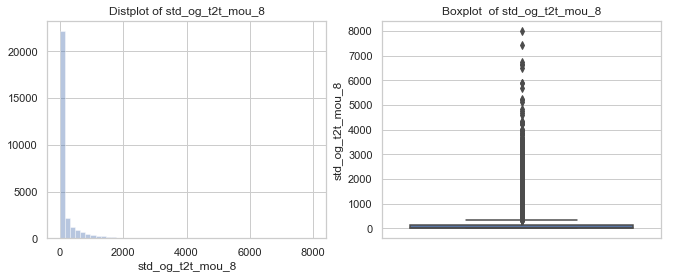

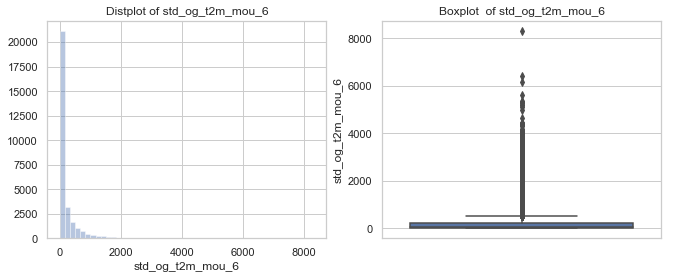

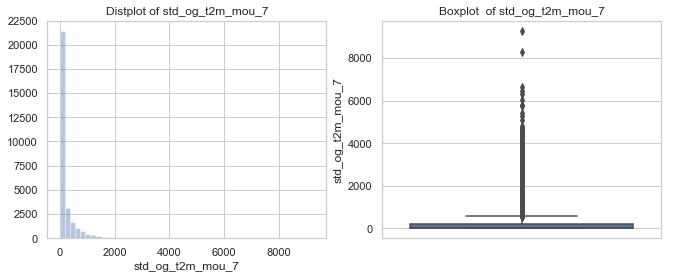

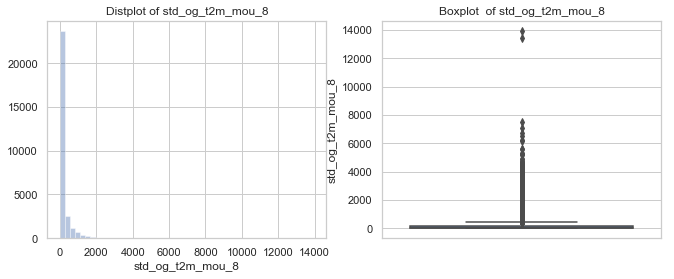

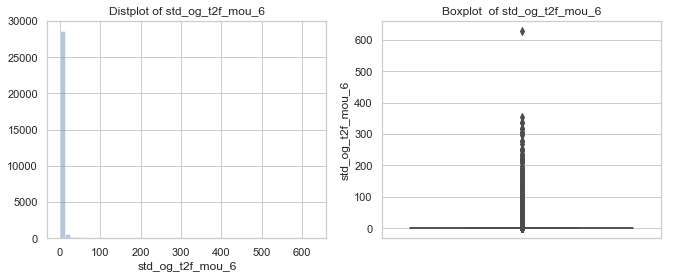

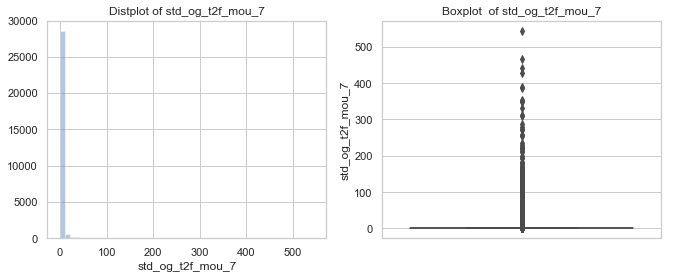

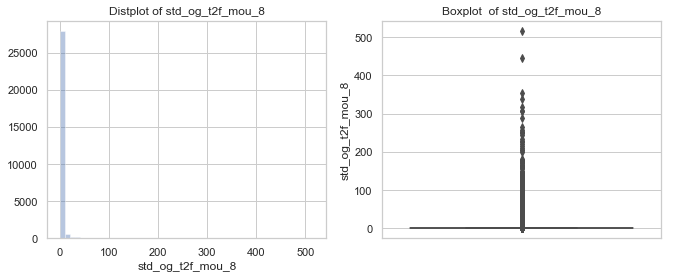

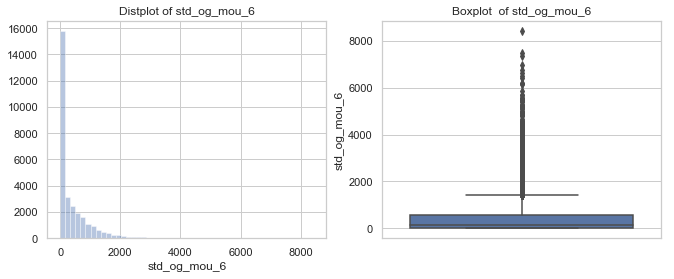

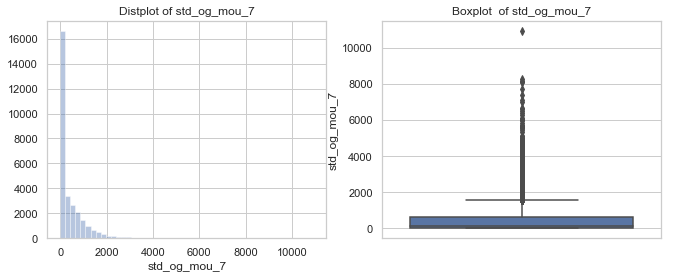

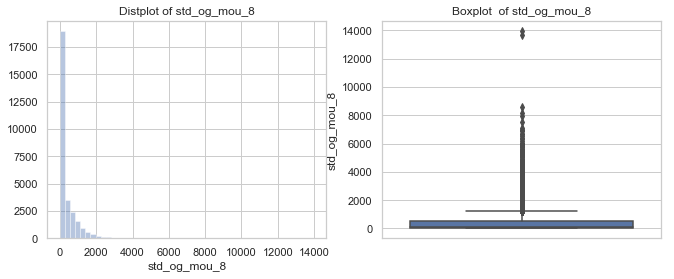

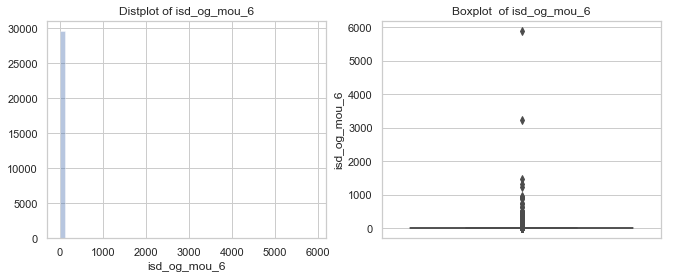

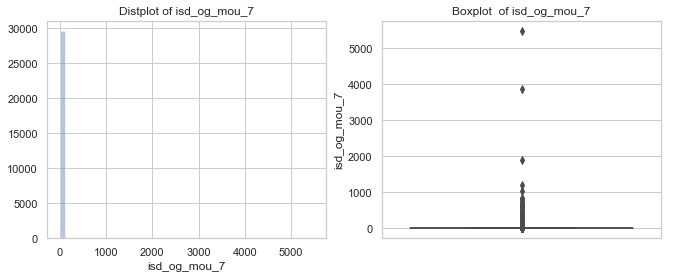

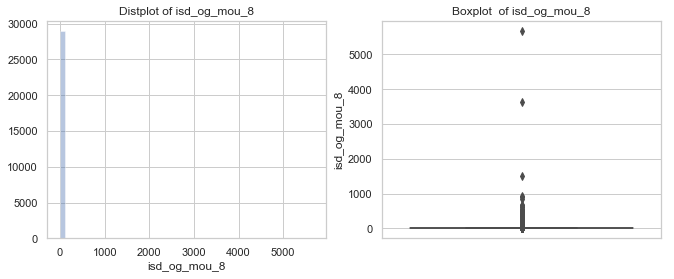

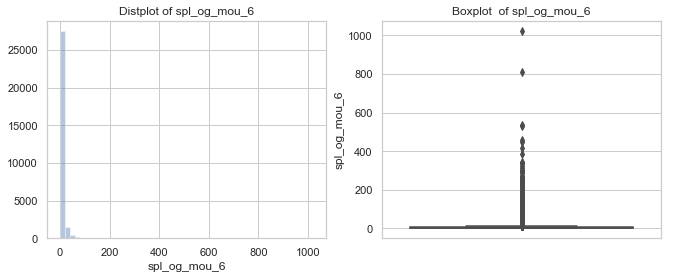

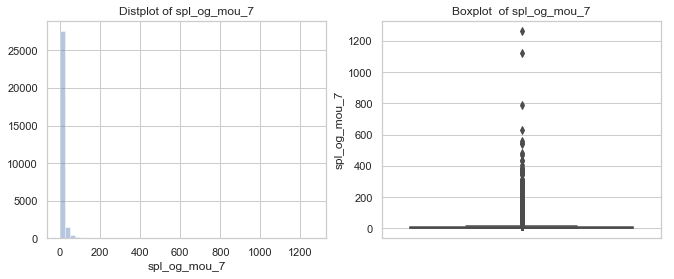

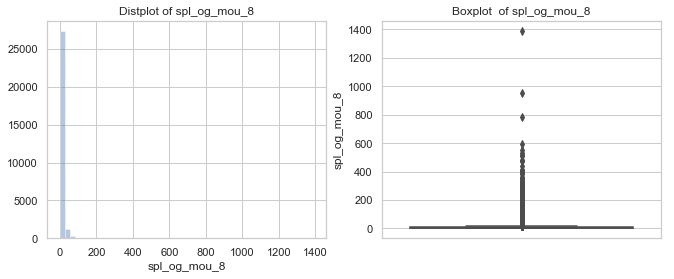

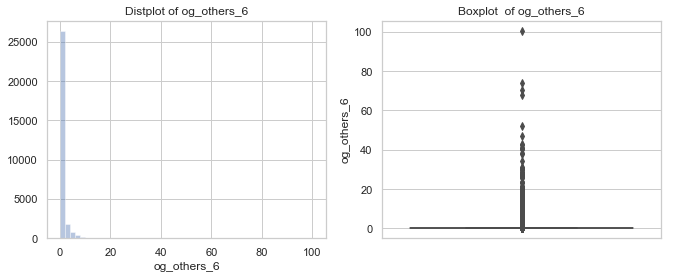

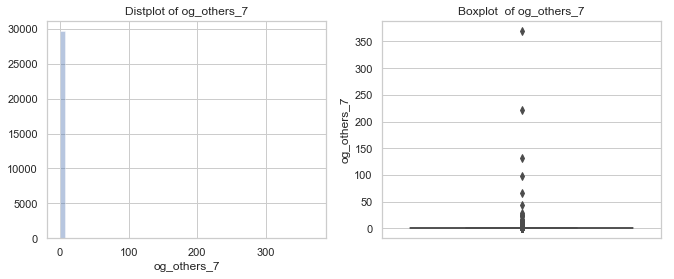

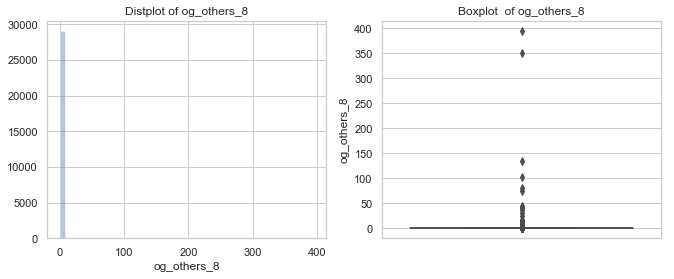

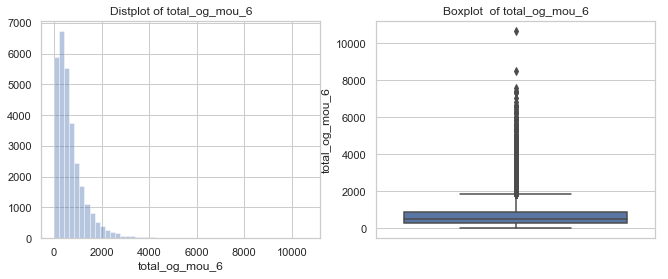

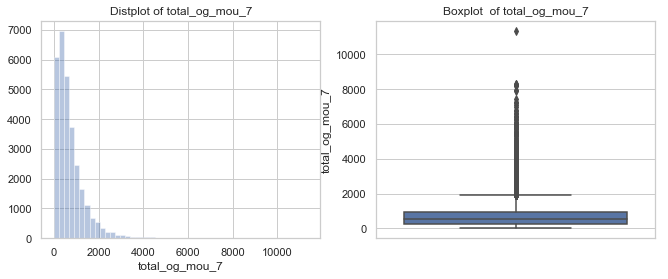

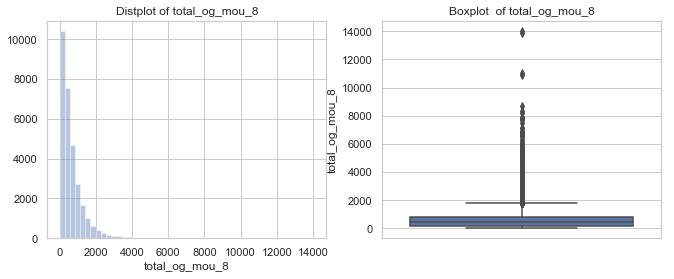

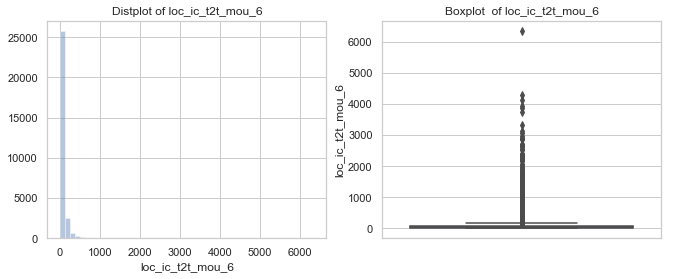

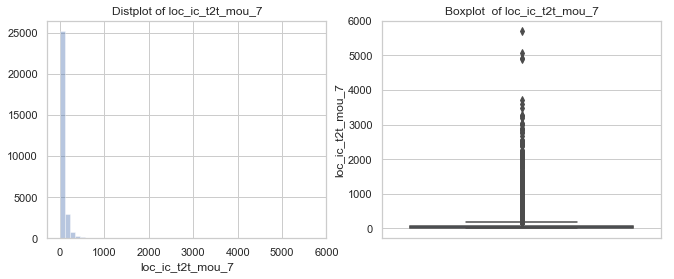

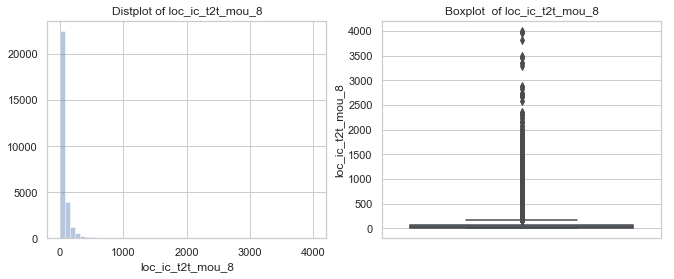

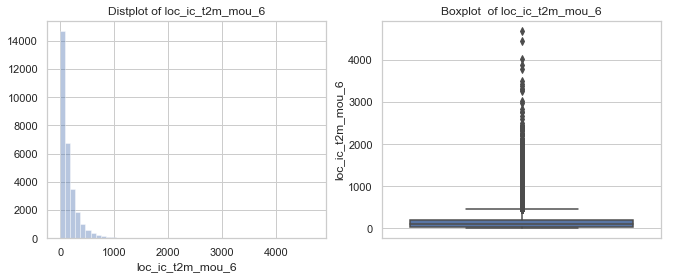

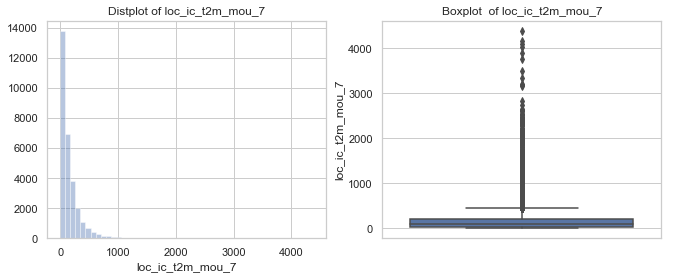

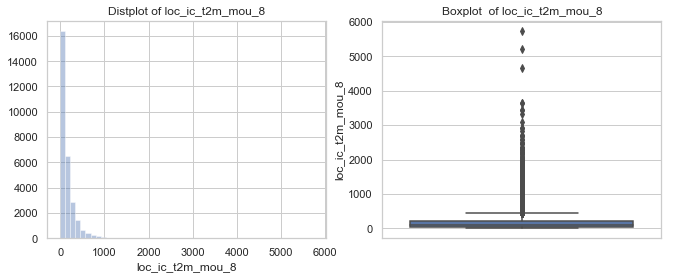

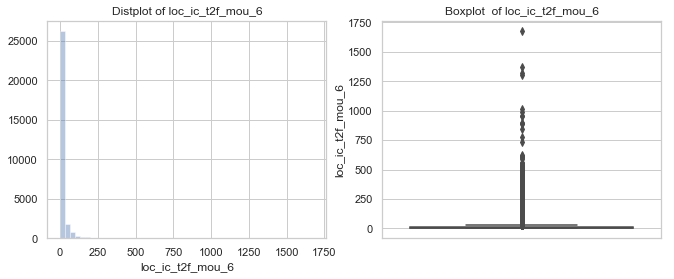

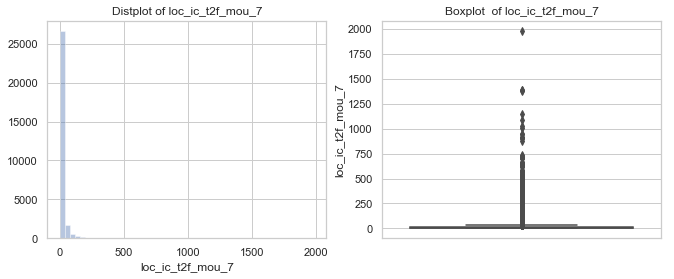

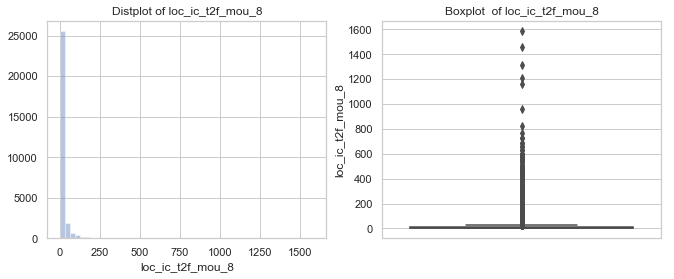

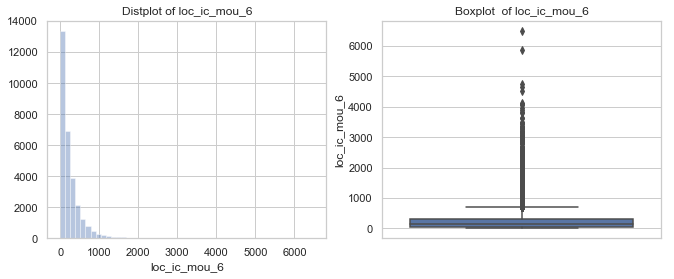

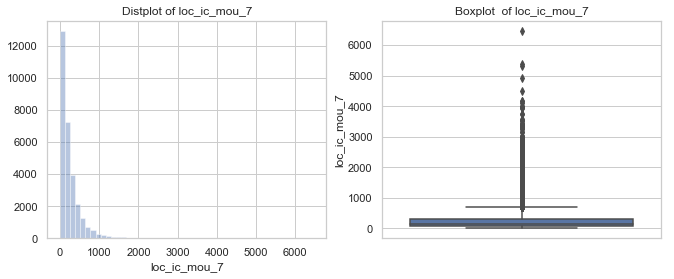

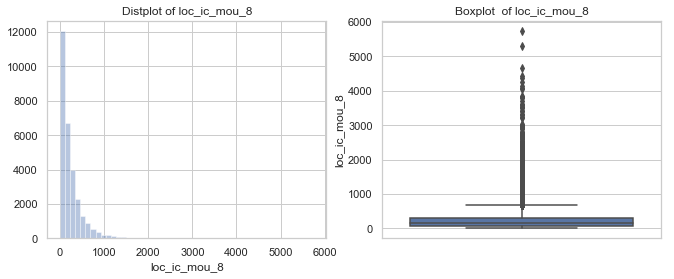

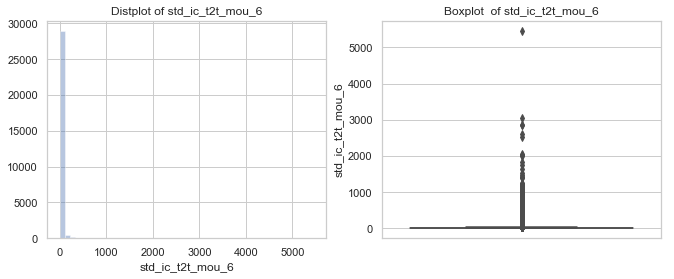

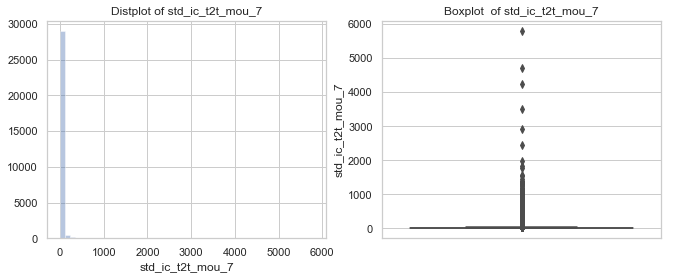

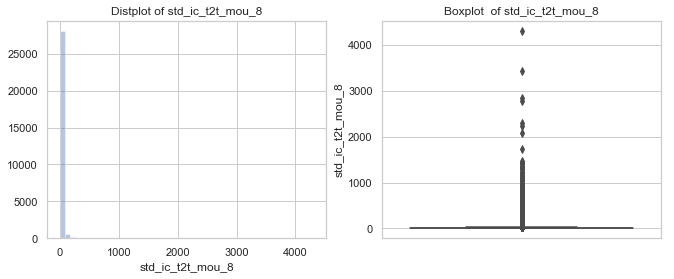

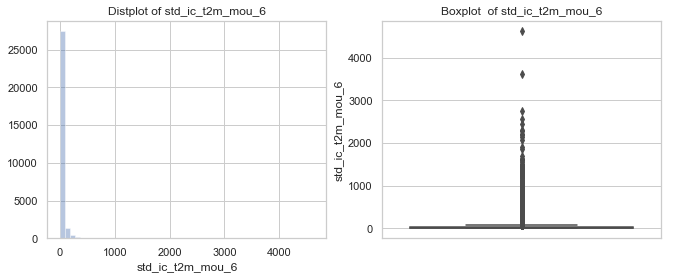

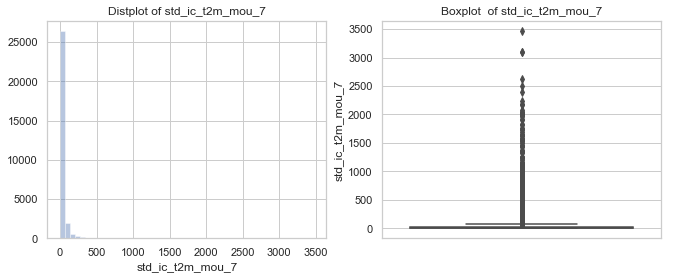

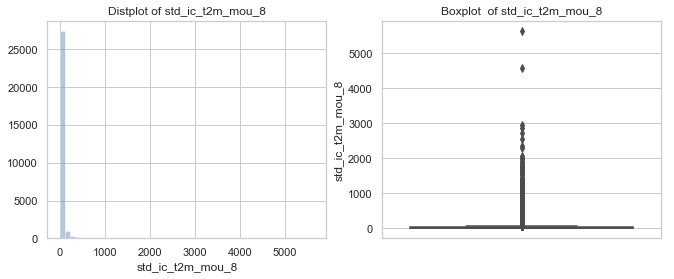

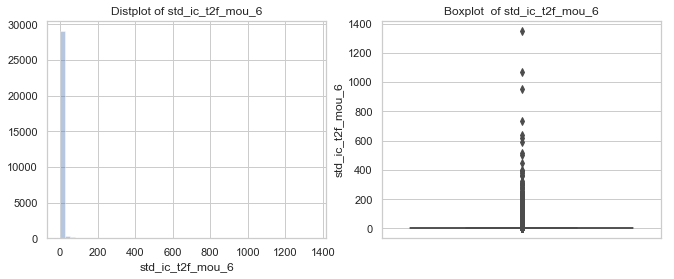

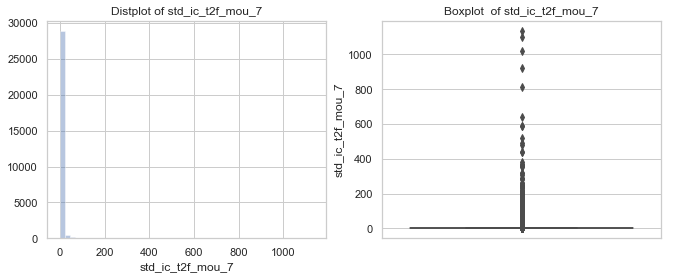

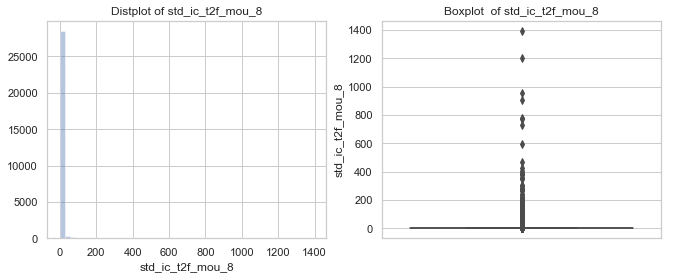

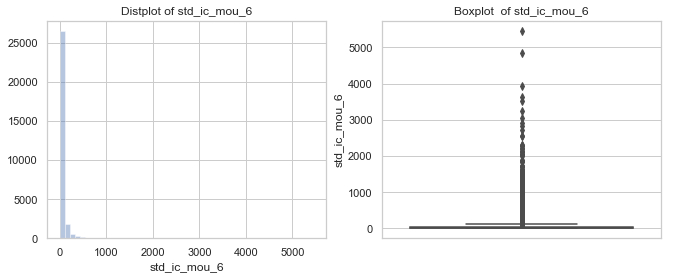

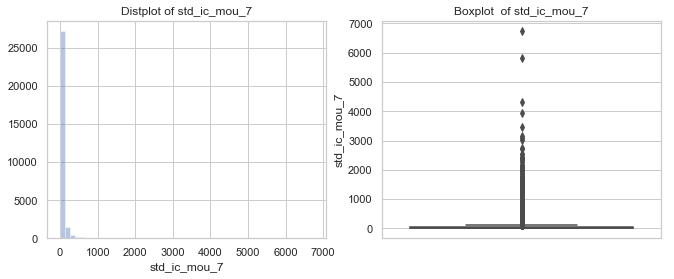

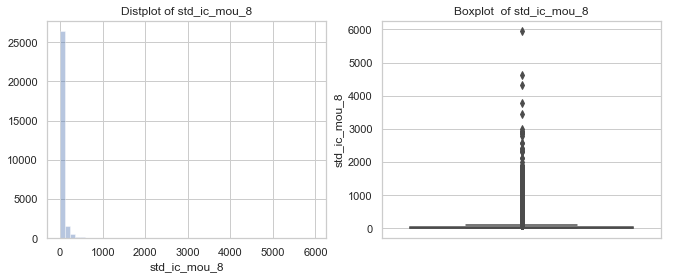

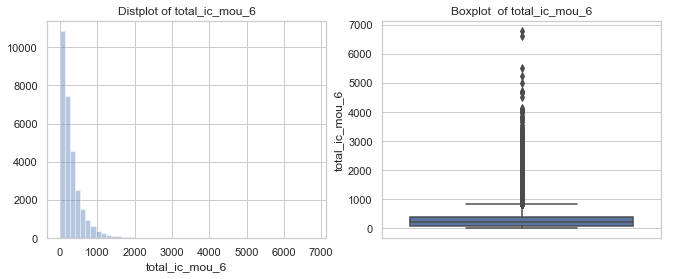

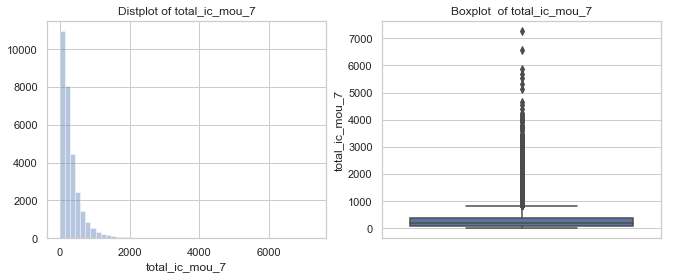

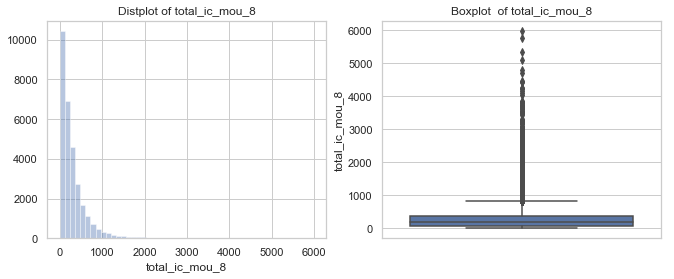

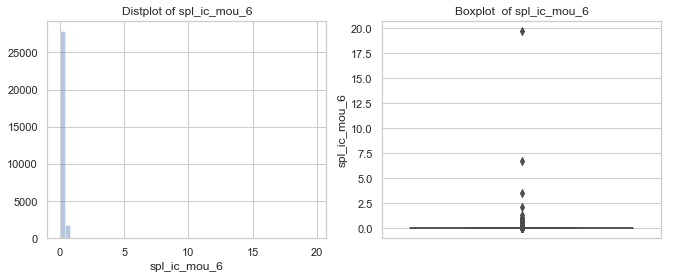

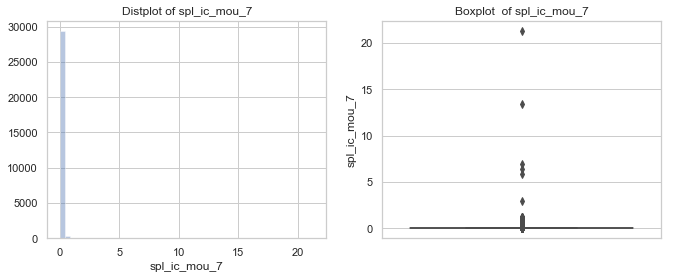

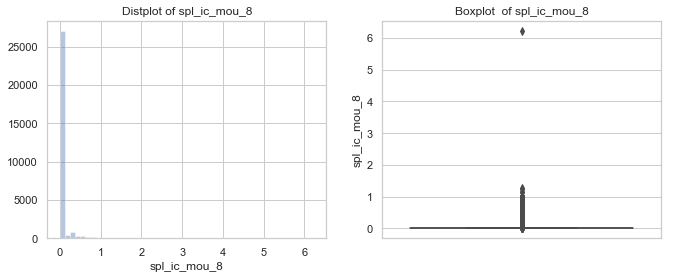

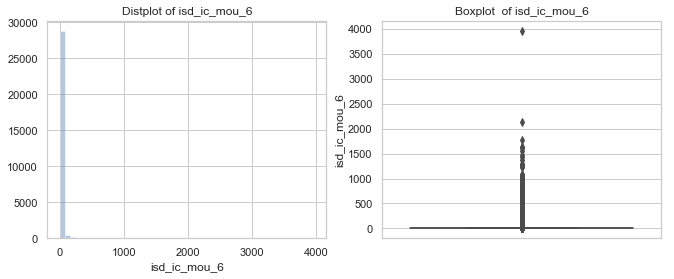

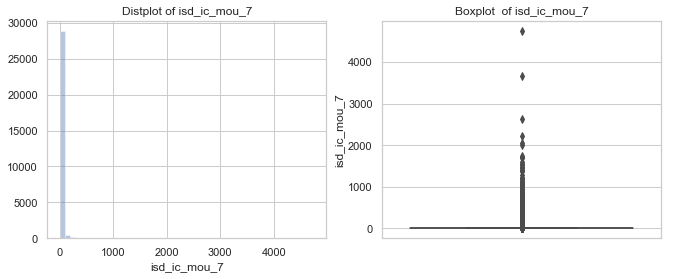

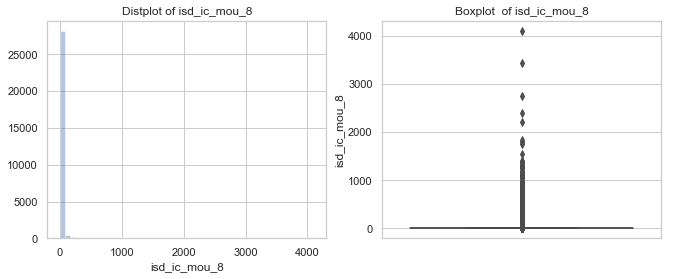

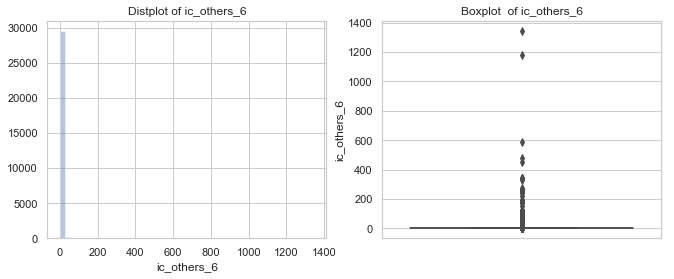

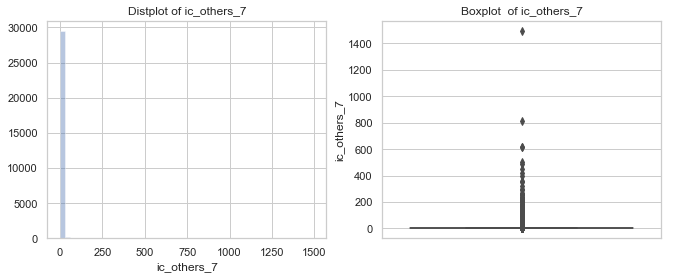

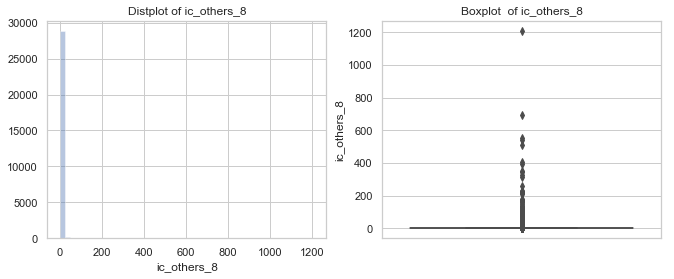

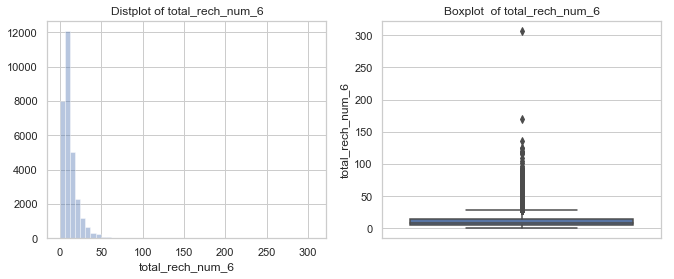

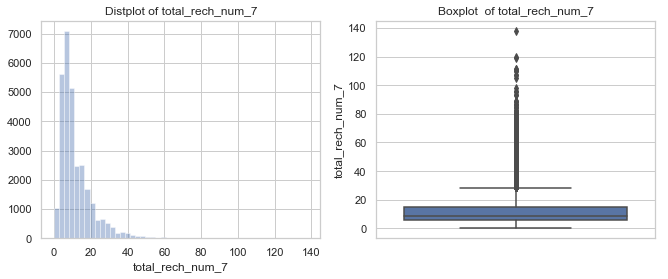

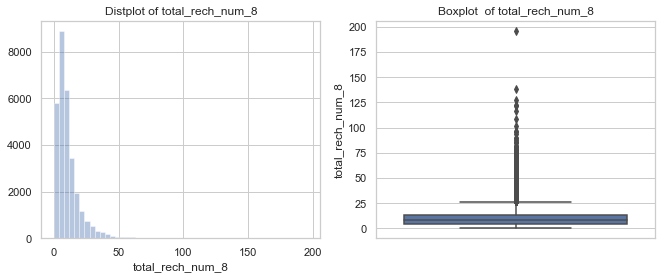

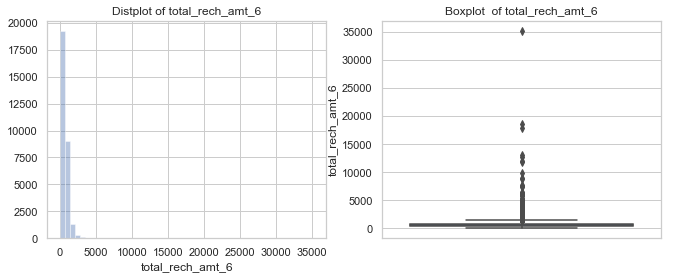

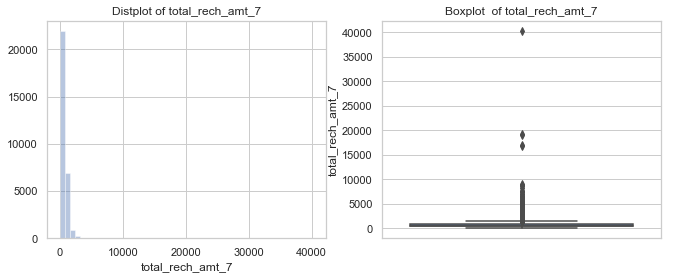

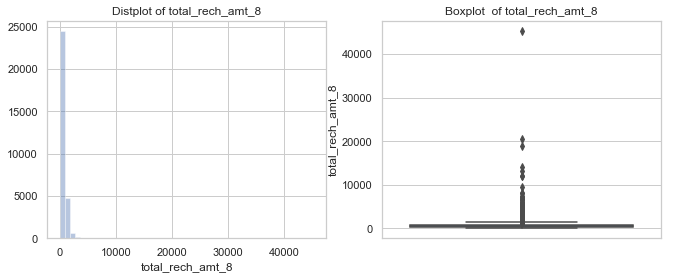

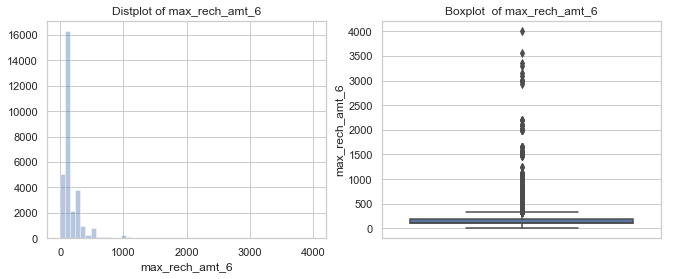

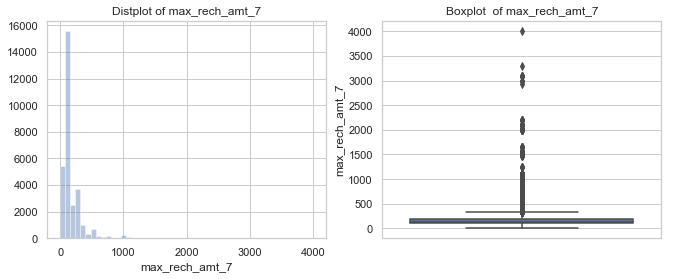

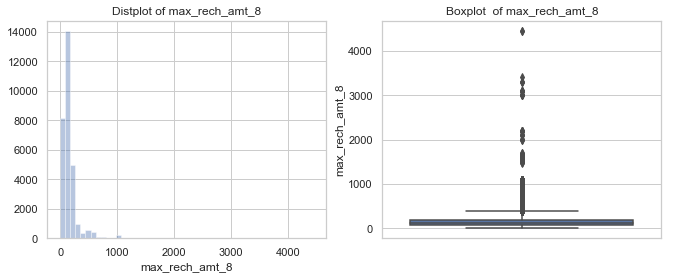

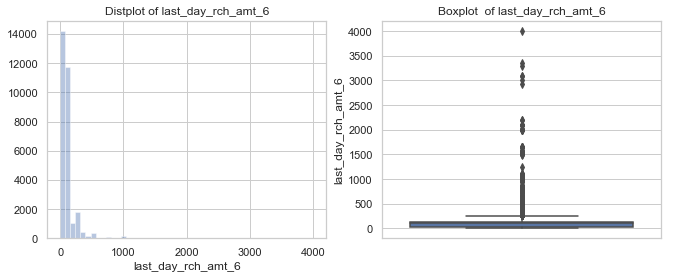

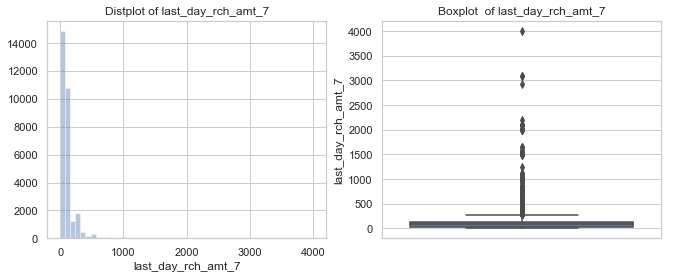

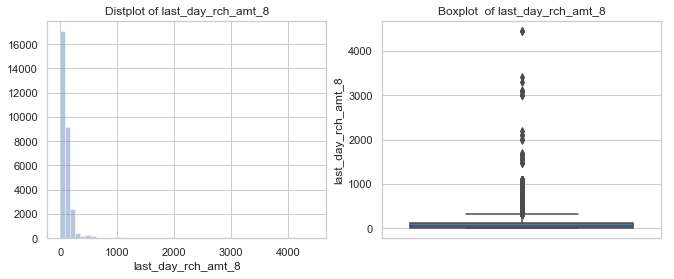

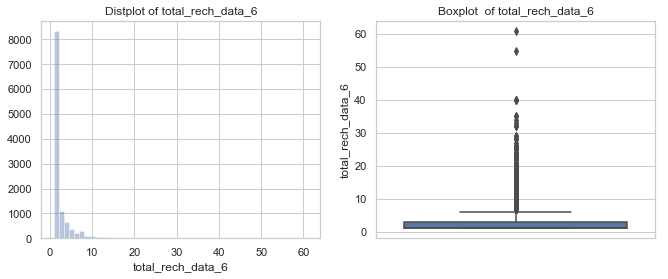

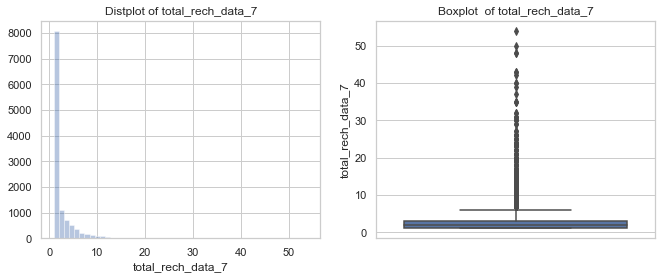

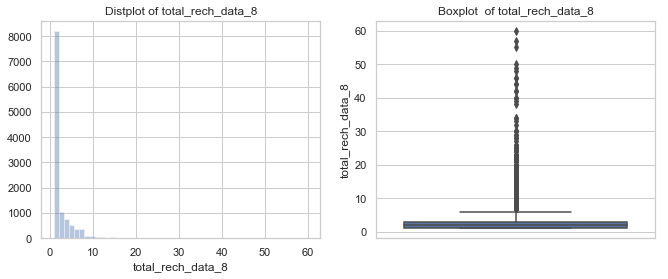

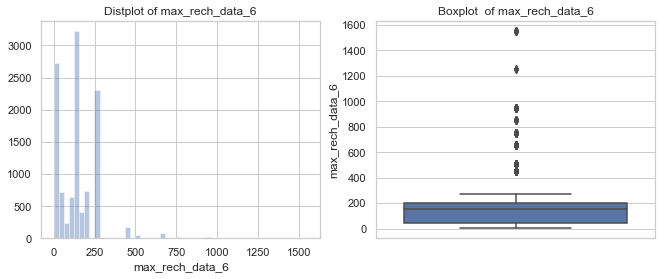

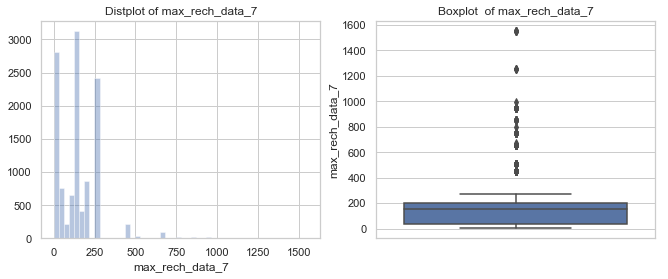

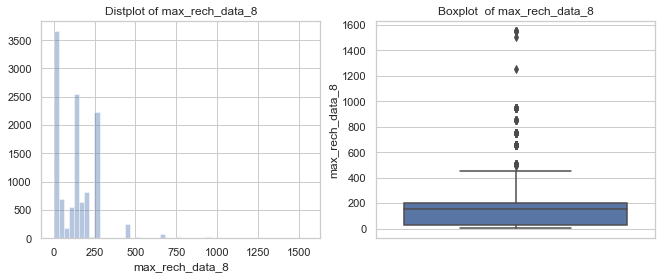

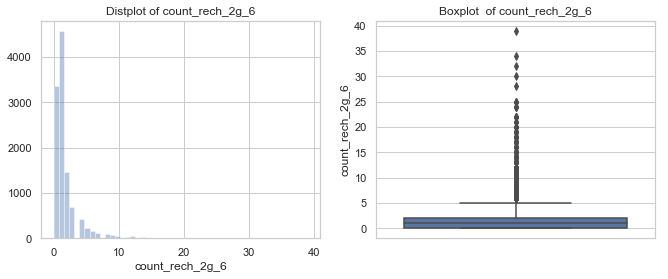

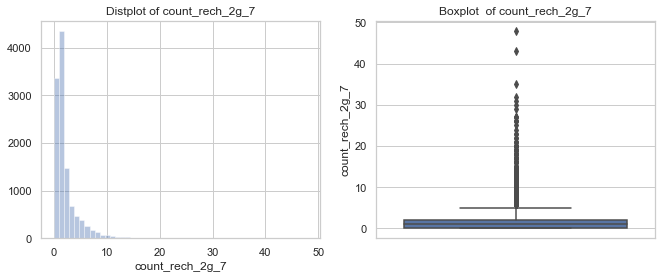

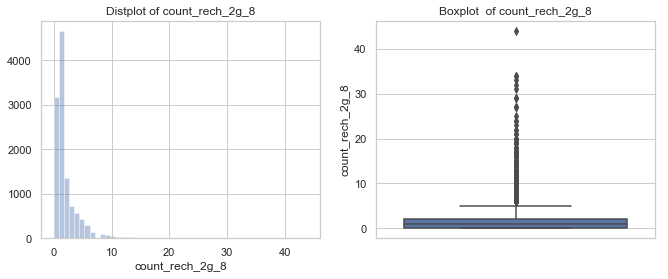

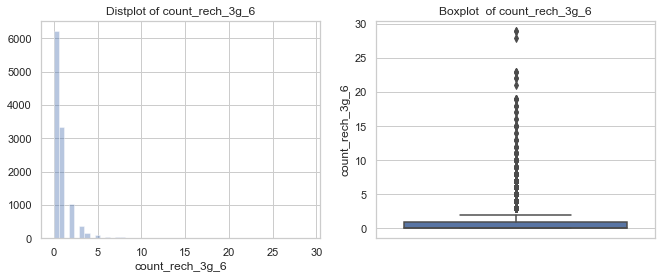

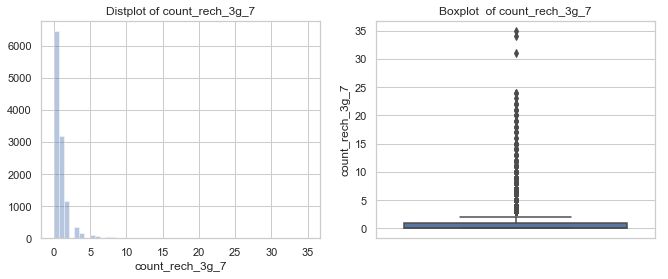

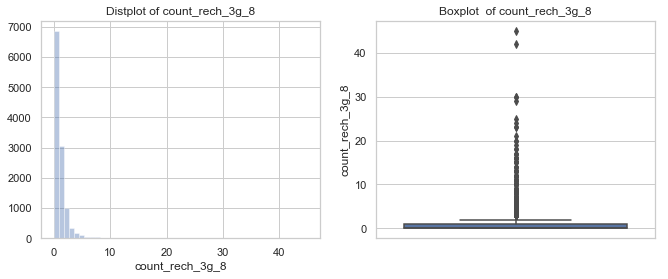

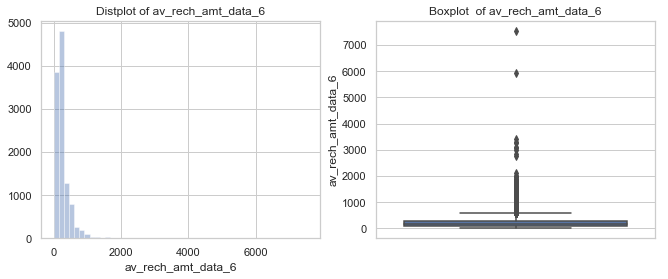

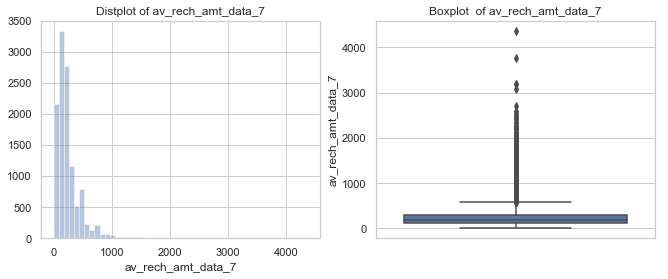

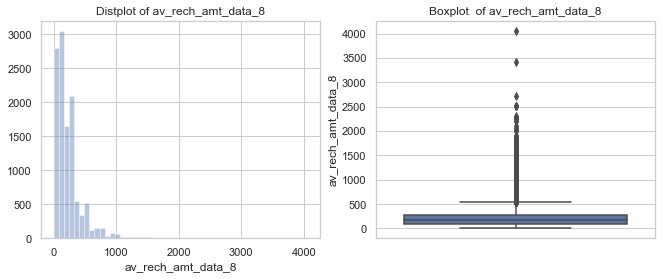

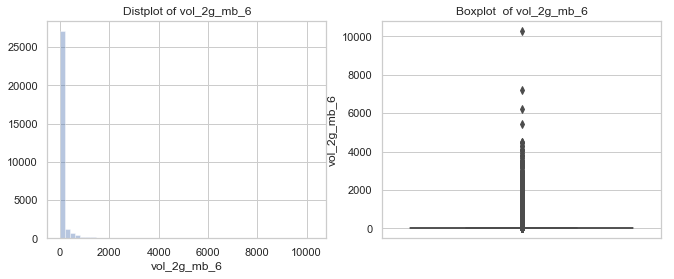

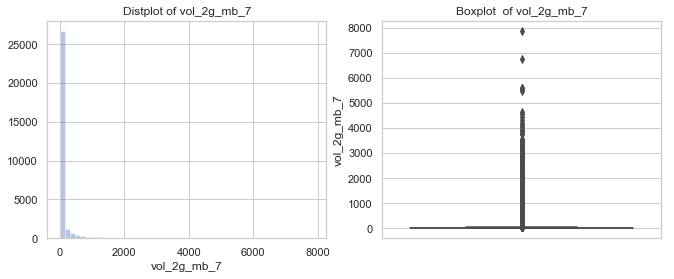

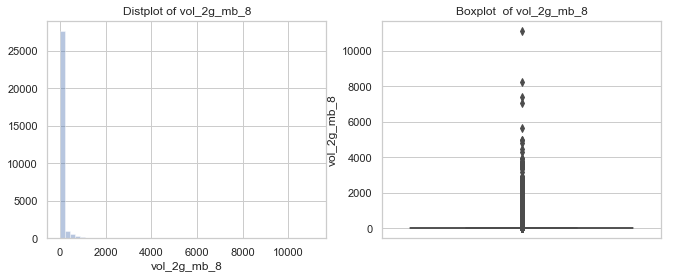

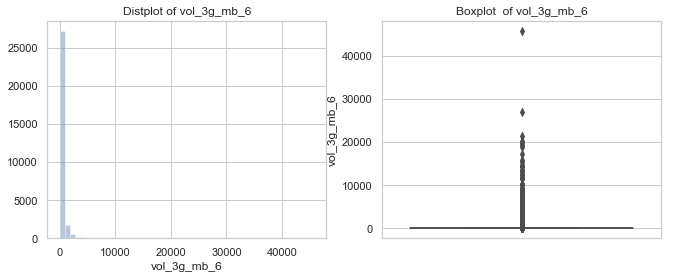

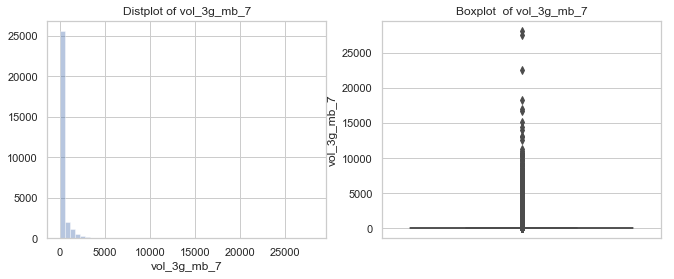

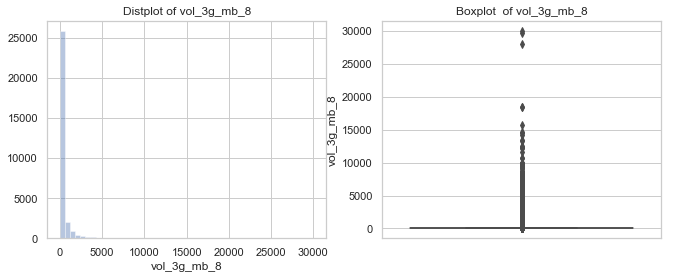

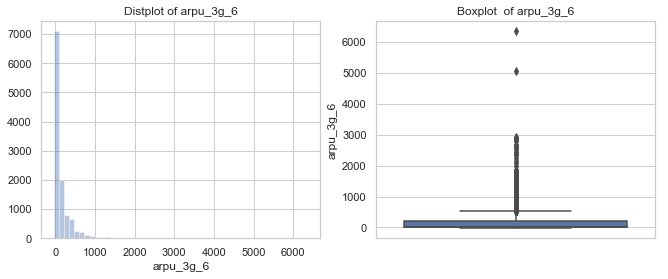

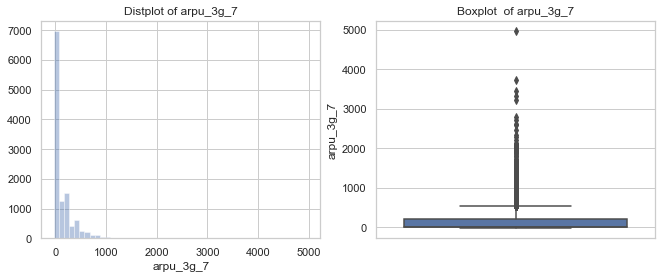

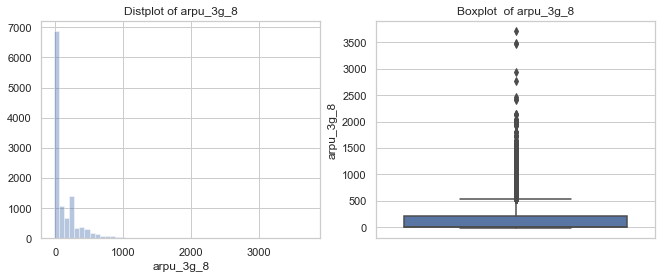

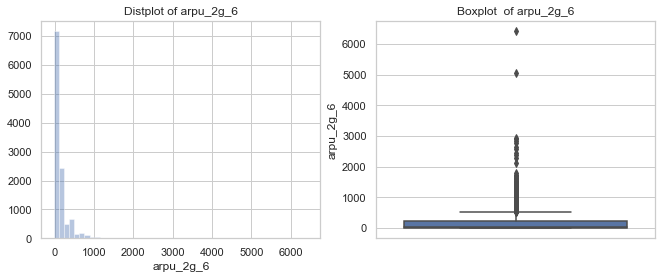

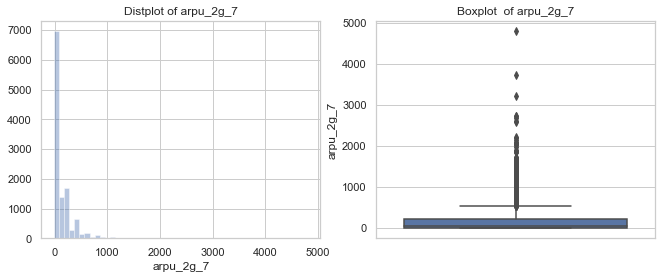

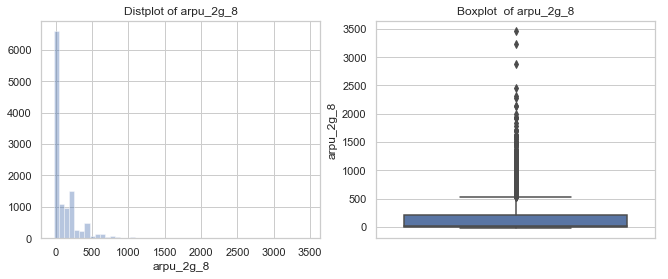

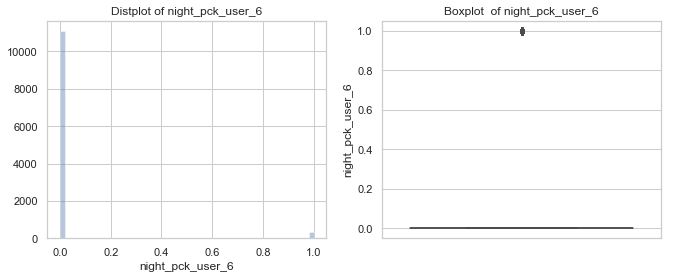

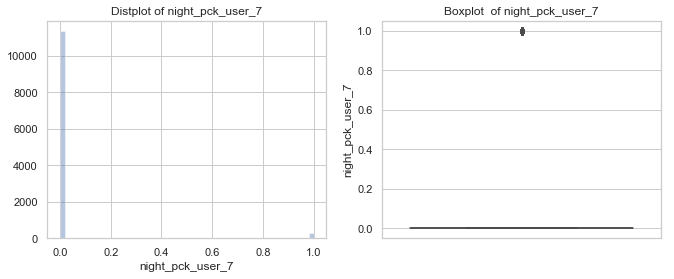

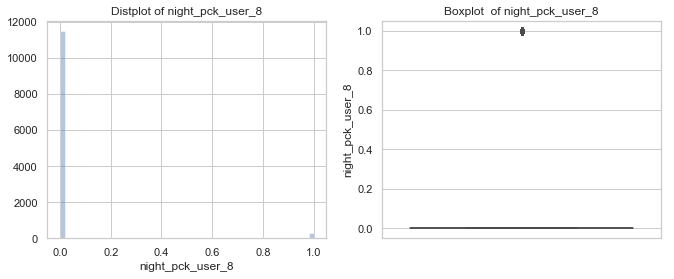

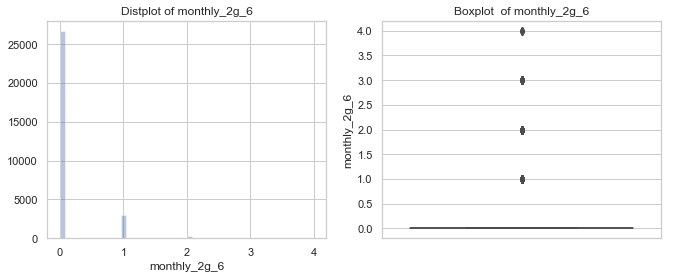

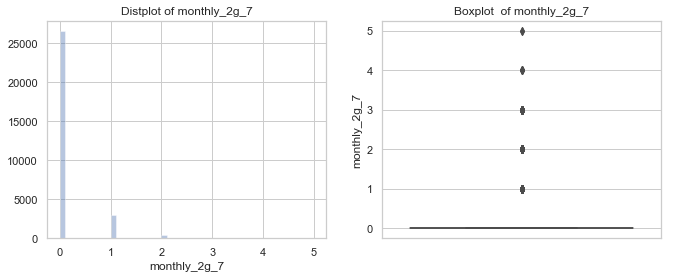

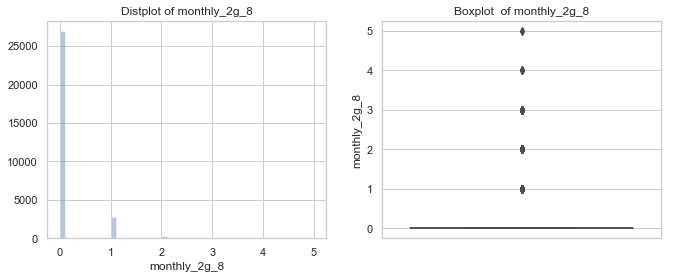

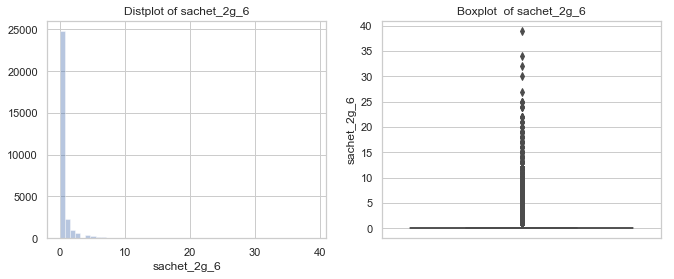

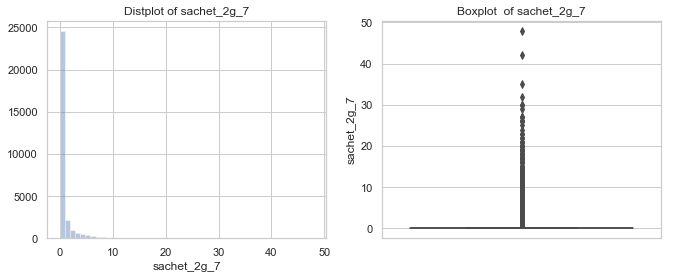

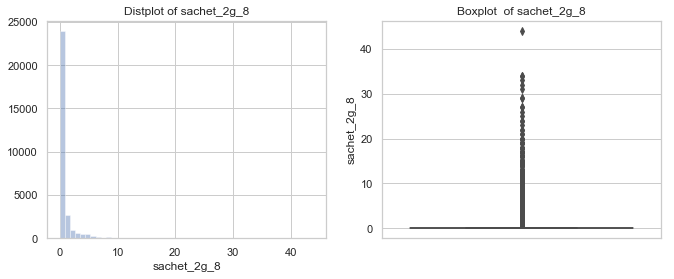

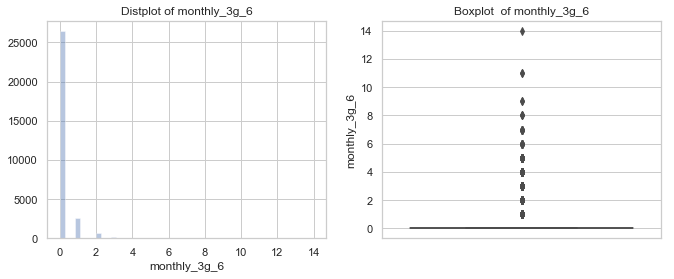

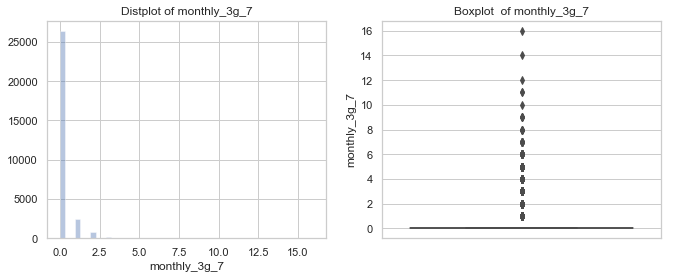

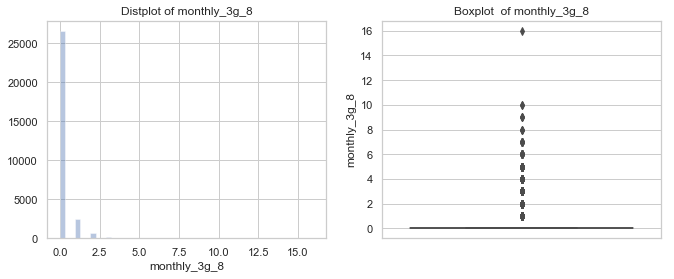

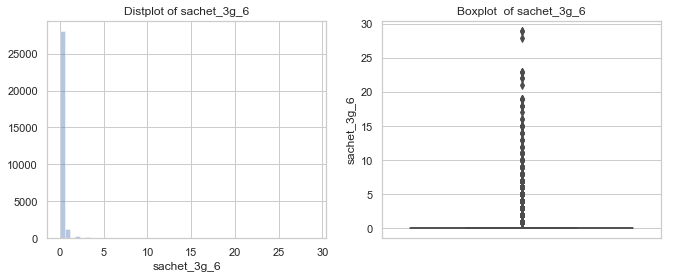

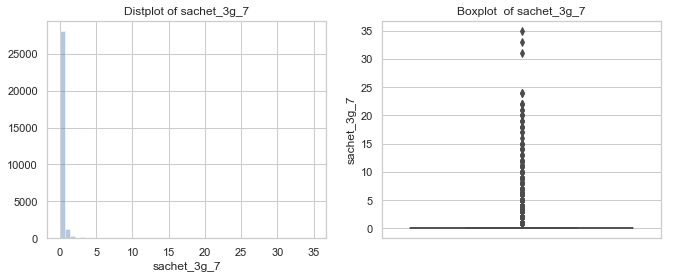

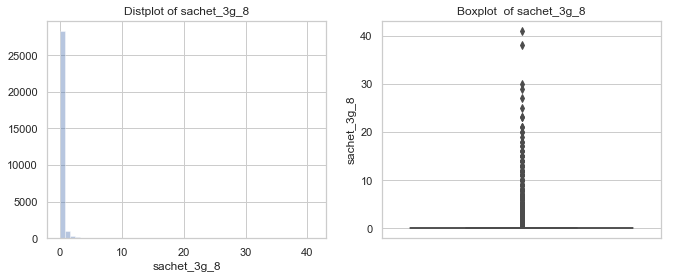

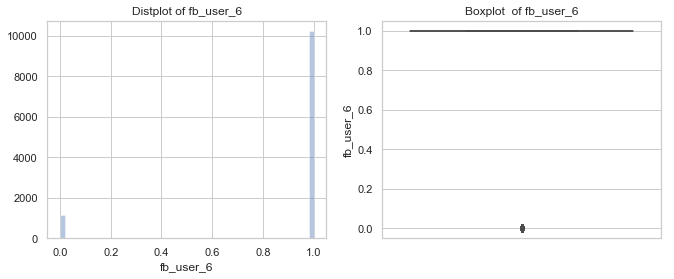

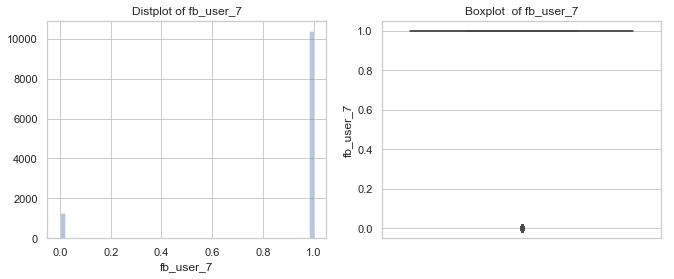

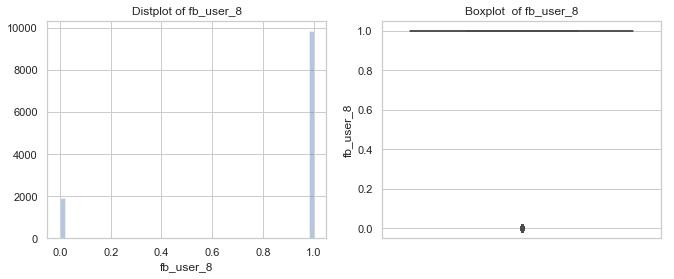

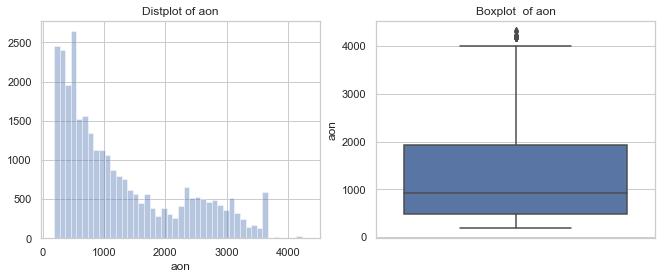

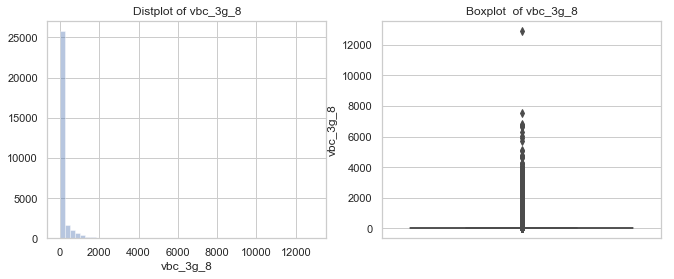

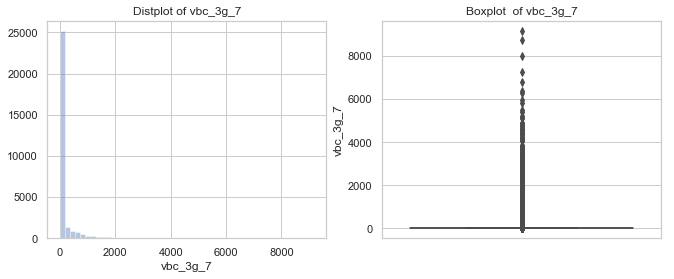

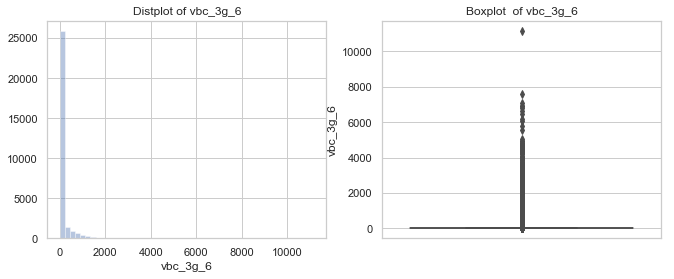

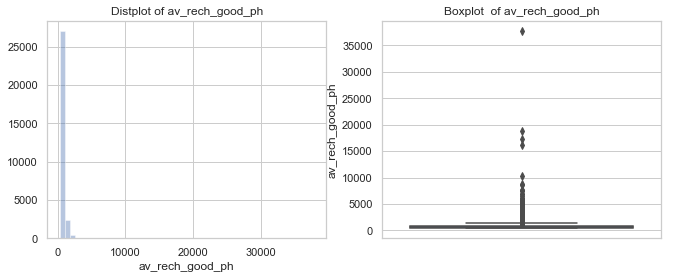

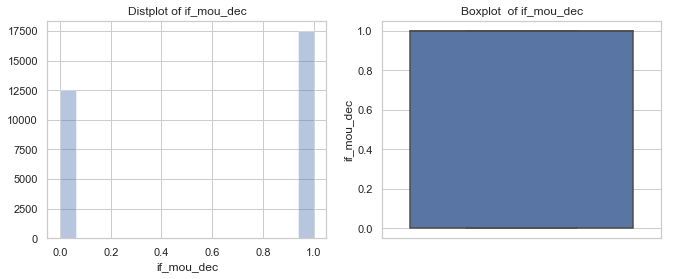

In [48]:
univariate_num(churn_df)

### univariate Analysis
- Almost all the numerical attributes have outliers

In [49]:
def segmented_univariate_cat_target(df,TARGET_var):
    Num=['float64','int32','int64']
    num_columns=list(df.select_dtypes(include=Num).columns)
    #num_columns.remove[TARGET_var]
    for i in num_columns:
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(8, 1))
        print(" The comparision of Avegrages of {} vs Target".format(i))
        sns.barplot(y=TARGET_var,x=i,data=df,orient='h',palette="Set2",estimator=np.median,ci=None)
        plt.show()
        

 The comparision of Avegrages of arpu_6 vs Target


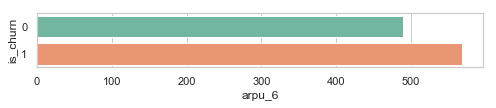

 The comparision of Avegrages of arpu_7 vs Target


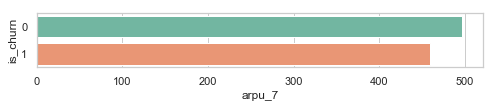

 The comparision of Avegrages of arpu_8 vs Target


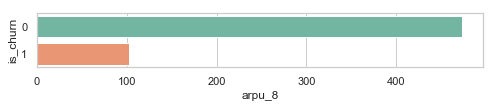

 The comparision of Avegrages of onnet_mou_6 vs Target


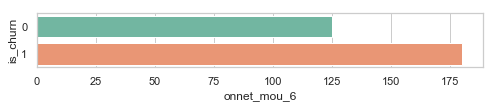

 The comparision of Avegrages of onnet_mou_7 vs Target


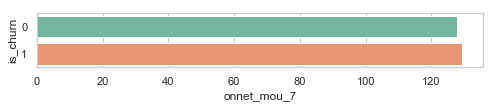

 The comparision of Avegrages of onnet_mou_8 vs Target


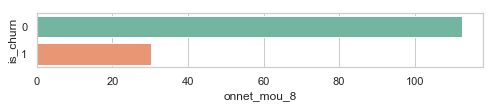

 The comparision of Avegrages of offnet_mou_6 vs Target


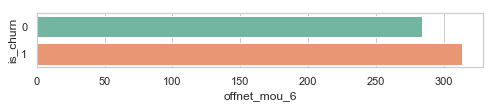

 The comparision of Avegrages of offnet_mou_7 vs Target


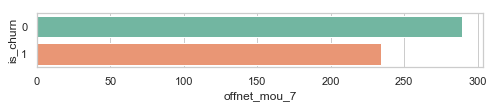

 The comparision of Avegrages of offnet_mou_8 vs Target


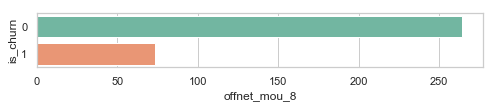

 The comparision of Avegrages of roam_ic_mou_6 vs Target


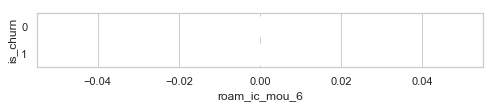

 The comparision of Avegrages of roam_ic_mou_7 vs Target


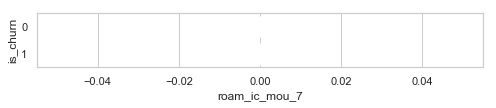

 The comparision of Avegrages of roam_ic_mou_8 vs Target


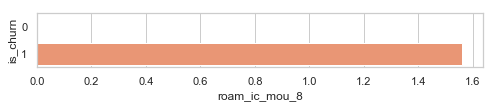

 The comparision of Avegrages of roam_og_mou_6 vs Target


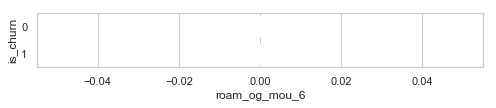

 The comparision of Avegrages of roam_og_mou_7 vs Target


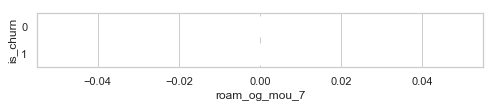

 The comparision of Avegrages of roam_og_mou_8 vs Target


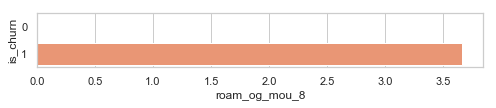

 The comparision of Avegrages of loc_og_t2t_mou_6 vs Target


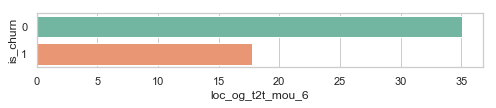

 The comparision of Avegrages of loc_og_t2t_mou_7 vs Target


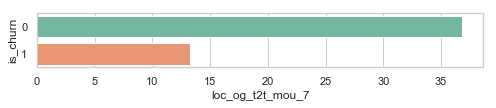

 The comparision of Avegrages of loc_og_t2t_mou_8 vs Target


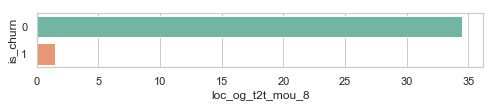

 The comparision of Avegrages of loc_og_t2m_mou_6 vs Target


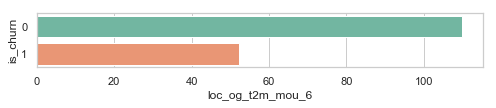

 The comparision of Avegrages of loc_og_t2m_mou_7 vs Target


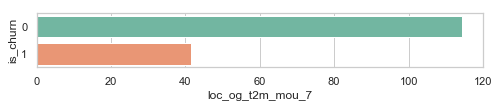

 The comparision of Avegrages of loc_og_t2m_mou_8 vs Target


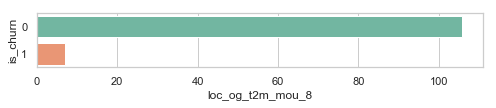

 The comparision of Avegrages of loc_og_t2f_mou_6 vs Target


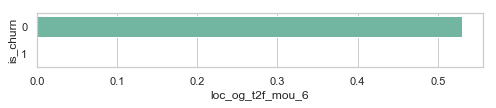

 The comparision of Avegrages of loc_og_t2f_mou_7 vs Target


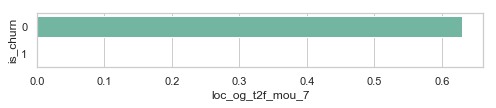

 The comparision of Avegrages of loc_og_t2f_mou_8 vs Target


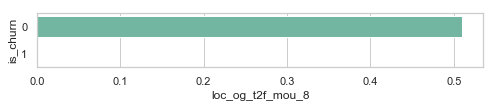

 The comparision of Avegrages of loc_og_t2c_mou_6 vs Target


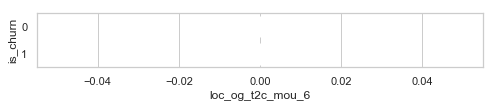

 The comparision of Avegrages of loc_og_t2c_mou_7 vs Target


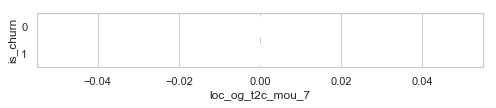

 The comparision of Avegrages of loc_og_t2c_mou_8 vs Target


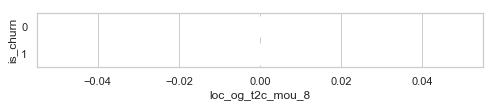

 The comparision of Avegrages of loc_og_mou_6 vs Target


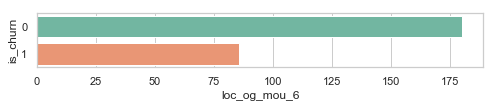

 The comparision of Avegrages of loc_og_mou_7 vs Target


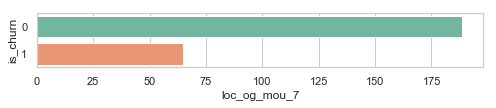

 The comparision of Avegrages of loc_og_mou_8 vs Target


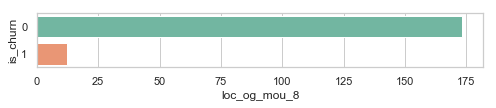

 The comparision of Avegrages of std_og_t2t_mou_6 vs Target


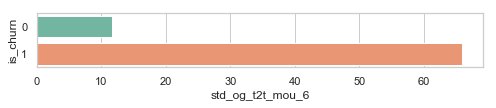

 The comparision of Avegrages of std_og_t2t_mou_7 vs Target


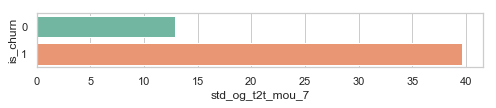

 The comparision of Avegrages of std_og_t2t_mou_8 vs Target


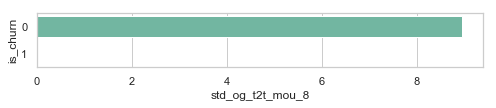

 The comparision of Avegrages of std_og_t2m_mou_6 vs Target


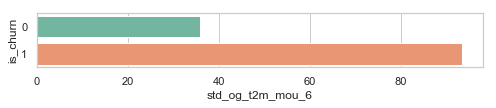

 The comparision of Avegrages of std_og_t2m_mou_7 vs Target


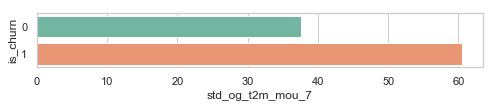

 The comparision of Avegrages of std_og_t2m_mou_8 vs Target


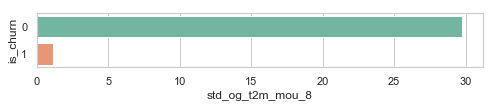

 The comparision of Avegrages of std_og_t2f_mou_6 vs Target


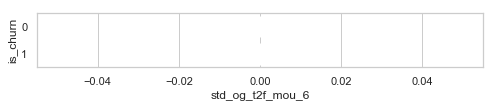

 The comparision of Avegrages of std_og_t2f_mou_7 vs Target


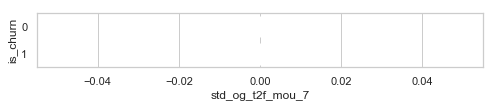

 The comparision of Avegrages of std_og_t2f_mou_8 vs Target


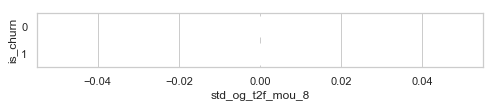

 The comparision of Avegrages of std_og_mou_6 vs Target


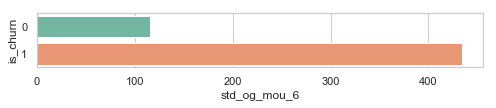

 The comparision of Avegrages of std_og_mou_7 vs Target


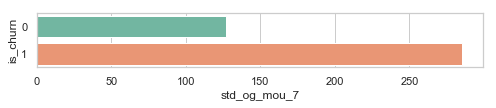

 The comparision of Avegrages of std_og_mou_8 vs Target


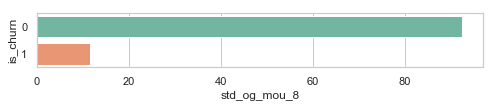

 The comparision of Avegrages of isd_og_mou_6 vs Target


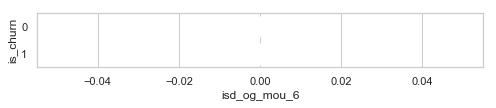

 The comparision of Avegrages of isd_og_mou_7 vs Target


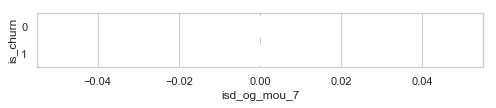

 The comparision of Avegrages of isd_og_mou_8 vs Target


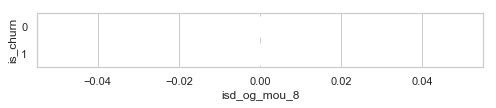

 The comparision of Avegrages of spl_og_mou_6 vs Target


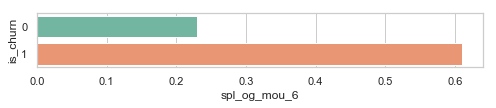

 The comparision of Avegrages of spl_og_mou_7 vs Target


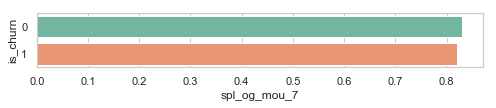

 The comparision of Avegrages of spl_og_mou_8 vs Target


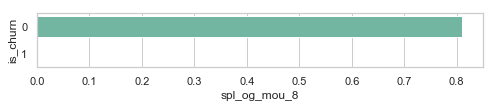

 The comparision of Avegrages of og_others_6 vs Target


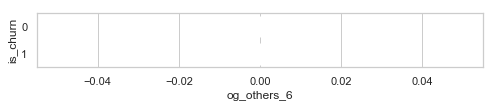

 The comparision of Avegrages of og_others_7 vs Target


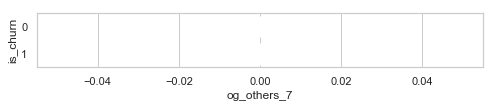

 The comparision of Avegrages of og_others_8 vs Target


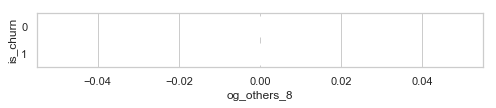

 The comparision of Avegrages of total_og_mou_6 vs Target


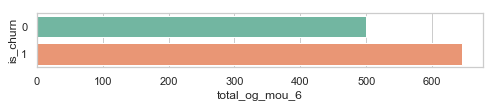

 The comparision of Avegrages of total_og_mou_7 vs Target


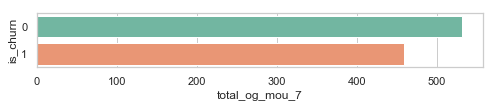

 The comparision of Avegrages of total_og_mou_8 vs Target


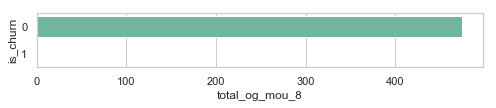

 The comparision of Avegrages of loc_ic_t2t_mou_6 vs Target


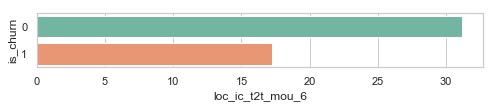

 The comparision of Avegrages of loc_ic_t2t_mou_7 vs Target


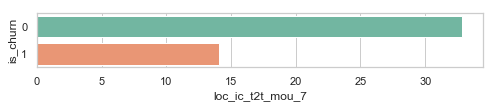

 The comparision of Avegrages of loc_ic_t2t_mou_8 vs Target


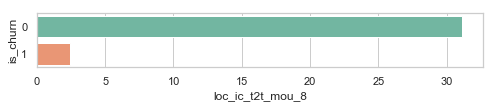

 The comparision of Avegrages of loc_ic_t2m_mou_6 vs Target


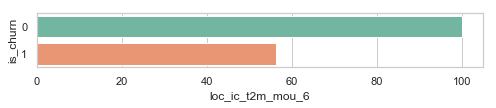

 The comparision of Avegrages of loc_ic_t2m_mou_7 vs Target


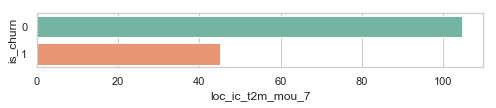

 The comparision of Avegrages of loc_ic_t2m_mou_8 vs Target


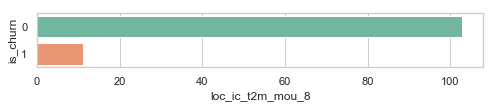

 The comparision of Avegrages of loc_ic_t2f_mou_6 vs Target


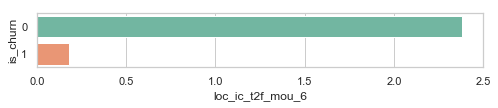

 The comparision of Avegrages of loc_ic_t2f_mou_7 vs Target


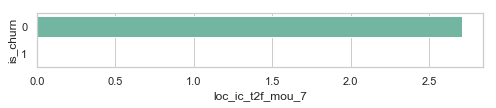

 The comparision of Avegrages of loc_ic_t2f_mou_8 vs Target


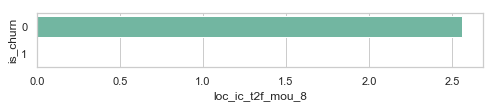

 The comparision of Avegrages of loc_ic_mou_6 vs Target


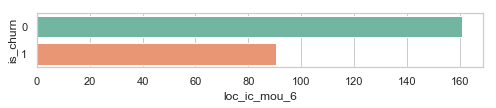

 The comparision of Avegrages of loc_ic_mou_7 vs Target


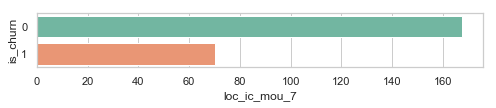

 The comparision of Avegrages of loc_ic_mou_8 vs Target


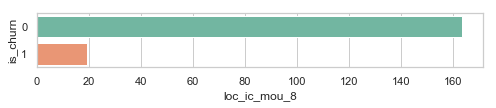

 The comparision of Avegrages of std_ic_t2t_mou_6 vs Target


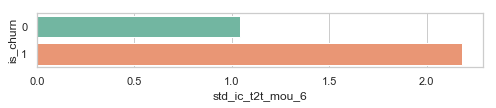

 The comparision of Avegrages of std_ic_t2t_mou_7 vs Target


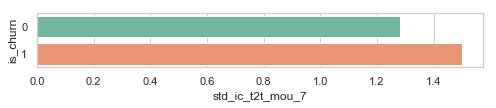

 The comparision of Avegrages of std_ic_t2t_mou_8 vs Target


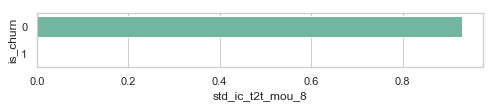

 The comparision of Avegrages of std_ic_t2m_mou_6 vs Target


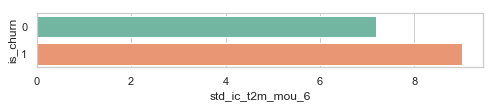

 The comparision of Avegrages of std_ic_t2m_mou_7 vs Target


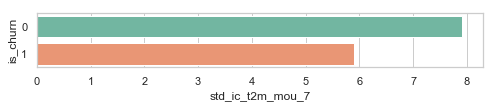

 The comparision of Avegrages of std_ic_t2m_mou_8 vs Target


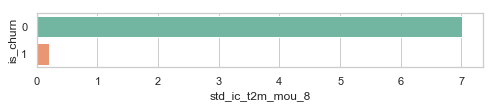

 The comparision of Avegrages of std_ic_t2f_mou_6 vs Target


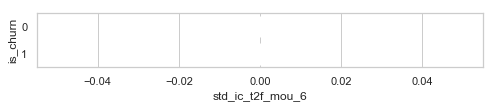

 The comparision of Avegrages of std_ic_t2f_mou_7 vs Target


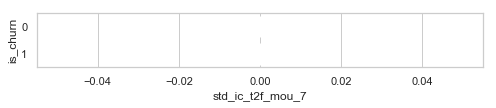

 The comparision of Avegrages of std_ic_t2f_mou_8 vs Target


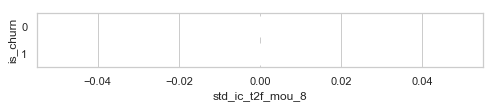

 The comparision of Avegrages of std_ic_mou_6 vs Target


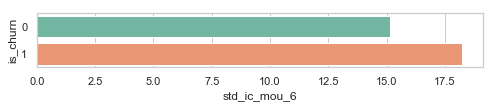

 The comparision of Avegrages of std_ic_mou_7 vs Target


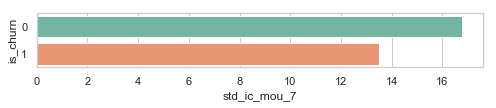

 The comparision of Avegrages of std_ic_mou_8 vs Target


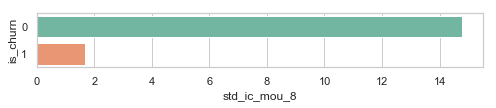

 The comparision of Avegrages of total_ic_mou_6 vs Target


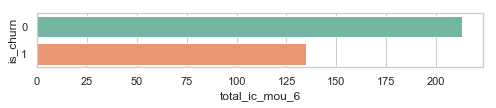

 The comparision of Avegrages of total_ic_mou_7 vs Target


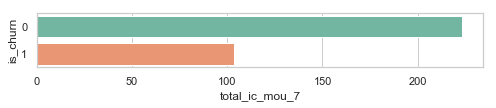

 The comparision of Avegrages of total_ic_mou_8 vs Target


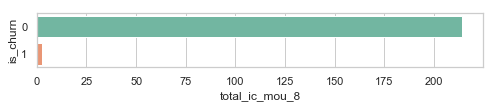

 The comparision of Avegrages of spl_ic_mou_6 vs Target


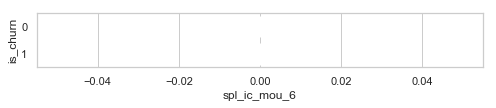

 The comparision of Avegrages of spl_ic_mou_7 vs Target


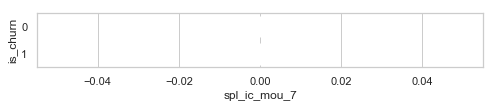

 The comparision of Avegrages of spl_ic_mou_8 vs Target


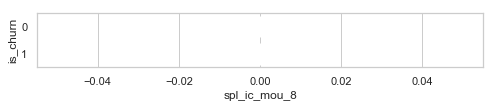

 The comparision of Avegrages of isd_ic_mou_6 vs Target


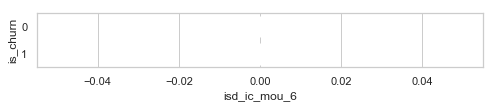

 The comparision of Avegrages of isd_ic_mou_7 vs Target


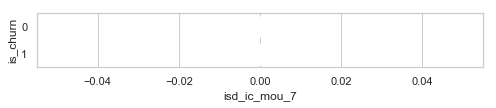

 The comparision of Avegrages of isd_ic_mou_8 vs Target


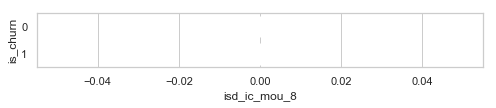

 The comparision of Avegrages of ic_others_6 vs Target


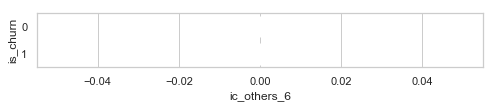

 The comparision of Avegrages of ic_others_7 vs Target


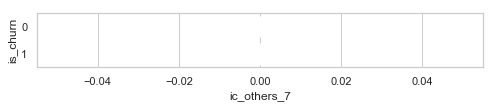

 The comparision of Avegrages of ic_others_8 vs Target


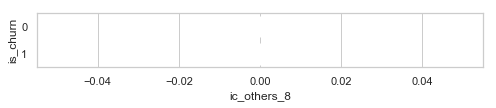

 The comparision of Avegrages of total_rech_num_6 vs Target


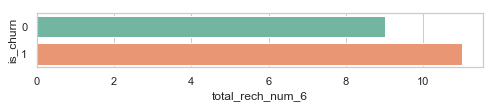

 The comparision of Avegrages of total_rech_num_7 vs Target


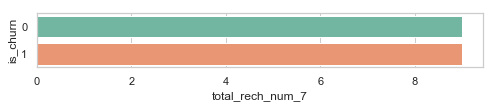

 The comparision of Avegrages of total_rech_num_8 vs Target


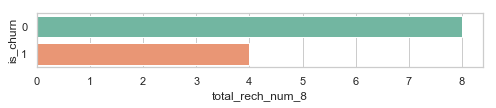

 The comparision of Avegrages of total_rech_amt_6 vs Target


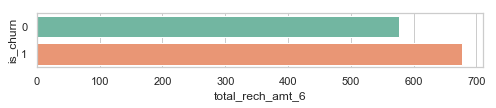

 The comparision of Avegrages of total_rech_amt_7 vs Target


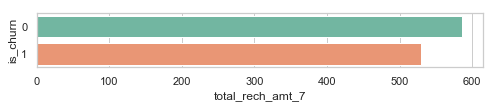

 The comparision of Avegrages of total_rech_amt_8 vs Target


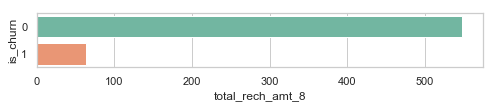

 The comparision of Avegrages of max_rech_amt_6 vs Target


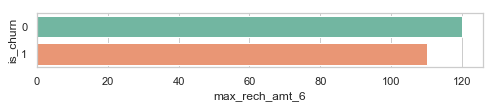

 The comparision of Avegrages of max_rech_amt_7 vs Target


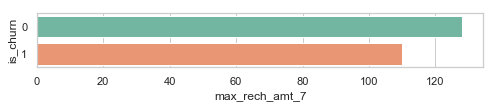

 The comparision of Avegrages of max_rech_amt_8 vs Target


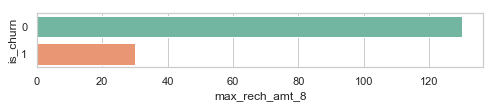

 The comparision of Avegrages of last_day_rch_amt_6 vs Target


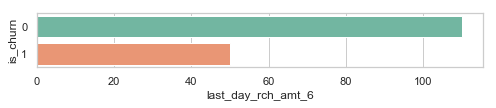

 The comparision of Avegrages of last_day_rch_amt_7 vs Target


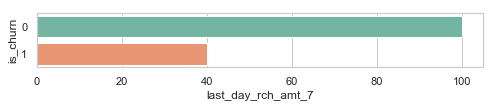

 The comparision of Avegrages of last_day_rch_amt_8 vs Target


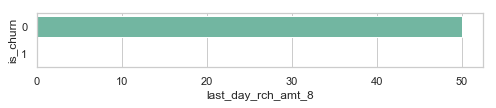

 The comparision of Avegrages of total_rech_data_6 vs Target


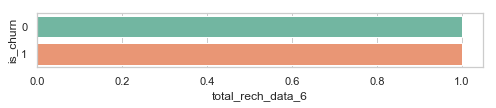

 The comparision of Avegrages of total_rech_data_7 vs Target


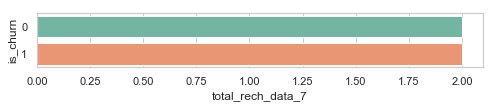

 The comparision of Avegrages of total_rech_data_8 vs Target


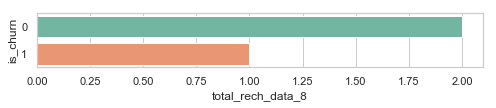

 The comparision of Avegrages of max_rech_data_6 vs Target


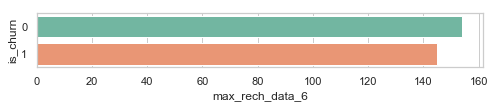

 The comparision of Avegrages of max_rech_data_7 vs Target


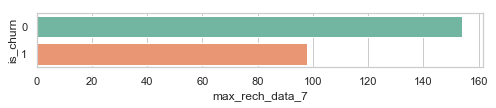

 The comparision of Avegrages of max_rech_data_8 vs Target


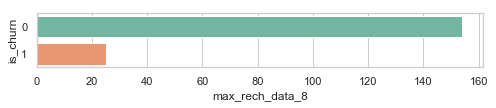

 The comparision of Avegrages of count_rech_2g_6 vs Target


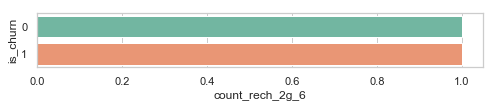

 The comparision of Avegrages of count_rech_2g_7 vs Target


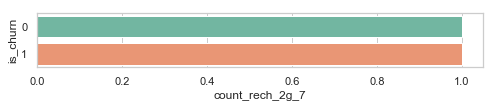

 The comparision of Avegrages of count_rech_2g_8 vs Target


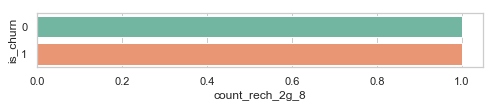

 The comparision of Avegrages of count_rech_3g_6 vs Target


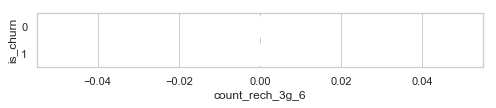

 The comparision of Avegrages of count_rech_3g_7 vs Target


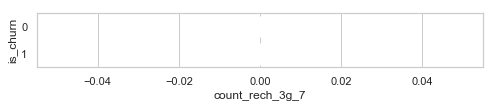

 The comparision of Avegrages of count_rech_3g_8 vs Target


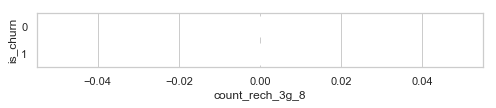

 The comparision of Avegrages of av_rech_amt_data_6 vs Target


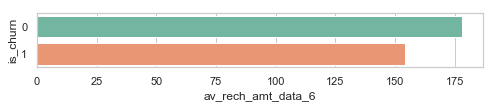

 The comparision of Avegrages of av_rech_amt_data_7 vs Target


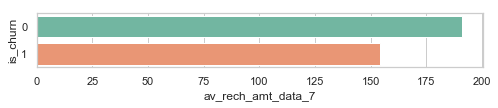

 The comparision of Avegrages of av_rech_amt_data_8 vs Target


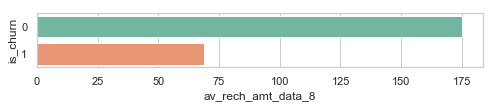

 The comparision of Avegrages of vol_2g_mb_6 vs Target


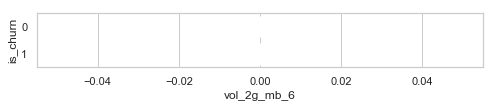

 The comparision of Avegrages of vol_2g_mb_7 vs Target


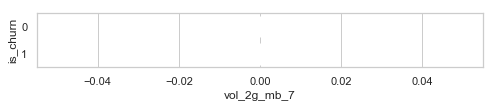

 The comparision of Avegrages of vol_2g_mb_8 vs Target


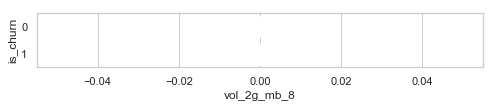

 The comparision of Avegrages of vol_3g_mb_6 vs Target


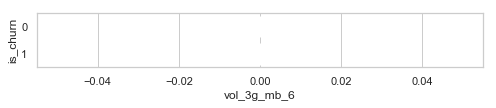

 The comparision of Avegrages of vol_3g_mb_7 vs Target


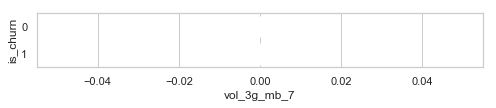

 The comparision of Avegrages of vol_3g_mb_8 vs Target


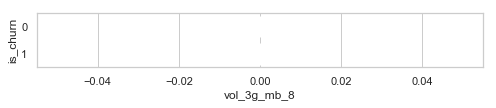

 The comparision of Avegrages of arpu_3g_6 vs Target


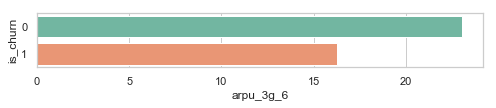

 The comparision of Avegrages of arpu_3g_7 vs Target


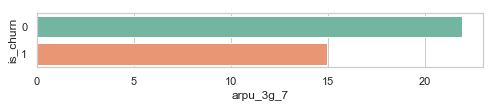

 The comparision of Avegrages of arpu_3g_8 vs Target


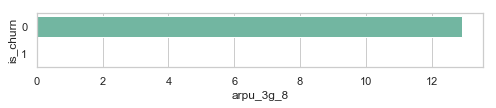

 The comparision of Avegrages of arpu_2g_6 vs Target


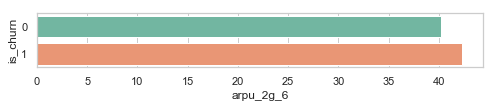

 The comparision of Avegrages of arpu_2g_7 vs Target


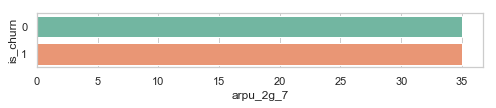

 The comparision of Avegrages of arpu_2g_8 vs Target


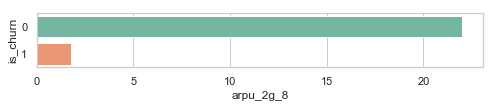

 The comparision of Avegrages of night_pck_user_6 vs Target


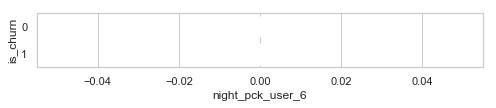

 The comparision of Avegrages of night_pck_user_7 vs Target


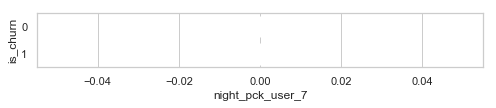

 The comparision of Avegrages of night_pck_user_8 vs Target


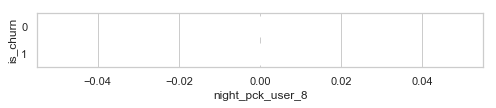

 The comparision of Avegrages of monthly_2g_6 vs Target


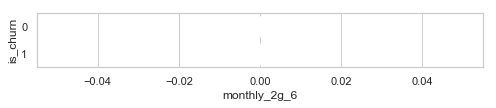

 The comparision of Avegrages of monthly_2g_7 vs Target


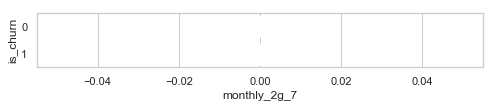

 The comparision of Avegrages of monthly_2g_8 vs Target


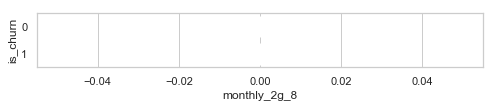

 The comparision of Avegrages of sachet_2g_6 vs Target


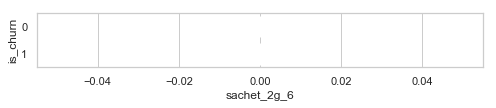

 The comparision of Avegrages of sachet_2g_7 vs Target


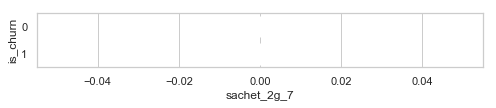

 The comparision of Avegrages of sachet_2g_8 vs Target


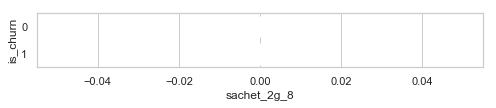

 The comparision of Avegrages of monthly_3g_6 vs Target


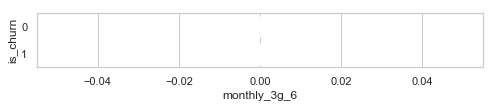

 The comparision of Avegrages of monthly_3g_7 vs Target


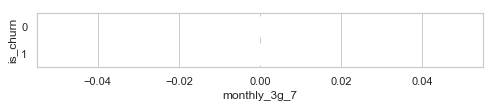

 The comparision of Avegrages of monthly_3g_8 vs Target


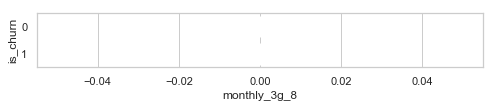

 The comparision of Avegrages of sachet_3g_6 vs Target


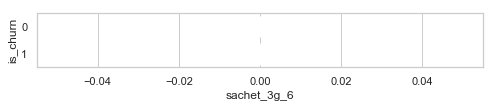

 The comparision of Avegrages of sachet_3g_7 vs Target


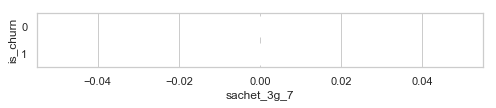

 The comparision of Avegrages of sachet_3g_8 vs Target


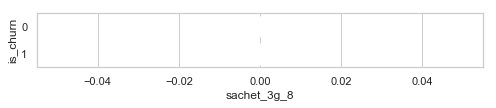

 The comparision of Avegrages of fb_user_6 vs Target


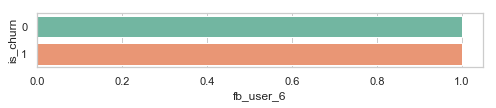

 The comparision of Avegrages of fb_user_7 vs Target


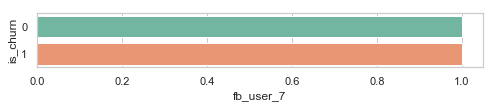

 The comparision of Avegrages of fb_user_8 vs Target


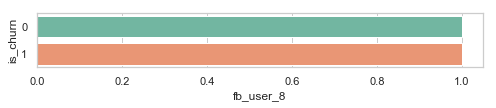

 The comparision of Avegrages of aon vs Target


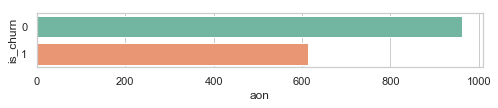

 The comparision of Avegrages of vbc_3g_8 vs Target


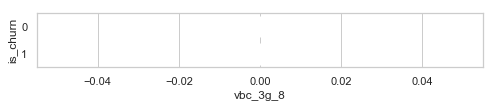

 The comparision of Avegrages of vbc_3g_7 vs Target


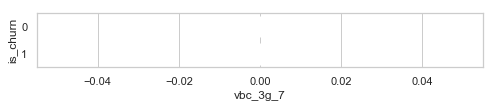

 The comparision of Avegrages of vbc_3g_6 vs Target


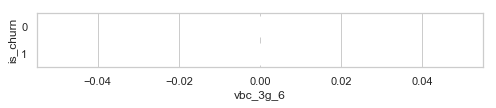

 The comparision of Avegrages of av_rech_good_ph vs Target


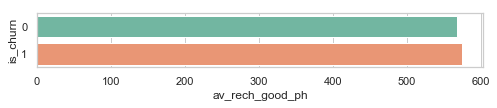

 The comparision of Avegrages of if_mou_dec vs Target


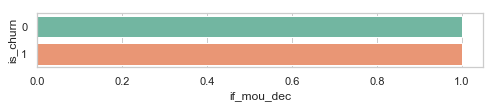

In [50]:
segmented_univariate_cat_target(churn_df,'is_churn')

### Segmented analysis
-	The median of Average revenue per user is decreasing constantly from month 6 to 8 for customers who are going to churn.
-	The median of Onnet minutes of usage is also decreasing constantly from month 6 to 8 for customers who are going to churn.
-	The median of Offnet minutes of usage is also decreasing constantly from month 6 to 8 for customers who are going to churn.
-	The total outgoing mou is also decreasing constantly from month 6 to 8 for customers who are going to churn and it is zero for the month 8.
-	Even the median of total income mou is decreasing from month 6 to 8 for customers who are going to churn and for month 8 it is approaching almost zero.
-	The median of total recharge done is also decreasing constantly from month 6 to 8 for customers who are going to churn.
-	last_day_rch_amt_8 is zero for churners.
-	The median of arpu_3g is also decreasing from month 6 to 8 for customers who are going to churn.
-	The median of average age on network of churners is  less than that of non churners. That means people who are new to the network are churning more.


In [51]:
cor=round(churn_df.corr(),2)
cor.to_csv('cor_num.csv')

In [52]:
#Bivaraite Analysis
def bivariate_num(df):
    temp_df=df.select_dtypes(include=['float64','int64'])
    cor=round(temp_df.corr(),2)
    plt.figure(figsize=(45,45))
    ax=plt.axes()
    sns.heatmap(cor,fmt='.1f',cmap='coolwarm',ax=ax)
    ax.set_title('Heatmap showing correlated values for the Numerical data')
    plt.show()

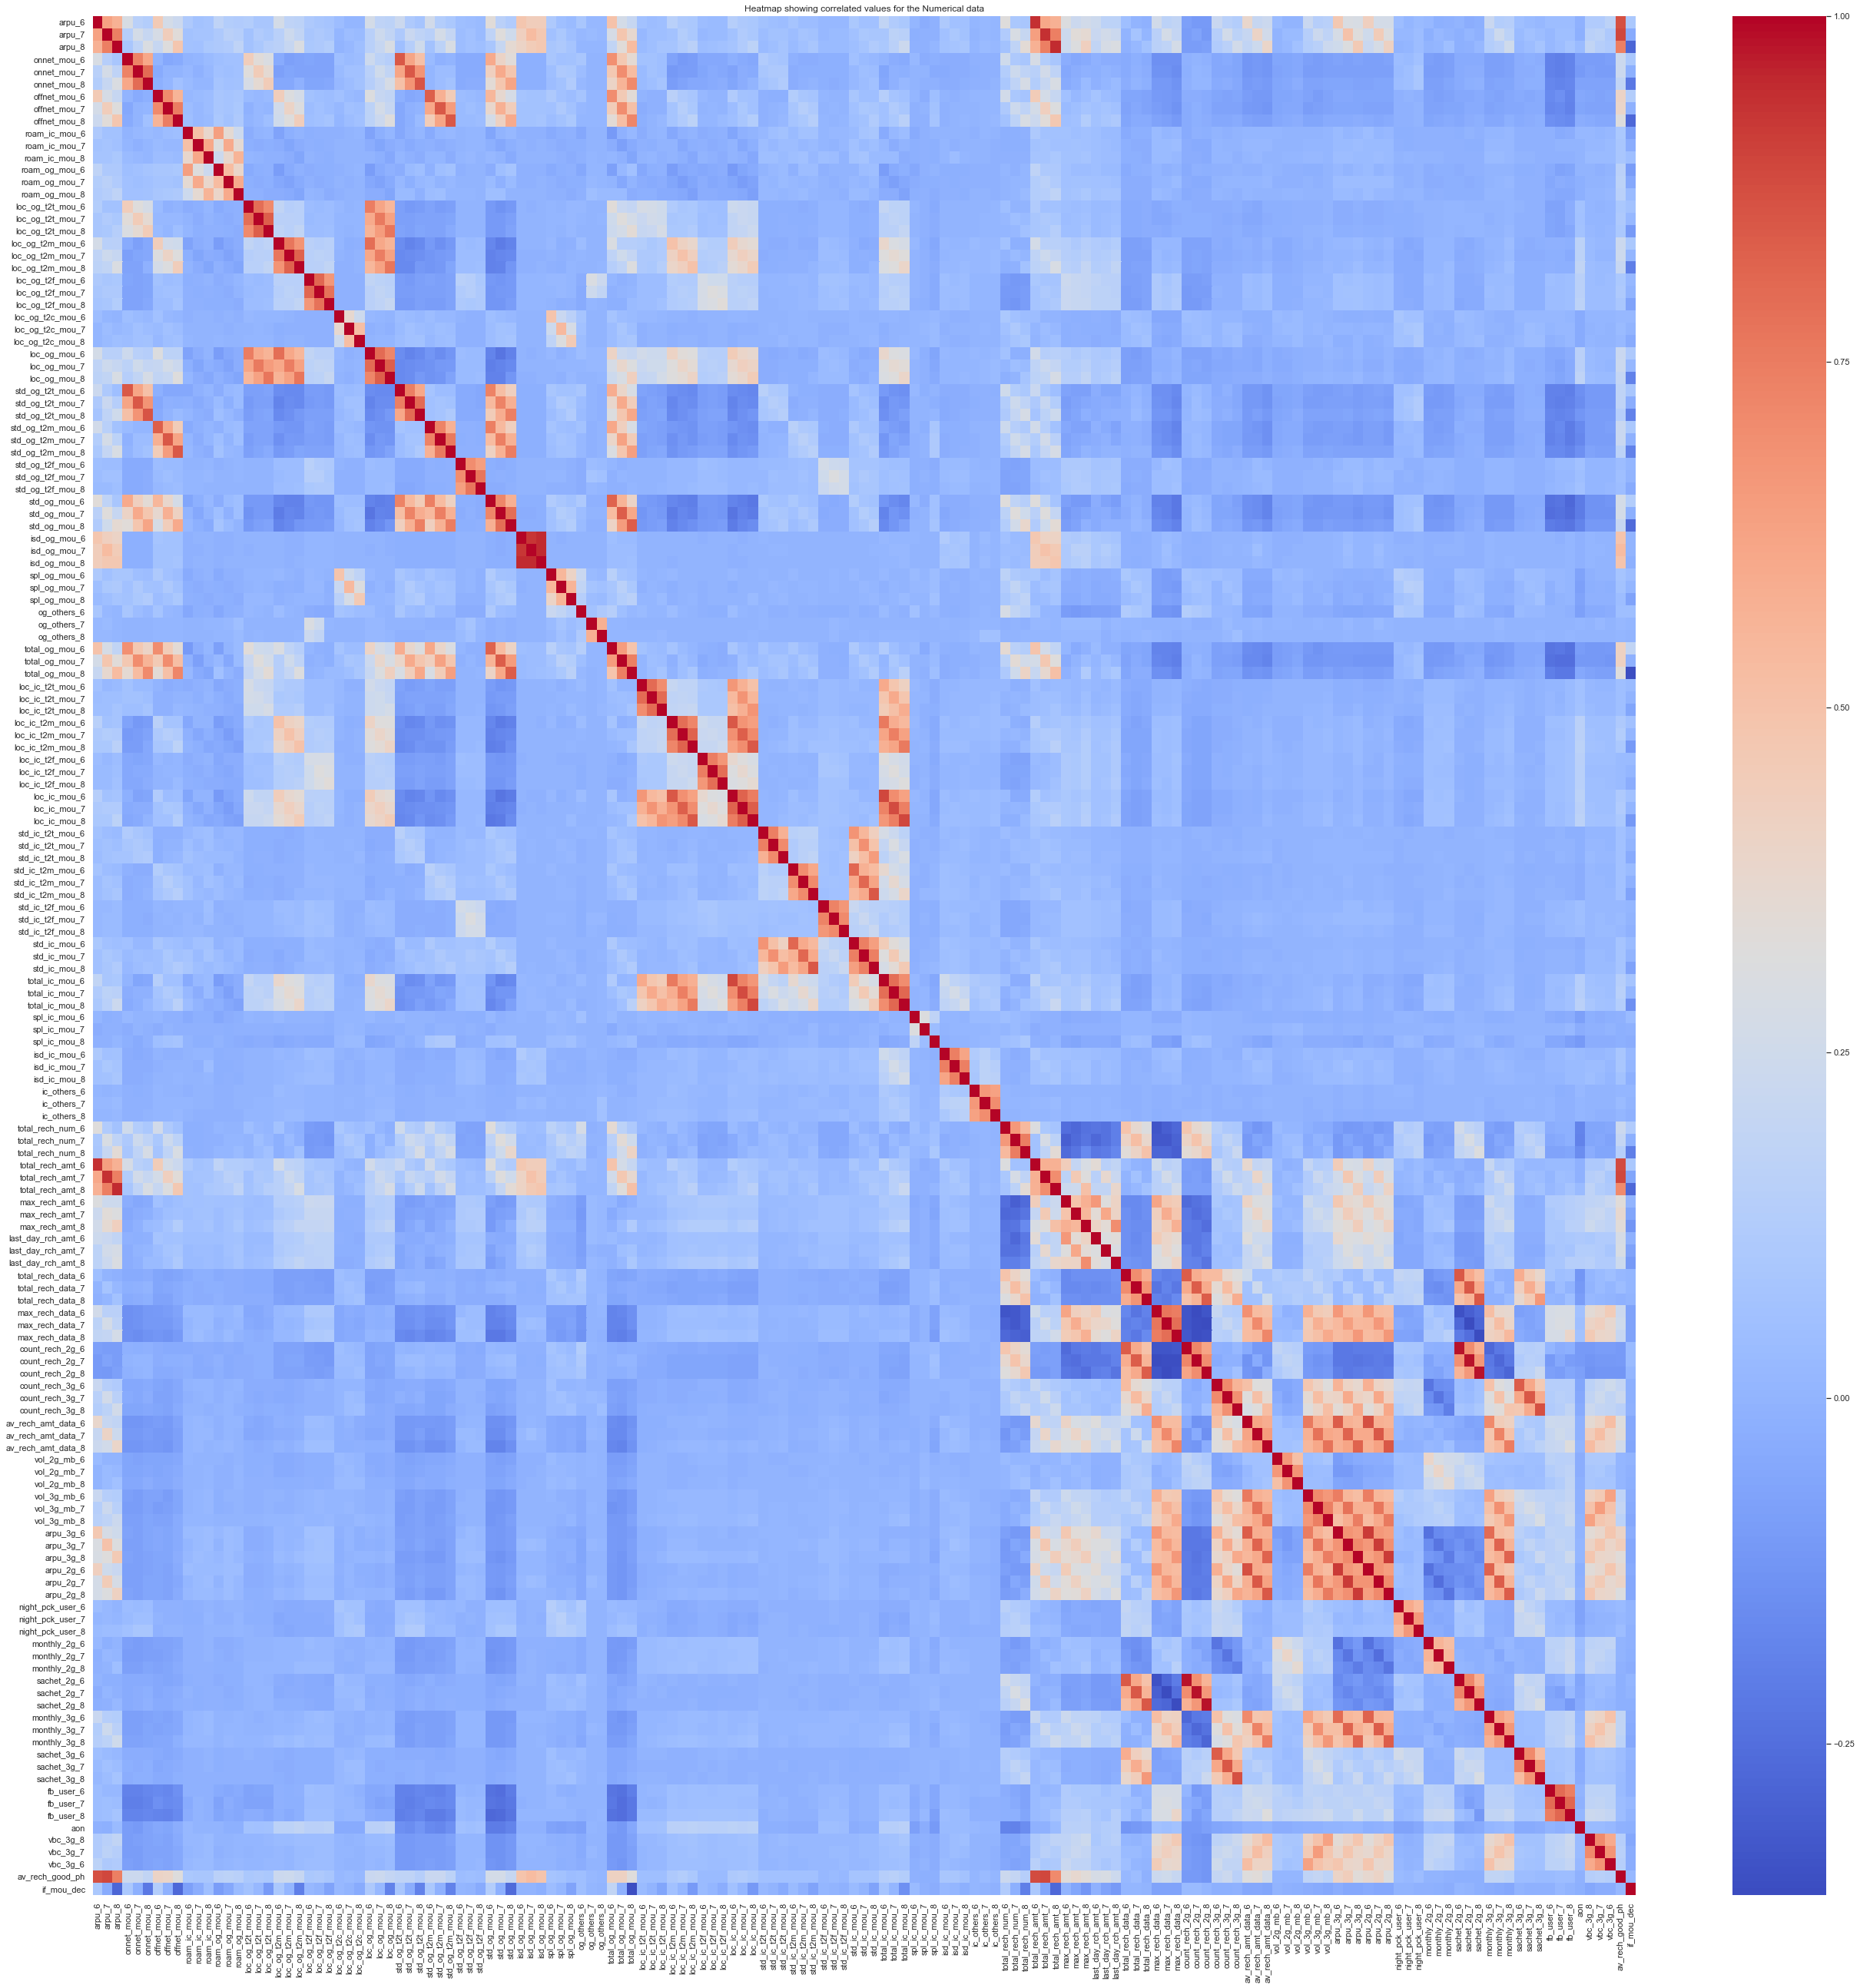

In [53]:
bivariate_num(churn_df)

### Bivariate observation :
The below mentioned pairs have high correlation between them
- std_og_t2t_mou_6 and onnet_mou_6
- std_og_t2t_mou_7 and onnet_mou_7
- std_og_t2t_mou_8 and onnet_mou_8
- std_og_t2m_mou_6 and offnet_mou_6
- std_og_t2m_mou_7 and offnet_mou_7
- std_og_t2m_mou_8 and offnet_mou_8
- total_rech_amt_6 and arpu_6
- total_rech_amt_7 and arpu_7
- total_rech_amt_8 and arpu_8
- total_og_mou_6 and std_og_mou_6
- total_og_mou_7 and std_og_mou_7
- total_og_mou_8 and std_og_mou_8
- isd_og_mou_6 with isd_og_mou_7 and isd_og_mou_8
- total_ic_mou_6 and loc_ic_mou_6
-  total_ic_mou_7 and loc_ic_mou_7
- total_ic_mou_7 and loc_ic_mou_7
- std_ic_t2m_mou_6 and std_ic_mou_6
- std_ic_t2m_mou_7 and std_ic_mou_7
- std_ic_t2m_mou_8 and std_ic_mou_8
- total_ic_mou_7 and total_ic_mou_8


 ## Imputing Null values

In [54]:
#checking the null %
null=pd.DataFrame(round((churn_df.isnull().sum()/len(churn_df.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
max_rech_data_6     62.02
arpu_3g_6           62.02
av_rech_amt_data_6  62.02
night_pck_user_6    62.02
count_rech_2g_6     62.02
fb_user_6           62.02
total_rech_data_6   62.02
arpu_2g_6           62.02
count_rech_3g_6     62.02
count_rech_2g_7     61.14
av_rech_amt_data_7  61.14
max_rech_data_7     61.14
count_rech_3g_7     61.14
arpu_3g_7           61.14
total_rech_data_7   61.14
arpu_2g_7           61.14
fb_user_7           61.14
night_pck_user_7    61.14
max_rech_data_8     60.83
fb_user_8           60.83
count_rech_2g_8     60.83
total_rech_data_8   60.83
night_pck_user_8    60.83
arpu_3g_8           60.83
count_rech_3g_8     60.83
av_rech_amt_data_8  60.83
arpu_2g_8           60.83
loc_og_t2f_mou_8     3.13
isd_og_mou_8         3.13
isd_ic_mou_8         3.13
...                   ...
monthly_2g_7         0.00
arpu_6               0.00
total_ic_mou_8       0.00
monthly_2g_6         0.00
total_rech_amt_7     0.00
arpu_8               0.00
total_og_mou_6       0.00
total_og_mou_7       0.00
total_og_mou_8       0.00
total_ic_mou_6       0.00
total_ic_mou_7       0.00
arpu_7               0.00
total_rech_num_6     0.00
total_rech_num_7     0.00
total_rech_num_8     0.00
total_rech_amt_6     0.00
total_rech_amt_8     0.00
vol_3g_mb_8          0.00
max_rech_amt_6       0.00
max_rech_amt_7       0.00
max_rech_amt_8       0.00
last_day_rch_amt_6   0.00
last_day_rch_amt_7   0.00
last_day_rch_amt_8   0.00
vol_2g_mb_6          0.00
vol_2g_mb_7          0.00
vol_2g_mb_8          0.00
vol_3g_mb_6          0.00
vol_3g_mb_7          0.00
if_mou_dec           0.00

[160 rows x 1 columns]

- The data releted attributes for a  particular month have same null percentage , SUppose if a person av recharge amount is null (no data) then there would be no data available for the other data related attributes for that month.I will impute the values of null with 0.01 to differentiate it from '0' values and also to keep it as close to as '0'



In [55]:
churn_df['total_rech_data_6'].fillna(0.01,inplace=True)
churn_df['max_rech_data_6' ].fillna(0.01,inplace=True)
churn_df['count_rech_2g_6' ].fillna(0.01,inplace=True)
churn_df['count_rech_3g_6' ].fillna(0.01,inplace=True)
churn_df['av_rech_amt_data_6' ].fillna(0.01,inplace=True)
churn_df['arpu_3g_6' ].fillna(0.01,inplace=True)
churn_df['arpu_2g_6' ].fillna(0.01,inplace=True)
churn_df['night_pck_user_6' ].fillna(0.01,inplace=True)
churn_df['fb_user_6' ].fillna(0.01,inplace=True)
churn_df['total_rech_data_7' ].fillna(0.01,inplace=True)
churn_df['max_rech_data_7' ].fillna(0.01,inplace=True)
churn_df['count_rech_2g_7' ].fillna(0.01,inplace=True)
churn_df['count_rech_3g_7' ].fillna(0.01,inplace=True)
churn_df['av_rech_amt_data_7' ].fillna(0.01,inplace=True)
churn_df['arpu_3g_7' ].fillna(0.01,inplace=True)
churn_df['arpu_2g_7' ].fillna(0.01,inplace=True)
churn_df['night_pck_user_7' ].fillna(0.01,inplace=True)
churn_df['fb_user_7' ].fillna(0.01,inplace=True)
churn_df['total_rech_data_8' ].fillna(0.01,inplace=True)
churn_df['max_rech_data_8' ].fillna(0.01,inplace=True)
churn_df['count_rech_2g_8' ].fillna(0.01,inplace=True)
churn_df['count_rech_3g_8' ].fillna(0.01,inplace=True)
churn_df['av_rech_amt_data_8' ].fillna(0.01,inplace=True)
churn_df['arpu_3g_8' ].fillna(0.01,inplace=True)
churn_df['arpu_2g_8' ].fillna(0.01,inplace=True)
churn_df['night_pck_user_8' ].fillna(0.01,inplace=True)
churn_df['fb_user_8' ].fillna(0.01,inplace=True)


In [56]:
#checking the null %
null=pd.DataFrame(round((churn_df.isnull().sum()/len(churn_df.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
std_og_mou_8                3.13
loc_og_mou_8                3.13
loc_og_t2m_mou_8            3.13
loc_ic_t2f_mou_8            3.13
loc_og_t2f_mou_8            3.13
loc_ic_t2m_mou_8            3.13
loc_og_t2c_mou_8            3.13
loc_ic_t2t_mou_8            3.13
std_og_t2t_mou_8            3.13
loc_og_t2t_mou_8            3.13
ic_others_8                 3.13
og_others_8                 3.13
std_og_t2m_mou_8            3.13
spl_og_mou_8                3.13
std_og_t2f_mou_8            3.13
isd_og_mou_8                3.13
loc_ic_mou_8                3.13
spl_ic_mou_8                3.13
isd_ic_mou_8                3.13
roam_og_mou_8               3.13
std_ic_t2m_mou_8            3.13
roam_ic_mou_8               3.13
std_ic_t2f_mou_8            3.13
onnet_mou_8                 3.13
std_ic_t2t_mou_8            3.13
offnet_mou_8                3.13
std_ic_mou_8                3.13
dayofmonth_of_last_rech_8   1.98
dayofweek_of_last_rech_8    1.98
std_ic_t2t_mou_6            1.05
...                          ...
total_rech_num_6            0.00
last_day_rch_amt_7          0.00
arpu_7                      0.00
total_ic_mou_7              0.00
total_ic_mou_6              0.00
total_og_mou_8              0.00
total_og_mou_7              0.00
total_og_mou_6              0.00
arpu_8                      0.00
last_day_rch_amt_6          0.00
last_day_rch_amt_8          0.00
vol_2g_mb_8                 0.00
count_rech_3g_6             0.00
vol_2g_mb_7                 0.00
vol_2g_mb_6                 0.00
av_rech_amt_data_8          0.00
av_rech_amt_data_7          0.00
av_rech_amt_data_6          0.00
count_rech_3g_8             0.00
count_rech_3g_7             0.00
count_rech_2g_8             0.00
total_rech_data_6           0.00
count_rech_2g_7             0.00
count_rech_2g_6             0.00
max_rech_data_8             0.00
max_rech_data_7             0.00
max_rech_data_6             0.00
total_rech_data_8           0.00
total_rech_data_7           0.00
if_mou_dec                  0.00

[160 rows x 1 columns]

- We have null in below attributes for all of them at the same time, If we see closely this is all the columns involving call services. These not having data might be non usage of any phone calls , if yes then we might have corresponding churn as yes , so its a bad idea to delete them.
- I would impute them with 0.01 as well to differentaite them from zero as well as keep them as close as possible to zero.



1. onnet_mou_8
2. offnet_mou_8
3. roam_ic_mou_8
4. roam_og_mou_8
5. loc_og_t2t_mou_8
6. loc_og_t2m_mou_8
7. loc_og_t2f_mou_8
8. loc_og_t2c_mou_8
9. loc_og_mou_8
10. std_og_t2t_mou_8
11. std_og_t2m_mou_8
12. std_og_t2f_mou_8
13. std_og_mou_8
14. isd_og_mou_8
15. spl_og_mou_8
16. og_others_8
17. loc_ic_t2t_mou_8
18. loc_ic_t2m_mou_8
19. loc_ic_t2f_mou_8
20. loc_ic_mou_8
21. std_ic_t2t_mou_8
22. std_ic_t2m_mou_8
23. std_ic_t2f_mou_8
24. std_ic_mou_8
25. spl_ic_mou_8
26. isd_ic_mou_8
27. ic_others_8


In [57]:
churn_df['onnet_mou_8' ].fillna(0.01,inplace=True)
churn_df['offnet_mou_8' ].fillna(0.01,inplace=True)
churn_df['roam_ic_mou_8' ].fillna(0.01,inplace=True)
churn_df['roam_og_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2t_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2m_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2f_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2c_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_og_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_og_t2t_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_og_t2m_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_og_t2f_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_og_mou_8' ].fillna(0.01,inplace=True)
churn_df['isd_og_mou_8' ].fillna(0.01,inplace=True)
churn_df['spl_og_mou_8' ].fillna(0.01,inplace=True)
churn_df['og_others_8' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2t_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2m_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2f_mou_8' ].fillna(0.01,inplace=True)
churn_df['loc_ic_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2t_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2m_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2f_mou_8' ].fillna(0.01,inplace=True)
churn_df['std_ic_mou_8' ].fillna(0.01,inplace=True)
churn_df['spl_ic_mou_8' ].fillna(0.01,inplace=True)
churn_df['isd_ic_mou_8' ].fillna(0.01,inplace=True)
churn_df['ic_others_8' ].fillna(0.01,inplace=True)


In [58]:
#checking the null %
null=pd.DataFrame(round((churn_df.isnull().sum()/len(churn_df.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
dayofmonth_of_last_rech_8   1.98
dayofweek_of_last_rech_8    1.98
loc_og_t2f_mou_6            1.05
loc_ic_t2m_mou_6            1.05
loc_og_t2c_mou_6            1.05
loc_ic_mou_6                1.05
loc_og_mou_6                1.05
loc_ic_t2f_mou_6            1.05
std_og_t2t_mou_6            1.05
std_og_t2m_mou_6            1.05
loc_og_t2m_mou_6            1.05
loc_ic_t2t_mou_6            1.05
std_og_t2f_mou_6            1.05
og_others_6                 1.05
std_og_mou_6                1.05
spl_ic_mou_6                1.05
spl_og_mou_6                1.05
std_ic_t2t_mou_6            1.05
isd_og_mou_6                1.05
onnet_mou_6                 1.05
isd_ic_mou_6                1.05
std_ic_t2m_mou_6            1.05
loc_og_t2t_mou_6            1.05
offnet_mou_6                1.05
std_ic_t2f_mou_6            1.05
std_ic_mou_6                1.05
roam_og_mou_6               1.05
ic_others_6                 1.05
roam_ic_mou_6               1.05
std_ic_t2t_mou_7            1.01
...                          ...
offnet_mou_8                0.00
onnet_mou_8                 0.00
arpu_8                      0.00
loc_ic_mou_8                0.00
std_ic_t2t_mou_8            0.00
std_ic_t2m_mou_8            0.00
total_rech_amt_7            0.00
total_rech_data_8           0.00
total_rech_data_7           0.00
total_rech_data_6           0.00
last_day_rch_amt_8          0.00
last_day_rch_amt_7          0.00
last_day_rch_amt_6          0.00
max_rech_amt_8              0.00
max_rech_amt_7              0.00
max_rech_amt_6              0.00
total_rech_amt_8            0.00
total_rech_amt_6            0.00
std_ic_t2f_mou_8            0.00
total_rech_num_8            0.00
total_rech_num_7            0.00
total_rech_num_6            0.00
ic_others_8                 0.00
isd_ic_mou_8                0.00
spl_ic_mou_8                0.00
arpu_7                      0.00
total_ic_mou_7              0.00
total_ic_mou_6              0.00
std_ic_mou_8                0.00
if_mou_dec                  0.00

[160 rows x 1 columns]

In [59]:
# replacing the null in dayofmonth_of_last_rech_8 and dayofweek_of_last_rech_8 with respective modes

churn_df.loc[churn_df['dayofmonth_of_last_rech_8'].isnull(),'dayofmonth_of_last_rech_8']=churn_df['dayofmonth_of_last_rech_8'].mode()[0]
churn_df.loc[churn_df['dayofweek_of_last_rech_8'].isnull(),'dayofweek_of_last_rech_8']=churn_df['dayofweek_of_last_rech_8'].mode()[0]

#### We have similar null values for 27 columns mentioned above for month of 6 and 7 too. We will replace them with 0.01 too


In [60]:
churn_df['onnet_mou_6' ].fillna(0.01,inplace=True)
churn_df['offnet_mou_6' ].fillna(0.01,inplace=True)
churn_df['roam_ic_mou_6' ].fillna(0.01,inplace=True)
churn_df['roam_og_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2t_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2m_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2f_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2c_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_og_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_og_t2t_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_og_t2m_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_og_t2f_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_og_mou_6' ].fillna(0.01,inplace=True)
churn_df['isd_og_mou_6' ].fillna(0.01,inplace=True)
churn_df['spl_og_mou_6' ].fillna(0.01,inplace=True)
churn_df['og_others_6' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2t_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2m_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2f_mou_6' ].fillna(0.01,inplace=True)
churn_df['loc_ic_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2t_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2m_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2f_mou_6' ].fillna(0.01,inplace=True)
churn_df['std_ic_mou_6' ].fillna(0.01,inplace=True)
churn_df['spl_ic_mou_6' ].fillna(0.01,inplace=True)
churn_df['isd_ic_mou_6' ].fillna(0.01,inplace=True)
churn_df['ic_others_6' ].fillna(0.01,inplace=True)
churn_df['onnet_mou_7' ].fillna(0.01,inplace=True)
churn_df['offnet_mou_7' ].fillna(0.01,inplace=True)
churn_df['roam_ic_mou_7' ].fillna(0.01,inplace=True)
churn_df['roam_og_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2t_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2m_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2f_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_og_t2c_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_og_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_og_t2t_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_og_t2m_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_og_t2f_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_og_mou_7' ].fillna(0.01,inplace=True)
churn_df['isd_og_mou_7' ].fillna(0.01,inplace=True)
churn_df['spl_og_mou_7' ].fillna(0.01,inplace=True)
churn_df['og_others_7' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2t_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2m_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_ic_t2f_mou_7' ].fillna(0.01,inplace=True)
churn_df['loc_ic_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2t_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2m_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_ic_t2f_mou_7' ].fillna(0.01,inplace=True)
churn_df['std_ic_mou_7' ].fillna(0.01,inplace=True)
churn_df['spl_ic_mou_7' ].fillna(0.01,inplace=True)
churn_df['isd_ic_mou_7' ].fillna(0.01,inplace=True)
churn_df['ic_others_7' ].fillna(0.01,inplace=True)


In [61]:
#checking the null %
null=pd.DataFrame(round((churn_df.isnull().sum()/len(churn_df.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
dayofmonth_of_last_rech_7   0.38
dayofweek_of_last_rech_7    0.38
dayofmonth_of_last_rech_6   0.21
dayofweek_of_last_rech_6    0.21
arpu_6                      0.00
count_rech_2g_6             0.00
last_day_rch_amt_8          0.00
total_rech_data_6           0.00
total_rech_data_7           0.00
total_rech_data_8           0.00
max_rech_data_6             0.00
max_rech_data_7             0.00
max_rech_data_8             0.00
count_rech_3g_6             0.00
count_rech_2g_7             0.00
count_rech_2g_8             0.00
last_day_rch_amt_6          0.00
count_rech_3g_7             0.00
count_rech_3g_8             0.00
av_rech_amt_data_6          0.00
av_rech_amt_data_7          0.00
av_rech_amt_data_8          0.00
last_day_rch_amt_7          0.00
max_rech_amt_7              0.00
max_rech_amt_8              0.00
vol_2g_mb_7                 0.00
spl_ic_mou_7                0.00
spl_ic_mou_8                0.00
isd_ic_mou_6                0.00
isd_ic_mou_7                0.00
...                          ...
std_ic_t2m_mou_7            0.00
loc_ic_t2f_mou_6            0.00
std_ic_t2m_mou_8            0.00
std_ic_t2f_mou_6            0.00
std_ic_t2f_mou_7            0.00
std_ic_t2f_mou_8            0.00
std_ic_mou_6                0.00
std_ic_mou_7                0.00
std_ic_mou_8                0.00
loc_ic_t2f_mou_7            0.00
loc_ic_t2m_mou_8            0.00
std_og_mou_8                0.00
og_others_7                 0.00
isd_og_mou_6                0.00
isd_og_mou_7                0.00
isd_og_mou_8                0.00
spl_og_mou_6                0.00
spl_og_mou_7                0.00
spl_og_mou_8                0.00
og_others_6                 0.00
og_others_8                 0.00
loc_ic_t2m_mou_7            0.00
total_og_mou_6              0.00
total_og_mou_7              0.00
total_og_mou_8              0.00
loc_ic_t2t_mou_6            0.00
loc_ic_t2t_mou_7            0.00
loc_ic_t2t_mou_8            0.00
loc_ic_t2m_mou_6            0.00
if_mou_dec                  0.00

[160 rows x 1 columns]

In [62]:
# replacing the null in dayofmonth_of_last_rech and dayofweek_of_last_rech for month 6 an d 7 with respective modes

churn_df.loc[churn_df['dayofmonth_of_last_rech_7'].isnull(),'dayofmonth_of_last_rech_7']=churn_df['dayofmonth_of_last_rech_7'].mode()[0]
churn_df.loc[churn_df['dayofweek_of_last_rech_7'].isnull(),'dayofweek_of_last_rech_7']=churn_df['dayofweek_of_last_rech_7'].mode()[0]

churn_df.loc[churn_df['dayofmonth_of_last_rech_6'].isnull(),'dayofmonth_of_last_rech_6']=churn_df['dayofmonth_of_last_rech_6'].mode()[0]
churn_df.loc[churn_df['dayofweek_of_last_rech_6'].isnull(),'dayofweek_of_last_rech_6']=churn_df['dayofweek_of_last_rech_6'].mode()[0]

In [63]:
#checking the null %
null=pd.DataFrame(round((churn_df.isnull().sum()/len(churn_df.index))*100,2),columns={'null%'})
null.sort_values(by='null%',ascending=False)

null%
arpu_6                0.0
arpu_7                0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
ic_others_8           0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
...                   ...
std_ic_t2m_mou_7      0.0
loc_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2m_mou_8      0.0
std_og_mou_8          0.0
og_others_7           0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_6          0.0
spl_og_mou_7          0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_8           0.0
loc_ic_t2m_mou_7      0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2m_mou_6      0.0
if_mou_dec            0.0

[160 rows x 1 columns]

__We do not have any null values now. We can proceed further__

In [64]:
num_col=churn_df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vbc_3g_7', 'vbc_3g_6', 'av_rech_good_ph', 'dayofweek_of_last_rech_6',
       'dayofweek_of_last_rech_7', 'dayofweek_of_last_rech_8',
       'dayofmonth_of_last_rech_6', 'dayofmonth_of_last_rech_7',
       'dayofmonth_of_last_rech_8', 'if_mou_dec'],
      dtype='object', length=159)

In [65]:
churn_df.shape

(30011, 160)

### Outlier Treatment

In [66]:
def outlier_treatment(df):
    num_col=df.select_dtypes(include=['int64','float64']).columns
    for i in num_col:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        HO=Q3+IQR*1.5
        LO=Q1-IQR*1.5
        df.loc[df[i]> HO,i]=HO
        df.loc[df[i]< LO,i]=LO
            
    return df

In [67]:
churn_df=outlier_treatment(churn_df)

In [68]:
churn_df.shape

(30011, 160)

### Data Preperation

In [69]:
li=['dayofweek_of_last_rech_6','dayofweek_of_last_rech_7','dayofweek_of_last_rech_8','dayofmonth_of_last_rech_6','dayofmonth_of_last_rech_7','dayofmonth_of_last_rech_8','is_churn']
for i in li:
    churn_df[i]=churn_df[i].astype('object')


### Test Train Split

In [70]:
from sklearn.model_selection import train_test_split
y=churn_df['is_churn']
X=churn_df.drop('is_churn',axis=1)

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify=y)

In [72]:
y_train.value_counts()

0    19042
1     1965
Name: is_churn, dtype: int64

In [73]:
y_test.value_counts()

0    8162
1     842
Name: is_churn, dtype: int64

### Scaling 

In [74]:
from sklearn.preprocessing import StandardScaler
num=X_train.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
X_train[num]=scaler.fit_transform(X_train[num])

In [75]:
#transforming the test df
X_test[num]=scaler.transform(X_test[num])

###  PCA

In [76]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [77]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [78]:

pca.explained_variance_ratio_

array([1.58270692e-01, 1.15848441e-01, 8.79284627e-02, 6.92267281e-02,
       5.77917828e-02, 5.60107871e-02, 3.39234263e-02, 3.22638560e-02,
       2.75233467e-02, 2.31195500e-02, 2.08200851e-02, 1.65020092e-02,
       1.57661999e-02, 1.55424118e-02, 1.42298597e-02, 1.32343473e-02,
       1.26661701e-02, 1.22524918e-02, 1.19323043e-02, 1.08520678e-02,
       9.82353214e-03, 8.78480330e-03, 8.24660550e-03, 7.69410929e-03,
       6.12430741e-03, 6.02984164e-03, 5.96596344e-03, 5.46060290e-03,
       5.25836232e-03, 5.20125629e-03, 4.78548907e-03, 4.70085437e-03,
       4.49859087e-03, 4.38144814e-03, 4.15030974e-03, 4.09001396e-03,
       3.80343954e-03, 3.72868928e-03, 3.52788374e-03, 3.40919243e-03,
       3.35931760e-03, 3.23810236e-03, 3.17408933e-03, 3.03032305e-03,
       2.86509952e-03, 2.83546020e-03, 2.64539475e-03, 2.52462464e-03,
       2.50441781e-03, 2.45410379e-03, 2.36936743e-03, 2.34220210e-03,
       2.06289790e-03, 2.02353254e-03, 2.00306020e-03, 1.97286671e-03,
      

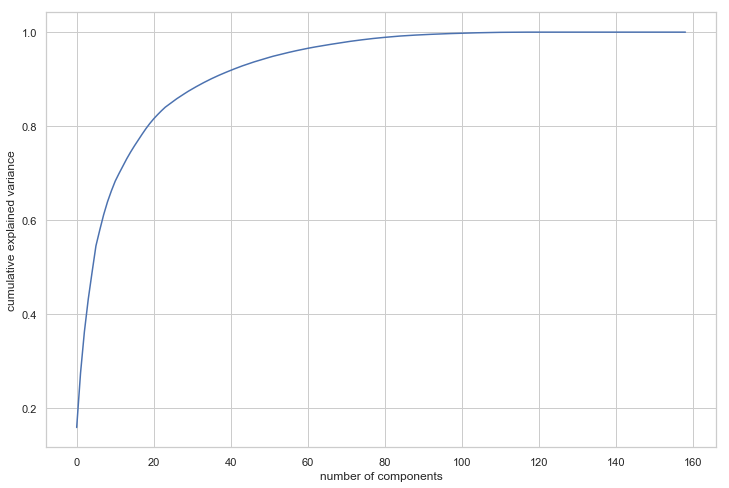

In [79]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__60 Components are required to explain 95 % variance in the dataset__
 
- We are choosing 60 components for our modelling 

In [80]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [81]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 60)

In [82]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 60)

In [83]:
#changing the d type of y_train and y_test
y_train=y_train.astype(int)
y_test=y_test.astype(int)

## Logistic Regression using PCA

In [84]:
import statsmodels.api as sm
# Logistic regression model
logPCAm1 = sm.GLM(y_train,(sm.add_constant(df_train_pca.astype(float))), family = sm.families.Binomial())
logPCAm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4023.7
Date:                Mon, 04 Nov 2019   Deviance:                       8047.4
Time:                        23:40:05   Pearson chi2:                 5.44e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7832      0.061    -62.399      0.000      -3.902      -3.664
x1            -0.0052      0.007     -0.704      0.481      -0.020       0.009
x2            -0.3871      0.012    -31.993      0.000      -0.411      -0.363
x3             0.1150      0.012      9.783      0.000       0.092       0.138
x4            -0.1073      0.008    -13.210      0.000      -0.123      -0.091
x5             0.0120      0.011      1.077      0.281      -0.010       0.034
x6             0.1339      0.010     12.790      0.000       0.113       0.154
x7             0.0721      0.013      5.762      0.000       0.048       0.097
x8            -0.0256      0.017     -1.519      0.129      -0.059       0.007
x9            -0.0430      0.017     -2.583      0.010      -0.076      -0.010
x10           -0.4041      0.016    -25.489      0.000      -0.435      -0.373
x11            0.2050      0.019     10.692      0.000       0.167       0.243
x12           -0.0107      0.017     -0.615      0.538      -0.045       0.023
x13           -0.0112      0.018     -0.633      0.526      -0.046       0.023
x14            0.0010      0.023      0.045      0.964      -0.044       0.046
x15           -0.2224      0.024     -9.257      0.000      -0.269      -0.175
x16            0.0713      0.027      2.618      0.009       0.018       0.125
x17           -0.0731      0.024     -3.040      0.002      -0.120      -0.026
x18            0.2947      0.022     13.599      0.000       0.252       0.337
x19            0.0778      0.027      2.859      0.004       0.024       0.131
x20           -0.0156      0.027     -0.574      0.566      -0.069       0.038
x21            0.1452      0.027      5.471      0.000       0.093       0.197
x22           -0.1827      0.025     -7.307      0.000      -0.232      -0.134
x23            0.0510      0.033      1.555      0.120      -0.013       0.115
x24        -2.008e-05      0.033     -0.001      1.000      -0.064       0.064
x25           -0.1073      0.033     -3.272      0.001      -0.172      -0.043
x26           -0.0431      0.033     -1.309      0.191      -0.108       0.021
x27            0.0865      0.037      2.319      0.020       0.013       0.160
x28            0.0358      0.041      0.881      0.378      -0.044       0.115
x29           -0.0756      0.033     -2.280      0.023      -0.141      -0.011
x30           -0.0418      0.034     -1.243      0.214      -0.108       0.024
x31            0.0316      0.039      0.812      0.417      -0.045       0.108
x32           -0.2364      0.039     -6.058      0.000      -0.313      -0.160
x33           -0.4171      0.037    -11.349      0.000      -0.489      -0.345
x34           -0.0765      0.037     -2.057      0.040      -0.149      -0.004
x35            0.0151      0.038      0.396      0.692      -0.060       0.090
x36            0.1448      0.042      3.422      0.001       0.062       0.228
x3

In [85]:
#using RFE on PCA data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(df_train_pca, y_train)

In [87]:
df_train_pca_rfe=pd.DataFrame(df_train_pca)
col_rfe = df_train_pca_rfe.columns[rfe.support_]
df_train_pca_rfe=df_train_pca_rfe[col_rfe]

In [88]:
#doing the same change on the test df
df_test_pca_rfe=pd.DataFrame(df_test_pca)
df_test_pca_rfe=df_test_pca_rfe[col_rfe]

In [89]:
df_train_pca_rfe=np.array(df_train_pca_rfe)

In [90]:
#Model 2
logPCAm2 = sm.GLM(y_train,(sm.add_constant(df_train_pca_rfe).astype(float)), family = sm.families.Binomial())
logPCAm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4344.6
Date:                Mon, 04 Nov 2019   Deviance:                       8689.1
Time:                        23:40:31   Pearson chi2:                 4.39e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5890      0.052    -68.362      0.000      -3.692      -3.486
x1            -0.3870      0.010    -38.538      0.000      -0.407      -0.367
x2            -0.4007      0.014    -27.664      0.000      -0.429      -0.372
x3             0.2081      0.017     12.225      0.000       0.175       0.241
x4            -0.2612      0.022    -11.804      0.000      -0.305      -0.218
x5             0.2735      0.020     13.599      0.000       0.234       0.313
x6            -0.1633      0.024     -6.849      0.000      -0.210      -0.117
x7            -0.2422      0.036     -6.806      0.000      -0.312      -0.172
x8            -0.3753      0.033    -11.528      0.000      -0.439      -0.311
x9            -0.2886      0.041     -7.099      0.000      -0.368      -0.209
x10            0.1823      0.039      4.635      0.000       0.105       0.259
x11           -0.1902      0.043     -4.410      0.000      -0.275      -0.106
x12           -0.2567      0.052     -4.944      0.000      -0.359      -0.155
x13            0.2164      0.045      4.789      0.000       0.128       0.305
x14            0.3285      0.045      7.269      0.000       0.240       0.417
x15            0.1844      0.055      3.365      0.001       0.077       0.292
==============================================================================
"""

In [91]:
fm_pca=logPCAm2.fit()

In [92]:
y_train_pred_PCA_rfe=fm_pca.predict(sm.add_constant(df_train_pca_rfe))

In [93]:
y_train_pred_PCA_rfe

array([0.00819603, 0.15500194, 0.14694622, ..., 0.01954995, 0.27436055,
       0.00159357])

In [94]:
#creating a data frame with actual converted vs predicted converted values

model_df_lr_PCA_rfe=pd.DataFrame({"Converted":y_train,'Converted_prob':y_train_pred_PCA_rfe})
model_df_lr_PCA_rfe.head()

Converted  Converted_prob
27654          0        0.008196
13100          0        0.155002
7893           0        0.146946
6995           0        0.007617
2322           0        0.017320

In [95]:
#checking the AUC 
"{:2.2f}".format(metrics.roc_auc_score(model_df_lr_PCA_rfe.Converted, model_df_lr_PCA_rfe.Converted_prob))

'0.89'

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    model_df_lr_PCA_rfe[i]= model_df_lr_PCA_rfe.Converted_prob.map(lambda x: 1 if x > i else 0)
model_df_lr_PCA_rfe.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
27654          0        0.008196    1    0    0    0    0    0    0    0    0   
13100          0        0.155002    1    1    0    0    0    0    0    0    0   
7893           0        0.146946    1    1    0    0    0    0    0    0    0   
6995           0        0.007617    1    0    0    0    0    0    0    0    0   
2322           0        0.017320    1    0    0    0    0    0    0    0    0   

       0.9  
27654    0  
13100    0  
7893     0  
6995     0  
2322     0

In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(model_df_lr_PCA_rfe.Converted, model_df_lr_PCA_rfe[i] )
    total1=sum(sum(cm1))     #sum makes a sum column wise and the next sum will add it to total.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.093540  1.000000  0.000000
0.1   0.1  0.815347  0.800000  0.816931
0.2   0.2  0.894035  0.695165  0.914557
0.3   0.3  0.914362  0.574046  0.949480
0.4   0.4  0.920169  0.444784  0.969226
0.5   0.5  0.919265  0.308906  0.982250
0.6   0.6  0.915790  0.186260  0.991072
0.7   0.7  0.912125  0.097710  0.996166
0.8   0.8  0.908269  0.032061  0.998687
0.9   0.9  0.906650  0.003053  0.999895


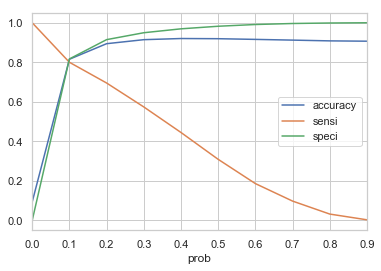

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__From the curve above, 0.1 is the optimum point to take it as a cutoff probability.__

In [99]:
model_df_lr_PCA_rfe['final_predicted'] = model_df_lr_PCA_rfe.Converted_prob.map( lambda x: 1 if x > 0.1 else 0)

model_df_lr_PCA_rfe.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
27654          0        0.008196    1    0    0    0    0    0    0    0    0   
13100          0        0.155002    1    1    0    0    0    0    0    0    0   
7893           0        0.146946    1    1    0    0    0    0    0    0    0   
6995           0        0.007617    1    0    0    0    0    0    0    0    0   
2322           0        0.017320    1    0    0    0    0    0    0    0    0   

       0.9  final_predicted  
27654    0                0  
13100    0                1  
7893     0                1  
6995     0                0  
2322     0                0

In [100]:
cutoff_df.loc[0.1,]

prob        0.100000
accuracy    0.815347
sensi       0.800000
speci       0.816931
Name: 0.1, dtype: float64

In [101]:
print(metrics.classification_report(model_df_lr_PCA_rfe['Converted'],model_df_lr_PCA_rfe['final_predicted']))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19042
           1       0.31      0.80      0.45      1965

   micro avg       0.82      0.82      0.82     21007
   macro avg       0.64      0.81      0.67     21007
weighted avg       0.91      0.82      0.85     21007



### Predicting the test 

In [102]:
y_test_pred_PCA_rfe=fm_pca.predict(sm.add_constant(df_test_pca_rfe))

In [103]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
test_model_df_PCA_rfe=pd.DataFrame({"Converted_test":y_test.values,'Converted_prob_test':y_test_pred_PCA_rfe})
test_model_df_PCA_rfe.head()

Converted_test  Converted_prob_test
0               0             0.538953
1               0             0.183404
2               0             0.006207
3               0             0.012762
4               0             0.010350

In [105]:
test_model_df_PCA_rfe['final_predicted']=test_model_df_PCA_rfe.Converted_prob_test.map(lambda x: 1 if x > 0.1 else 0)
test_model_df_PCA_rfe.head()

Converted_test  Converted_prob_test  final_predicted
0               0             0.538953                1
1               0             0.183404                1
2               0             0.006207                0
3               0             0.012762                0
4               0             0.010350                0

In [106]:
print(metrics.classification_report(test_model_df_PCA_rfe['Converted_test'],test_model_df_PCA_rfe['final_predicted']))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8162
           1       0.31      0.82      0.45       842

   micro avg       0.82      0.82      0.82      9004
   macro avg       0.65      0.82      0.67      9004
weighted avg       0.92      0.82      0.85      9004



## Ridge regression with PCA 

- Below code is marked down since it takes lot of time for completion of code execution

In [ ]:

params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_log = LogisticRegression(solver='saga',random_state=42,penalty='l2')

# cross validation
folds = 10
model_cv = GridSearchCV(ridge_log, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)            
model_cv.fit(df_train_pca, y_train) 

cv_results_ridge=pd.DataFrame(model_cv.cv_results_)[['param_C','mean_train_score','mean_test_score']]

cv_results_ridge

__taking the c value of 3, lets do the ridge regression__

In [107]:
ridge_log=LogisticRegression(solver='saga',random_state=42,penalty='l2',C=3)
ridge_log.fit(df_train_pca,y_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
y_test_pred_ridge =ridge_log.predict(df_test_pca)

In [109]:
#checking the AUC 
"{:2.2f}".format(metrics.roc_auc_score(y_test,y_test_pred_ridge))

'0.70'

In [110]:
print(metrics.classification_report(y_test,y_test_pred_ridge))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8162
           1       0.66      0.42      0.51       842

   micro avg       0.93      0.93      0.93      9004
   macro avg       0.80      0.70      0.74      9004
weighted avg       0.92      0.93      0.92      9004



In [111]:
print("MCC score is ",metrics.matthews_corrcoef(y_test,y_test_pred_ridge))
print("Recall is",metrics.recall_score(y_test,y_test_pred_ridge))
print("Precison is ",metrics.precision_score(y_test,y_test_pred_ridge))


MCC score is  0.4886273026033914
Recall is 0.42161520190023755
Precison is  0.6561922365988909


### Lasso Regression with PCA

- Below code is marked down since it takes lot of time for completion of code execution


params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_log = LogisticRegression(solver='saga',random_state=42,penalty='l1')

# cross validation
folds = 10
model_cv = GridSearchCV(ridge_log, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)            
model_cv.fit(df_train_pca, y_train) 

cv_results_lasso=pd.DataFrame(model_cv.cv_results_)[['param_C','mean_train_score','mean_test_score']]

cv_results_lasso

__taking the c value of 5, lets do the ridge regression__

In [112]:
lasso_log = LogisticRegression(solver='saga',random_state=42,penalty='l1',C=5)
lasso_log.fit(df_train_pca,y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_test_pred_lasso=lasso_log.predict(df_test_pca)

In [114]:
print(metrics.classification_report(y_test,y_test_pred_lasso))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8162
           1       0.66      0.42      0.51       842

   micro avg       0.93      0.93      0.93      9004
   macro avg       0.80      0.70      0.74      9004
weighted avg       0.92      0.93      0.92      9004



In [115]:
print("MCC score is ",metrics.matthews_corrcoef(y_test,y_test_pred_lasso))
print("Recall is",metrics.recall_score(y_test,y_test_pred_lasso))
print("Precison is ",metrics.precision_score(y_test,y_test_pred_lasso))


MCC score is  0.4886273026033914
Recall is 0.42161520190023755
Precison is  0.6561922365988909


### Random Forest using PCA

In [116]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

- Below code is marked down since it takes lot of time for completion of code execution

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring="f1" ,
                          cv = 5,n_jobs=-1,verbose = 1)

grid_search.fit(df_train_pca,y_train)

print('We can get f1 of',grid_search.best_score_,'using',grid_search.best_params_)

In [117]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=50)

In [118]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
y_train_pred_rfc=rfc.predict(df_train_pca)

In [120]:
print("Accuracy is ",metrics.accuracy_score(y_train,y_train_pred_rfc))


Accuracy is  0.9102680059027943


In [121]:
print(metrics.classification_report(y_train,y_train_pred_rfc))     

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19042
           1       0.93      0.04      0.08      1965

   micro avg       0.91      0.91      0.91     21007
   macro avg       0.92      0.52      0.52     21007
weighted avg       0.91      0.91      0.87     21007



In [122]:
# predict
y_test_pred_rfc = rfc.predict(df_test_pca)

In [123]:
print('Accuracy is ',metrics.accuracy_score(y_test,y_test_pred_rfc))
print("MCC score is ",metrics.matthews_corrcoef(y_test,y_test_pred_rfc))

Accuracy is  0.9067081297201244
MCC score is  0.08482771410977279


In [124]:
print(metrics.classification_report(y_test,y_test_pred_rfc))  

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8162
           1       0.54      0.02      0.03       842

   micro avg       0.91      0.91      0.91      9004
   macro avg       0.72      0.51      0.49      9004
weighted avg       0.87      0.91      0.87      9004



### Weighted Random Forest with PCA


In [125]:
w = 6 # The weight for the positive class

WRF = RandomForestClassifier(class_weight={0: 1, 1: w}
                            ,bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=50)

In [126]:
WRF.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 6},
            criterion='gini', max_depth=6, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=400, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [127]:
y_pred_train_WRF=WRF.predict(df_train_pca)

In [128]:
print(metrics.classification_report(y_train,y_pred_train_WRF))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     19042
           1       0.49      0.70      0.57      1965

   micro avg       0.90      0.90      0.90     21007
   macro avg       0.73      0.81      0.76     21007
weighted avg       0.92      0.90      0.91     21007



In [129]:
y_pred_test_WRF=WRF.predict(df_test_pca)

In [130]:
print('Accuracy is ',metrics.accuracy_score(y_test,y_pred_test_WRF))
print("MCC score is ",metrics.matthews_corrcoef(y_test,y_pred_test_WRF))

Accuracy is  0.8960462016881386
MCC score is  0.4907637411324759


In [131]:
print(metrics.classification_report(y_test,y_pred_test_WRF))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8162
           1       0.46      0.65      0.54       842

   micro avg       0.90      0.90      0.90      9004
   macro avg       0.71      0.79      0.74      9004
weighted avg       0.92      0.90      0.90      9004



## Adaboost with PCA

In [132]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

- Below code is marked down since it takes lot of time for completion of code execution

# adaboost with the tree as base estimator

estimators = list(range(1, 50, 10))

Ada_f1_train_scores = []
Ada_f1_test_scores=[]
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(df_train_pca, y_train)
    y_pred_train_abc = ABC.predict(df_train_pca)
    y_pred_test_abc = ABC.predict(df_test_pca)
    score_train=metrics.f1_score(y_train, y_pred_train_abc)
    score_test = metrics.f1_score(y_test, y_pred_test_abc)
    Ada_f1_train_scores.append(score_train)
    Ada_f1_test_scores.append(score_test)

# plot test scores and n_estimators
# plot
plt.plot(estimators, Ada_f1_train_scores)
plt.plot(estimators, Ada_f1_test_scores)
plt.xlabel('n_estimators')
plt.ylabel('f1_Score')
plt.legend(['train score', 'test score'], loc='upper left')
#plt.ylim([0.85, 1])
plt.show()

__Taking n estimators as 25__

In [133]:
ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 25)
ABC.fit(df_train_pca, y_train)
y_pred_train_abc = ABC.predict(df_train_pca)
y_pred_test_abc = ABC.predict(df_test_pca)

In [134]:
#train score
print("Accuracy is :",metrics.accuracy_score(y_train,y_pred_train_abc))
print("MCC score is :",metrics.matthews_corrcoef(y_train,y_pred_train_abc))
print(metrics.classification_report(y_train,y_pred_train_abc))

Accuracy is : 0.9226448326748227
MCC score is : 0.47639123341873796
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     19042
           1       0.63      0.42      0.51      1965

   micro avg       0.92      0.92      0.92     21007
   macro avg       0.79      0.70      0.73     21007
weighted avg       0.91      0.92      0.92     21007



In [135]:
#test scores
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred_test_abc))
print("MCC score is :",metrics.matthews_corrcoef(y_test,y_pred_test_abc))
print(metrics.classification_report(y_test,y_pred_test_abc))

Accuracy is : 0.9150377609951132
MCC score is : 0.42933936284549673
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8162
           1       0.57      0.40      0.47       842

   micro avg       0.92      0.92      0.92      9004
   macro avg       0.75      0.68      0.71      9004
weighted avg       0.90      0.92      0.91      9004



## Gradient Boost 

- Below code is marked down since it takes lot of time for completion of code execution

# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }


# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

# run grid search
folds = 5
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,
                               n_jobs=-1,
                               verbose = 1)

grid_search_GBC.fit(df_train_pca, y_train)

cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()


# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('f1')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.30, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

__Lets select subsampe of 0.6 and  learning rate of 0.2__

In [136]:
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200,learning_rate=0.2,subsample=0.6)
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.6, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [137]:
y_train_pred_gbc=GBC.predict(df_train_pca)

In [138]:
y_train_pred_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
#train score
print("Accuracy is :",metrics.accuracy_score(y_train,y_train_pred_gbc))
print("MCC score is :",metrics.matthews_corrcoef(y_train,y_train_pred_gbc))
print(metrics.classification_report(y_train,y_train_pred_gbc))

Accuracy is : 0.9396391678964154
MCC score is : 0.5984602779597799
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     19042
           1       0.76      0.52      0.62      1965

   micro avg       0.94      0.94      0.94     21007
   macro avg       0.85      0.75      0.79     21007
weighted avg       0.93      0.94      0.93     21007



In [140]:
#test prediction
y_test_pred_gbc=GBC.predict(df_test_pca)

In [141]:
#test score
print("Accuracy is :",metrics.accuracy_score(y_test,y_test_pred_gbc))
print("MCC score is :",metrics.matthews_corrcoef(y_test,y_test_pred_gbc))
print(metrics.classification_report(y_test,y_test_pred_gbc))

Accuracy is : 0.922034651266104
MCC score is : 0.4741059259652599
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8162
           1       0.62      0.43      0.50       842

   micro avg       0.92      0.92      0.92      9004
   macro avg       0.78      0.70      0.73      9004
weighted avg       0.91      0.92      0.92      9004



## XGBoost

In [142]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [143]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [144]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_train_pred = model.predict_proba(df_train_pca)
y_train_pred[:10]

array([[0.99265105, 0.00734896],
       [0.9101867 , 0.08981331],
       [0.8851295 , 0.1148705 ],
       [0.9726279 , 0.02737212],
       [0.9913569 , 0.00864311],
       [0.9499141 , 0.05008589],
       [0.983817  , 0.01618304],
       [0.72029793, 0.2797021 ],
       [0.98882025, 0.01117974],
       [0.9931226 , 0.00687742]], dtype=float32)

In [145]:
y_train_pred=y_train_pred[:,1]
y_train_pred=y_train_pred.reshape(-1)

In [146]:
#creating a data frame with actual converted vs predicted converted values

model_df=pd.DataFrame({"Converted":y_train.values,'Converted_prob':y_train_pred})
model_df.head()

Converted  Converted_prob
0          0        0.007349
1          0        0.089813
2          0        0.114870
3          0        0.027372
4          0        0.008643

In [147]:
model_df['Converted']=model_df['Converted'].astype('int')

In [148]:
#AUC 
"{:2.2f}".format(metrics.roc_auc_score(model_df.Converted, model_df.Converted_prob))

'0.94'

- Below code is marked down since it takes lot of time for completion of code execution

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.4, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      



# fit the model
model_cv.fit(df_train_pca,y_train)    

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.40, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

__Lets choose subsample 0.9 and learning rate as 0.2__

In [149]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [150]:
# predict
y_train_pred_xgb = model.predict_proba(df_train_pca)


In [151]:
y_train_pred_xgb=y_train_pred_xgb[:,1]
y_train_pred_xgb=y_train_pred_xgb.reshape(-1)

In [152]:
#creating a data frame with actual converted vs predicted converted values

model_df=pd.DataFrame({"Converted":y_train.values,'Converted_prob':y_train_pred_xgb})
model_df.head()

Converted  Converted_prob
0          0        0.007349
1          0        0.089813
2          0        0.114870
3          0        0.027372
4          0        0.008643

In [153]:
"{:2.2f}".format(metrics.roc_auc_score(model_df.Converted, model_df.Converted_prob))

'0.94'

### Finding Optimal Cutoff Point

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    model_df[i]= model_df.Converted_prob.map(lambda x: 1 if x > i else 0)
model_df.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.007349    1    0    0    0    0    0    0    0    0    0
1          0        0.089813    1    0    0    0    0    0    0    0    0    0
2          0        0.114870    1    1    0    0    0    0    0    0    0    0
3          0        0.027372    1    0    0    0    0    0    0    0    0    0
4          0        0.008643    1    0    0    0    0    0    0    0    0    0

In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(model_df.Converted, model_df[i] )
    total1=sum(sum(cm1))     #sum makes a sum column wise and the next sum will add it to total.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.093540  1.000000  0.000000
0.1   0.1  0.862522  0.868193  0.861937
0.2   0.2  0.918551  0.776081  0.933253
0.3   0.3  0.933070  0.677354  0.959458
0.4   0.4  0.936878  0.559796  0.975790
0.5   0.5  0.935736  0.443257  0.986556
0.6   0.6  0.928881  0.299746  0.993803
0.7   0.7  0.918599  0.144529  0.998477
0.8   0.8  0.909268  0.031552  0.999842
0.9   0.9  0.906698  0.002545  1.000000


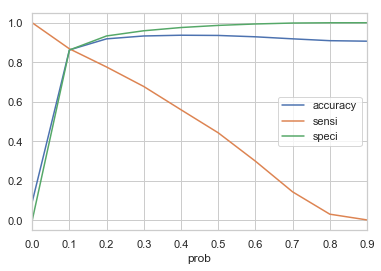

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [157]:
model_df['final_predicted'] = model_df.Converted_prob.map( lambda x: 1 if x > 0.1 else 0)

model_df.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0          0        0.007349    1    0    0    0    0    0    0    0    0   
1          0        0.089813    1    0    0    0    0    0    0    0    0   
2          0        0.114870    1    1    0    0    0    0    0    0    0   
3          0        0.027372    1    0    0    0    0    0    0    0    0   
4          0        0.008643    1    0    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                1  
3    0                0  
4    0                0

In [158]:
cutoff_df.loc[0.1,]

prob        0.100000
accuracy    0.862522
sensi       0.868193
speci       0.861937
Name: 0.1, dtype: float64

In [159]:
print("Accuracy is :",metrics.accuracy_score(model_df['Converted'],model_df['final_predicted']))
print("MCC score is :",metrics.matthews_corrcoef(model_df['Converted'],model_df['final_predicted']))
print(metrics.classification_report(model_df['Converted'],model_df['final_predicted']))

Accuracy is : 0.8625220164707003
MCC score is : 0.5253508532263264
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     19042
           1       0.39      0.87      0.54      1965

   micro avg       0.86      0.86      0.86     21007
   macro avg       0.69      0.87      0.73     21007
weighted avg       0.93      0.86      0.88     21007



In [160]:
# predict
y_test_pred_xgb = model.predict_proba(df_test_pca)


In [161]:
y_test_pred_xgb=y_test_pred_xgb[:,1]
y_test_pred_xgb=y_test_pred_xgb.reshape(-1)

In [162]:
#creating a data frame with actual converted vs predicted converted values

model_df_test=pd.DataFrame({"Converted":y_test.values,'Converted_prob':y_test_pred_xgb})
model_df_test.head()

Converted  Converted_prob
0          0        0.239223
1          0        0.136900
2          0        0.016970
3          0        0.011321
4          0        0.045349

In [163]:
model_df_test['final_predicted'] = model_df_test.Converted_prob.map( lambda x: 1 if x > 0.1 else 0)

model_df_test.head()

Converted  Converted_prob  final_predicted
0          0        0.239223                1
1          0        0.136900                1
2          0        0.016970                0
3          0        0.011321                0
4          0        0.045349                0

In [164]:
model_df_test['Converted']=model_df_test['Converted'].astype(int)

In [165]:
# test Metrics
print("Accuracy is :",metrics.accuracy_score(model_df_test['Converted'],model_df_test['final_predicted']))
print("MCC score is :",metrics.matthews_corrcoef(model_df_test['Converted'],model_df_test['final_predicted']))
print(metrics.classification_report(model_df_test['Converted'],model_df_test['final_predicted']))

Accuracy is : 0.8515104398045313
MCC score is : 0.484063783872631
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8162
           1       0.37      0.82      0.51       842

   micro avg       0.85      0.85      0.85      9004
   macro avg       0.67      0.84      0.71      9004
weighted avg       0.92      0.85      0.87      9004



## Plain Logistic Regression on raw using SMOTE

__As there is lot of imbalance in the data we will use SMOTE which will synthetically prodece data points of minority class__

In [166]:
from imblearn.over_sampling import SMOTE

In [167]:
smt=SMOTE(random_state=100)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [168]:
np.bincount(y_train)

array([19042,  1965], dtype=int64)

In [169]:
np.bincount(y_train_smt)

array([19042, 19042], dtype=int64)

In [170]:
X_train_smt=pd.DataFrame(X_train_smt)
X_train_smt.columns=X_train.columns
X_train_smt.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.375609  0.144631 -0.255134    -0.802957    -0.879449    -0.838635   
1  0.301980 -1.324658 -1.131830    -0.394135    -0.782080    -0.728406   
2  0.143269 -1.057923 -1.131297     2.123125     0.485313    -0.416572   
3  0.101249  0.020644  0.081120    -0.277732    -0.073653     0.877186   
4 -0.528124  1.977529  1.432782     2.218022     2.203447     2.165779   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  vbc_3g_7  \
0     -1.065810      0.618515     -0.829283            0.0  ... -0.579592   
1      1.015830     -0.677882     -0.746738            0.0  ... -0.579592   
2     -0.799621     -0.861346     -1.005063            0.0  ... -0.579592   
3      1.421398      1.068037      0.811874            0.0  ...  1.737859   
4     -0.744761     -0.769504     -0.398251            0.0  ... -0.579592   

   vbc_3g_6  av_rech_good_ph  dayofweek_of_last_rech_6  \
0       0.0        -0.709886                       3.0   
1       0.0        -0.778304                       5.0   
2       0.0        -0.634072                       0.0   
3       0.0        -0.158847                       6.0   
4       0.0         0.965421                       0.0   

   dayofweek_of_last_rech_7  dayofweek_of_last_rech_8  \
0                       3.0                       5.0   
1                       3.0                       0.0   
2                       1.0                       6.0   
3                       6.0                       3.0   
4                       1.0                       5.0   

   dayofmonth_of_last_rech_6  dayofmonth_of_last_rech_7  \
0                       20.0                       31.0   
1                       21.0                       31.0   
2                       30.0                       29.0   
3                       29.0                       27.0   
4                       30.0                       29.0   

   dayofmonth_of_last_rech_8  if_mou_dec  
0                       30.0    0.850303  
1                       25.0    0.850303  
2                       31.0    0.850303  
3                       28.0   -1.176051  
4                       30.0   -1.176051  

[5 rows x 159 columns]

In [171]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    37966
Model Family:                Binomial   Df Model:                          117
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13013.
Date:                Mon, 04 Nov 2019   Deviance:                       26026.
Time:                        23:42:36   Pearson chi2:                 7.22e+04
No. Iterations:                    59   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.7605      0.258      6.831      0.000       1.255       2.266
arpu_6                        0.3108      0.055      5.702      0.000       0.204       0.418
arpu_7                        0.2833      0.058      4.863      0.000       0.169       0.397
arpu_8                        0.2644      0.066      4.015      0.000       0.135       0.394
onnet_mou_6                   0.2070      0.063      3.302      0.001       0.084       0.330
onnet_mou_7                   0.1495      0.077      1.935      0.053      -0.002       0.301
onnet_mou_8                   0.2416      0.071      3.396      0.001       0.102       0.381
offnet_mou_6                  0.1925      0.060      3.209      0.001       0.075       0.310
offnet_mou_7                  0.2545      0.073      3.490      0.000       0.112       0.397
offnet_mou_8                 -0.0144      0.065     -0.220      0.826      -0.142       0.113
roam_ic_mou_6              7.303e-16   2.44e-16      2.999      0.003    2.53e-16    1.21e-15
roam_ic_mou_7              5.044e-16   2.25e-16      2.245      0.025     6.4e-17    9.45e-16
roam_ic_mou_8             -3.018e-16   2.27e-16     -1.329      0.184   -7.47e-16    1.43e-16
roam_og_mou_6             -6.117e-16   2.57e-16     -2.376      0.018   -1.12e-15   -1.07e-16
roam_og_mou_7               3.64e-16   2.17e-16      1.677      0.093   -6.13e-17    7.89e-16
roam_og_mou_8              1.186e-15   3.32e-16      3.576      0.000    5.36e-16    1.84e-15
loc_og_t2t_mou_6              0.1564      0.057      2.752      0.006       0.045       0.268
loc_og_t2t_mou_7              0.0827      0.062      1.340      0.180      -0.038       0.204
loc_og_t2t_mou_8             -0.3821      0.067     -5.701      0.000      -0.513      -0.251
loc_og_t2m_mou_6              0.1460      0.090      1.631      0.103      -0.029       0.321
loc_og_t2m_mou_7             -0.3127      0.100     -3.121      0.002      -0.509      -0.116
loc_og_t2m_mou_8             -0.1343      0.109     -1.234      0.217      -0.348       0.079
loc_og_t2f_mou_6             -0.0281      0.031     -0.905      0.366      -0.089       0.033
loc_og_t2f_mou_7              0.1026      0.033      3.063      0.002       0.037       0.168
loc_og_t2f_mou_8             -0.1973      0.036     -5.520      0.000      -0.267      -0.127
loc_og_t2c_mou_6             -0.0115      0.020     -0.561      0.575      -0.052       0.029
loc_og_t2c_mou_7             -0.0129      0.021     -0.611      0.541      -0.054       0.028
loc_og_t2c_mou_8             -0.0310      0.022     -1.407      0.160      -0.074       0.012
loc_og_mou_6                 -0.4255      0.131     -3.246      0.001      -0.682      -0.169
loc_og_mou_7                  0.2171      0.144      1.508      0.132      -0.065       0.499
loc_og_mou_8                 -0.1671      0.152     -1.100  

### RFE

In [172]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [173]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smt, y_train_smt)

In [174]:
col = X_train_smt.columns[rfe.support_]

In [175]:
X_train_smt_rfe=X_train_smt[col]

In [176]:
X_train_smt.shape

(38084, 159)

In [177]:
X_train_smt_rfe.shape


(38084, 15)

In [178]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF():
    vif = pd.DataFrame()
    vif['Features'] = X_train_smt_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_smt_rfe.values, i) for i in range(X_train_smt_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [179]:
#Model 2
logm2 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt_rfe)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    38068
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14377.
Date:                Mon, 04 Nov 2019   Deviance:                       28755.
Time:                        23:54:03   Pearson chi2:                 5.56e+04
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6562      0.024    -69.383      0.000      -1.703      -1.609
arpu_7                 0.5175      0.020     25.335      0.000       0.477       0.558
onnet_mou_7            0.3309      0.027     12.305      0.000       0.278       0.384
loc_og_t2t_mou_8      -0.3136      0.037     -8.522      0.000      -0.386      -0.241
loc_og_t2f_mou_8      -0.2866      0.025    -11.521      0.000      -0.335      -0.238
loc_og_mou_8          -0.4793      0.048     -9.973      0.000      -0.573      -0.385
std_og_t2t_mou_8      -0.4860      0.031    -15.464      0.000      -0.548      -0.424
total_og_mou_8        -0.4332      0.030    -14.679      0.000      -0.491      -0.375
loc_ic_t2m_mou_7       0.3912      0.033     11.779      0.000       0.326       0.456
loc_ic_t2m_mou_8      -1.0251      0.045    -23.013      0.000      -1.112      -0.938
std_ic_t2m_mou_8      -0.3103      0.020    -15.501      0.000      -0.350      -0.271
total_rech_num_8      -0.5654      0.021    -26.395      0.000      -0.607      -0.523
last_day_rch_amt_8    -0.6928      0.021    -32.572      0.000      -0.734      -0.651
max_rech_data_8       -0.3494      0.049     -7.137      0.000      -0.445      -0.253
av_rech_amt_data_8    -0.4094      0.051     -8.048      0.000      -0.509      -0.310
aon                   -0.2993      0.019    -15.529      0.000      -0.337      -0.262
======================================================================================
"""

In [180]:
VIF()

Features   VIF
13  av_rech_amt_data_8  6.83
12     max_rech_data_8  6.73
4         loc_og_mou_8  6.53
8     loc_ic_t2m_mou_8  5.16
6       total_og_mou_8  4.39
2     loc_og_t2t_mou_8  3.63
7     loc_ic_t2m_mou_7  3.29
5     std_og_t2t_mou_8  3.13
1          onnet_mou_7  2.16
10    total_rech_num_8  1.95
0               arpu_7  1.65
3     loc_og_t2f_mou_8  1.65
11  last_day_rch_amt_8  1.61
9     std_ic_t2m_mou_8  1.37
14                 aon  1.26

In [181]:
#Letsdrop av_rech_amt_data_8 due to high VIF
X_train_smt_rfe.drop('av_rech_amt_data_8',1,inplace=True)


In [182]:
#model 3
logm3 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt_rfe)), family = sm.families.Binomial())
print(logm3.fit().summary())
print(VIF())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    38069
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14411.
Date:                Mon, 04 Nov 2019   Deviance:                       28822.
Time:                        23:54:04   Pearson chi2:                 5.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6470      0.024    -69.262      0.000      -1.694      -1.600
arpu_7                 0.506

In [183]:
#dropping 'loc_og_mou_8' due to high VIF 
X_train_smt_rfe.drop('loc_og_mou_8',1,inplace=True)

In [184]:
#model 4
logm4 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt_rfe)), family = sm.families.Binomial())
print(logm4.fit().summary())
print(VIF())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    38070
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14465.
Date:                Mon, 04 Nov 2019   Deviance:                       28929.
Time:                        23:54:05   Pearson chi2:                 6.13e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6219      0.023    -69.435      0.000      -1.668      -1.576
arpu_7                 0.506

In [185]:
#dropping 'loc_ic_t2m_mou_8' due to high p value 
X_train_smt_rfe.drop('loc_ic_t2m_mou_8',1,inplace=True)

In [186]:
#model 5
logm5 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt_rfe)), family = sm.families.Binomial())
print(logm5.fit().summary())
print(VIF())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    38071
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14885.
Date:                Mon, 04 Nov 2019   Deviance:                       29771.
Time:                        23:54:05   Pearson chi2:                 5.35e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5089      0.022    -68.678      0.000      -1.552      -1.466
arpu_7                 0.584

In [187]:
#Lets drop 'std_og_t2t_mou_8'
X_train_smt_rfe.drop('std_og_t2t_mou_8',1,inplace=True)

In [188]:
#model 6
logm6 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt_rfe)), family = sm.families.Binomial())
print(logm6.fit().summary())
print(VIF())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38084
Model:                            GLM   Df Residuals:                    38072
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Mon, 04 Nov 2019   Deviance:                       29991.
Time:                        23:54:06   Pearson chi2:                 5.50e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5254      0.022    -68.784      0.000      -1.569      -1.482
arpu_7                 0.662

In [189]:
fm=logm6.fit()

In [190]:
y_train_pred_lr=fm.predict((sm.add_constant(X_train_smt_rfe)))

In [191]:
#creating a data frame with actual converted vs predicted converted values

model_df_lr=pd.DataFrame({"Converted":y_train_smt,'Converted_prob':y_train_pred_lr})
model_df_lr.head()

Converted  Converted_prob
0          0        0.135145
1          0        0.164412
2          0        0.611981
3          0        0.088000
4          0        0.059628

In [192]:
"{:2.2f}".format(metrics.roc_auc_score(model_df_lr.Converted, model_df_lr.Converted_prob))

'0.90'

In [193]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    model_df_lr[i]= model_df_lr.Converted_prob.map(lambda x: 1 if x > i else 0)
model_df_lr.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.135145    1    1    0    0    0    0    0    0    0    0
1          0        0.164412    1    1    0    0    0    0    0    0    0    0
2          0        0.611981    1    1    1    1    1    1    1    0    0    0
3          0        0.088000    1    0    0    0    0    0    0    0    0    0
4          0        0.059628    1    0    0    0    0    0    0    0    0    0

In [194]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(model_df_lr.Converted, model_df_lr[i] )
    total1=sum(sum(cm1))     #sum makes a sum column wise and the next sum will add it to total.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.693257  0.976998  0.409516
0.2   0.2  0.761553  0.945069  0.578038
0.3   0.3  0.799863  0.912667  0.687060
0.4   0.4  0.821894  0.878164  0.765623
0.5   0.5  0.833972  0.841613  0.826331
0.6   0.6  0.836913  0.799496  0.874330
0.7   0.7  0.827093  0.741886  0.912299
0.8   0.8  0.793877  0.642159  0.945594
0.9   0.9  0.648067  0.317614  0.978521


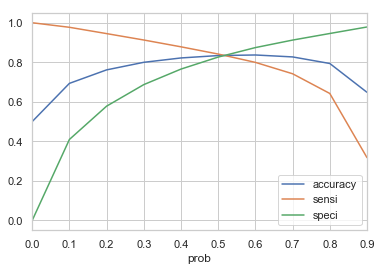

In [195]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__From the curve above, 0.5 is the optimum point to take it as a cutoff probability.__

In [196]:
model_df_lr['final_predicted'] = model_df_lr.Converted_prob.map( lambda x: 1 if x > 0.5 else 0)

model_df_lr.head()

Converted  Converted_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0          0        0.135145    1    1    0    0    0    0    0    0    0   
1          0        0.164412    1    1    0    0    0    0    0    0    0   
2          0        0.611981    1    1    1    1    1    1    1    0    0   
3          0        0.088000    1    0    0    0    0    0    0    0    0   
4          0        0.059628    1    0    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                1  
3    0                0  
4    0                0

In [197]:
cutoff_df.loc[0.5,]

prob        0.500000
accuracy    0.833972
sensi       0.841613
speci       0.826331
Name: 0.5, dtype: float64

In [198]:
#train metrics
print("Accuracy is :",metrics.accuracy_score(model_df_lr['Converted'],model_df_lr['final_predicted']))
print("MCC score is :",metrics.matthews_corrcoef(model_df_lr['Converted'],model_df_lr['final_predicted']))
print(metrics.classification_report(model_df_lr['Converted'],model_df_lr['final_predicted']))

Accuracy is : 0.833972271820187
MCC score is : 0.6680225531133903
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     19042
           1       0.83      0.84      0.84     19042

   micro avg       0.83      0.83      0.83     38084
   macro avg       0.83      0.83      0.83     38084
weighted avg       0.83      0.83      0.83     38084



##  Making predictions on the test set

In [199]:
X_test_lr=X_test[X_train_smt_rfe.columns]

In [200]:
y_test_pred_lr=fm.predict(sm.add_constant(X_test_lr))

In [201]:
test_model_df=pd.DataFrame({"Converted_test":y_test.values,'Converted_prob_test':y_test_pred_lr})
test_model_df.head()

Converted_test  Converted_prob_test
11898               0             0.881566
2209                0             0.794481
259                 0             0.066898
23549               0             0.229250
1030                0             0.052894

In [202]:
test_model_df['final_prediction']=test_model_df.Converted_prob_test.map(lambda x: 1 if x > 0.5 else 0)
test_model_df.head()

Converted_test  Converted_prob_test  final_prediction
11898               0             0.881566                 1
2209                0             0.794481                 1
259                 0             0.066898                 0
23549               0             0.229250                 0
1030                0             0.052894                 0

In [203]:
test_model_df['Converted_test']=test_model_df['Converted_test'].astype(int)

In [204]:
#test metrics
print("Accuracy is :",metrics.accuracy_score(test_model_df['Converted_test'],test_model_df['final_prediction']))
print("MCC score is :",metrics.matthews_corrcoef(test_model_df['Converted_test'],test_model_df['final_prediction']))
print(metrics.classification_report(test_model_df['Converted_test'],test_model_df['final_prediction']))

Accuracy is : 0.8262994224788983
MCC score is : 0.4378984351036747
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8162
           1       0.33      0.81      0.46       842

   micro avg       0.83      0.83      0.83      9004
   macro avg       0.65      0.82      0.68      9004
weighted avg       0.92      0.83      0.86      9004



- Since, we have got the overfitted model, lets try logistic regression with L1 penalty

- Below code is marked down since it takes lot of time for completion of code execution

params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_log = LogisticRegression(solver='saga',random_state=42,penalty='l1')

# cross validation
folds = 10
model_cv = GridSearchCV(ridge_log, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

model_cv.best_params_

In [205]:
lasso_log=LogisticRegression(solver='saga',random_state=42,penalty='l1',C=0.8)
lasso_log.fit(X_train,y_train)

C:\Users\jponnada\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
np.abs(pd.Series(dict(zip(X_train.columns,lasso_log.coef_[0])))).sort_values(ascending=False).head()

loc_ic_t2m_mou_8      0.780626
last_day_rch_amt_8    0.671458
total_rech_num_8      0.443415
av_rech_amt_data_8    0.346627
offnet_mou_7          0.321647
dtype: float64

In [207]:
y_train_predict = lasso_log.predict(X_train)
print(metrics.classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     19042
           1       0.66      0.42      0.51      1965

   micro avg       0.93      0.93      0.93     21007
   macro avg       0.80      0.70      0.74     21007
weighted avg       0.92      0.93      0.92     21007



In [208]:
y_test_predict = lasso_log.predict(X_test)
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8162
           1       0.65      0.43      0.52       842

   micro avg       0.93      0.93      0.93      9004
   macro avg       0.80      0.70      0.74      9004
weighted avg       0.92      0.93      0.92      9004



### Model Performances

- For prediction, Weighted Random forest model performs well with fl score of .57 in train and .55 in test compared to 
other logistic, Adaboost, Gardient Boosting, XG boosting models.

</br>

- For Interpretation, Logistic Regression with l1 penalty (lasso) performs and below are the important features for churn prediction.

### Important Variables are 
- loc_ic_t2m_mou_8  - As the local incoming calls from other network for the month of 8 increases the Probability of churning decreases
- last_day_rch_amt_8 - As the last day recharge amount  for month 8 increases the Probability of churning decreases
- total_rech_num_8  - As the total recharge amount for data in the month of 8 increases the probability of churning decreases.